<div style="background-color: #f8d3d0; padding: 20px; text-align: center;">
    <img src="https://static-00.iconduck.com/assets.00/wine-glass-emoji-989x2048-h11qpa0i.png" alt="Wine Bottle" style="width: 25px; height: auto;">
    <span style="font-size: 48px; color: #ff0000; font-family: cursive;">Hello everyone!</span>
    <img src="https://static-00.iconduck.com/assets.00/wine-glass-emoji-989x2048-h11qpa0i.png" alt="Wine Bottle" style="width: 25px; height: auto;">
</div>


<h1 style="text-align:center; font-size: 30px;">
    <span style="color:red;">WINE QUALITY PREDICTION:</span> 
    <span style="color:black;"> Comparing ML Models (LogReg, KNN, DT, RF) </span
</h>


<div style="text-align: center;"><img src="https://www.wsetglobal.com/media/14795/1200x1200-wine-colours.png" style="width:100%; max-width:1200px;"></div>

<a id="0"></a>
# <p style="padding:10px;background-color:#f8d3d0 ;margin:0;color:#000000 ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">A Brief Explenation 💻</p>

<div style = 'border : 3px solid none; background-color:#f2f2f2; padding:10px'>

Wine quality prediction is a crucial task in the wine industry as it helps producers, sellers, and consumers make informed decisions based on the wine's characteristics. The goal of this study is to develop a machine learning model that can predict the quality of wine based on various physicochemical properties such as acidity, alcohol content, pH, and sulfur dioxide levels. This field has gained significant attention due to the potential of using machine learning algorithms to automate and enhance the decision-making process. The models explored in this work, such as Logistic Regression, K-Nearest Neighbors (KNN), Decision Trees (DT), and Random Forests (RF), are known for their efficiency and accuracy in classification tasks. In this study, we delve into the strengths and weaknesses of each algorithm, compare their performance, and evaluate their ability to predict wine quality accurately. We also address the challenges involved, including the need for high-quality data and the selection of the most appropriate features to achieve optimal predictions.

</div>


<a id="0"></a>
# <p style="padding:10px;background-color:#f8d3d0 ;margin:0;color:#000000 ;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents 💻</p>


<div style = 'border : 3px solid non; background-color:#f2f2f2
              ;font-family:Times New Roman;
              font-size:110%;padding:10px'>

* **[1. Description of all columns in our dataset](#1)**
    
       
    
* **[2. Import Libraries ](#2)**
    
  - Libraries that we need in this project
  
  
* **[3. call Dataset ](#3)**  
    
   - Calling the dataset (Wine dataset)
   
      
* **[4. Exploratory Data Analysis (EDA) ](#4)**   

   - Get rid of missing values
    
   - Ploting & visualization
    
* **[5. Feature Engineering & Modling](#5)**
        
   - Scaling the columns to the power of 2 
    
   - Cross Validation
    
   - Correlation
 
   - Normalizing
 
   - PCA(Principle Component Analysis)
  
    
* **[6. Create Models ](#6)**
    
   - Logestic Regression
 
   - KNN
 
   - Random Forest
   
   - DecisionTree Model
 
   - DecisionTree Model with entropy

<a id="1"></a>
# <p style="padding:10px;background-color:#f8d3d0 ;margin:0;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Description of all columns in our dataset </p>

<div style="background-color: #f2f2f2; padding: 10px;">


###  fixed acidity : Fixed acidity is the wine's natural acids (tartaric, malic, etc.)
### volatile acidity : Volatile acidity is the wine's vinegar-like smell.
### citric acid	 : Citric acid is an acid supplement for wine fermentation.
### Residual Sugar : Residual Sugar is the wine's leftover sugar after fermentation.
### Chlorides : Chlorides are the wine’s salt content.
### Free sulfur dioxide: Free sulfur dioxide is the wine’s unbound SO2 that protects it from oxidation and spoilage.
### Total sulfur dioxide: Total sulfur dioxide is the wine’s free and bound SO2. It has a legal limit of 350 ppm for bottled wine.
### Density : Density of wine is its weight/volume. 
### pH : pH in wine is its acidity or alkalinity. It affects the wine’s taste, color, stability, and fermentation. 
### sulphates : Sulphates are the wine’s SO2, which is added to prevent oxidation and spoilage.### alcohol : Alcohol in wine is the result of yeast converting sugar in grapes during fermentation.
### quality : Quality in wine is the degree of excellence based on factors like balance, intensity, complexity, clarity, typicity, and length.

</div>






<a id="2"></a>
# <p style="padding:10px;background-color:#f8d3d0 ;margin:0;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import Libraries</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

<a id="3"></a>
# <p style="padding:10px;background-color:#f8d3d0 ;margin:0;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Call Dataset</p>

In [3]:
df1 = pd.read_csv ('WineQT.csv')
df1        

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                 29.0                  40.0  0.99574  3.42       0.75   
1139                 28.0                  38.0  0.99651  3.42       0.82   
1140                 32.0                  44.0  0.99490  3.45       0.58   
1141                 39.0                  51.0  0.99512  3.52       0.76   
1142                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality    Id  
0         9.4        5     0  
1         9.8        5     1  
2         9.8        5     2  
3         9.8        6     3  
4         9.4        5     4  
...       ...      ...   ...  
1138     11.0        6  1592  
1139      9.5        6  1593  
1140     10.5        5  1594  
1141     11.2        6  1595  
1142     10.2        5  1597  

[1143 rows x 13 columns]

<a id="4"></a>
# <p style="padding:10px;background-color:#f8d3d0 ;margin:0;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Exploratory Data Analysis (EDA)</p>

### First we put "Id" column as first column so we arrange all columns again

In [4]:
df1 = df1.loc[:,['Id', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']]


In [5]:
df1

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            7.4             0.700         0.00             1.9   
1        1            7.8             0.880         0.00             2.6   
2        2            7.8             0.760         0.04             2.3   
3        3           11.2             0.280         0.56             1.9   
4        4            7.4             0.700         0.00             1.9   
...    ...            ...               ...          ...             ...   
1138  1592            6.3             0.510         0.13             2.3   
1139  1593            6.8             0.620         0.08             1.9   
1140  1594            6.2             0.600         0.08             2.0   
1141  1595            5.9             0.550         0.10             2.2   
1142  1597            5.9             0.645         0.12             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1138      0.076                 29.0                  40.0  0.99574  3.42   
1139      0.068                 28.0                  38.0  0.99651  3.42   
1140      0.090                 32.0                  44.0  0.99490  3.45   
1141      0.062                 39.0                  51.0  0.99512  3.52   
1142      0.075                 32.0                  44.0  0.99547  3.57   

      sulphates  alcohol  quality  
0          0.56      9.4        5  
1          0.68      9.8        5  
2          0.65      9.8        5  
3          0.58      9.8        6  
4          0.56      9.4        5  
...         ...      ...      ...  
1138       0.75     11.0        6  
1139       0.82      9.5        6  
1140       0.58     10.5        5  
1141       0.76     11.2        6  
1142       0.71     10.2        5  

[1143 rows x 13 columns]

In [6]:
print(df1.head())

   Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   0            7.4              0.70         0.00             1.9   
1   1            7.8              0.88         0.00             2.6   
2   2            7.8              0.76         0.04             2.3   
3   3           11.2              0.28         0.56             1.9   
4   4            7.4              0.70         0.00             1.9   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.076                 11.0                  34.0   0.9978  3.51   
1      0.098                 25.0                  67.0   0.9968  3.20   
2      0.092                 15.0                  54.0   0.9970  3.26   
3      0.075                 17.0                  60.0   0.9980  3.16   
4      0.076                 11.0                  34.0   0.9978  3.51   

   sulphates  alcohol  quality  
0       0.56      9.4        5  
1       0.68      9.8        5  
2       0.65      9.8        

### We want to know name of all Columns

In [7]:
df1.columns

Index(['Id', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

### We want to know the numbers of Rows and Columns

In [8]:
print(df1.shape)

(1143, 13)


### We want to know about all types of our data

In [9]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1143 non-null   int64  
 1   fixed acidity         1143 non-null   float64
 2   volatile acidity      1143 non-null   float64
 3   citric acid           1143 non-null   float64
 4   residual sugar        1143 non-null   float64
 5   chlorides             1143 non-null   float64
 6   free sulfur dioxide   1143 non-null   float64
 7   total sulfur dioxide  1143 non-null   float64
 8   density               1143 non-null   float64
 9   pH                    1143 non-null   float64
 10  sulphates             1143 non-null   float64
 11  alcohol               1143 non-null   float64
 12  quality               1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None


### Now We want to convert  all types of our data to float

In [10]:
df1

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            7.4             0.700         0.00             1.9   
1        1            7.8             0.880         0.00             2.6   
2        2            7.8             0.760         0.04             2.3   
3        3           11.2             0.280         0.56             1.9   
4        4            7.4             0.700         0.00             1.9   
...    ...            ...               ...          ...             ...   
1138  1592            6.3             0.510         0.13             2.3   
1139  1593            6.8             0.620         0.08             1.9   
1140  1594            6.2             0.600         0.08             2.0   
1141  1595            5.9             0.550         0.10             2.2   
1142  1597            5.9             0.645         0.12             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                 11.0                  34.0  0.99780  3.51   
1         0.098                 25.0                  67.0  0.99680  3.20   
2         0.092                 15.0                  54.0  0.99700  3.26   
3         0.075                 17.0                  60.0  0.99800  3.16   
4         0.076                 11.0                  34.0  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1138      0.076                 29.0                  40.0  0.99574  3.42   
1139      0.068                 28.0                  38.0  0.99651  3.42   
1140      0.090                 32.0                  44.0  0.99490  3.45   
1141      0.062                 39.0                  51.0  0.99512  3.52   
1142      0.075                 32.0                  44.0  0.99547  3.57   

      sulphates  alcohol  quality  
0          0.56      9.4        5  
1          0.68      9.8        5  
2          0.65      9.8        5  
3          0.58      9.8        6  
4          0.56      9.4        5  
...         ...      ...      ...  
1138       0.75     11.0        6  
1139       0.82      9.5        6  
1140       0.58     10.5        5  
1141       0.76     11.2        6  
1142       0.71     10.2        5  

[1143 rows x 13 columns]

In [11]:
df1["Id"] = df1['Id'].astype(float)

In [12]:
df1["quality"] = df1['quality'].astype(float)

In [13]:
df1["free sulfur dioxide"] = df1['free sulfur dioxide'].astype(int)

In [14]:
df1["total sulfur dioxide"] = df1['total sulfur dioxide'].astype(int)

In [15]:
df1

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0.0            7.4             0.700         0.00             1.9   
1        1.0            7.8             0.880         0.00             2.6   
2        2.0            7.8             0.760         0.04             2.3   
3        3.0           11.2             0.280         0.56             1.9   
4        4.0            7.4             0.700         0.00             1.9   
...      ...            ...               ...          ...             ...   
1138  1592.0            6.3             0.510         0.13             2.3   
1139  1593.0            6.8             0.620         0.08             1.9   
1140  1594.0            6.2             0.600         0.08             2.0   
1141  1595.0            5.9             0.550         0.10             2.2   
1142  1597.0            5.9             0.645         0.12             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                   11                    34  0.99780  3.51   
1         0.098                   25                    67  0.99680  3.20   
2         0.092                   15                    54  0.99700  3.26   
3         0.075                   17                    60  0.99800  3.16   
4         0.076                   11                    34  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1138      0.076                   29                    40  0.99574  3.42   
1139      0.068                   28                    38  0.99651  3.42   
1140      0.090                   32                    44  0.99490  3.45   
1141      0.062                   39                    51  0.99512  3.52   
1142      0.075                   32                    44  0.99547  3.57   

      sulphates  alcohol  quality  
0          0.56      9.4      5.0  
1          0.68      9.8      5.0  
2          0.65      9.8      5.0  
3          0.58      9.8      6.0  
4          0.56      9.4      5.0  
...         ...      ...      ...  
1138       0.75     11.0      6.0  
1139       0.82      9.5      6.0  
1140       0.58     10.5      5.0  
1141       0.76     11.2      6.0  
1142       0.71     10.2      5.0  

[1143 rows x 13 columns]

In [16]:
max_value = df1['free sulfur dioxide'].max()
min_value = df1['free sulfur dioxide'].min()

print("Max:", max_value)
print("Min:", min_value)


Max: 68
Min: 1


In [17]:
def categorize_sulfur(value):
    if 1 <= value <= 10:
        return 1
    elif 11 <= value <= 20:
        return 2
    elif 21 <= value <= 30:
        return 3
    elif 31 <= value <= 40:
        return 4
    elif 41 <= value <= 50:
        return 5
    elif 51 <= value <= 60:
        return 6
    elif 61 <= value <= 69:
        return 7

# اعمال تابع به ستون free sulfur dioxide
df1['sulfur_category'] = df1['free sulfur dioxide'].apply(categorize_sulfur)

# نمایش داده‌ها
print(df1[['free sulfur dioxide', 'sulfur_category']])


      free sulfur dioxide  sulfur_category
0                      11                2
1                      25                3
2                      15                2
3                      17                2
4                      11                2
...                   ...              ...
1138                   29                3
1139                   28                3
1140                   32                4
1141                   39                4
1142                   32                4

[1143 rows x 2 columns]


In [18]:
df1

Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0.0            7.4             0.700         0.00             1.9   
1        1.0            7.8             0.880         0.00             2.6   
2        2.0            7.8             0.760         0.04             2.3   
3        3.0           11.2             0.280         0.56             1.9   
4        4.0            7.4             0.700         0.00             1.9   
...      ...            ...               ...          ...             ...   
1138  1592.0            6.3             0.510         0.13             2.3   
1139  1593.0            6.8             0.620         0.08             1.9   
1140  1594.0            6.2             0.600         0.08             2.0   
1141  1595.0            5.9             0.550         0.10             2.2   
1142  1597.0            5.9             0.645         0.12             2.0   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.076                   11                    34  0.99780  3.51   
1         0.098                   25                    67  0.99680  3.20   
2         0.092                   15                    54  0.99700  3.26   
3         0.075                   17                    60  0.99800  3.16   
4         0.076                   11                    34  0.99780  3.51   
...         ...                  ...                   ...      ...   ...   
1138      0.076                   29                    40  0.99574  3.42   
1139      0.068                   28                    38  0.99651  3.42   
1140      0.090                   32                    44  0.99490  3.45   
1141      0.062                   39                    51  0.99512  3.52   
1142      0.075                   32                    44  0.99547  3.57   

      sulphates  alcohol  quality  sulfur_category  
0          0.56      9.4      5.0                2  
1          0.68      9.8      5.0                3  
2          0.65      9.8      5.0                2  
3          0.58      9.8      6.0                2  
4          0.56      9.4      5.0                2  
...         ...      ...      ...              ...  
1138       0.75     11.0      6.0                3  
1139       0.82      9.5      6.0                3  
1140       0.58     10.5      5.0                4  
1141       0.76     11.2      6.0                4  
1142       0.71     10.2      5.0                4  

[1143 rows x 14 columns]

In [19]:
max_value = df1['total sulfur dioxide'].max()
min_value = df1['total sulfur dioxide'].min()

print("Max:", max_value)
print("Min:", min_value)


Max: 289
Min: 6


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1143 non-null   float64
 1   fixed acidity         1143 non-null   float64
 2   volatile acidity      1143 non-null   float64
 3   citric acid           1143 non-null   float64
 4   residual sugar        1143 non-null   float64
 5   chlorides             1143 non-null   float64
 6   free sulfur dioxide   1143 non-null   int32  
 7   total sulfur dioxide  1143 non-null   int32  
 8   density               1143 non-null   float64
 9   pH                    1143 non-null   float64
 10  sulphates             1143 non-null   float64
 11  alcohol               1143 non-null   float64
 12  quality               1143 non-null   float64
 13  sulfur_category       1143 non-null   int64  
dtypes: float64(11), int32(2), int64(1)
memory usage: 116.2 KB


### We want to know about number of missing values

In [21]:
 df1.isnull().sum(), print("There is no missing values in this dataset.")

There is no missing values in this dataset.


(Id                      0
 fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 sulfur_category         0
 dtype: int64,
 None)

### So data is clear and there is no missing values , so we do not need to use dropna.

# <font color='red'>--------------------------------------------------------------------------------------------</font> 

### Now describe all data to see them in other qantity

In [22]:
df1.describe(include = "all").T

count        mean         std      min        25%  \
Id                    1143.0  804.969379  463.997116  0.00000  411.00000   
fixed acidity         1143.0    8.311111    1.747595  4.60000    7.10000   
volatile acidity      1143.0    0.531339    0.179633  0.12000    0.39250   
citric acid           1143.0    0.268364    0.196686  0.00000    0.09000   
residual sugar        1143.0    2.532152    1.355917  0.90000    1.90000   
chlorides             1143.0    0.086933    0.047267  0.01200    0.07000   
free sulfur dioxide   1143.0   15.614173   10.247585  1.00000    7.00000   
total sulfur dioxide  1143.0   45.914261   32.781712  6.00000   21.00000   
density               1143.0    0.996730    0.001925  0.99007    0.99557   
pH                    1143.0    3.311015    0.156664  2.74000    3.20500   
sulphates             1143.0    0.657708    0.170399  0.33000    0.55000   
alcohol               1143.0   10.442111    1.082196  8.40000    9.50000   
quality               1143.0    5.657043    0.805824  3.00000    5.00000   
sulfur_category       1143.0    2.011374    1.070563  1.00000    1.00000   

                            50%          75%         max  
Id                    794.00000  1209.500000  1597.00000  
fixed acidity           7.90000     9.100000    15.90000  
volatile acidity        0.52000     0.640000     1.58000  
citric acid             0.25000     0.420000     1.00000  
residual sugar          2.20000     2.600000    15.50000  
chlorides               0.07900     0.090000     0.61100  
free sulfur dioxide    13.00000    21.000000    68.00000  
total sulfur dioxide   37.00000    61.000000   289.00000  
density                 0.99668     0.997845     1.00369  
pH                      3.31000     3.400000     4.01000  
sulphates               0.62000     0.730000     2.00000  
alcohol                10.20000    11.100000    14.90000  
quality                 6.00000     6.000000     8.00000  
sulfur_category         2.00000     3.000000     7.00000

# <font color='royalblue'  style='font-weight: bold'>Ploting & visualization</font> 

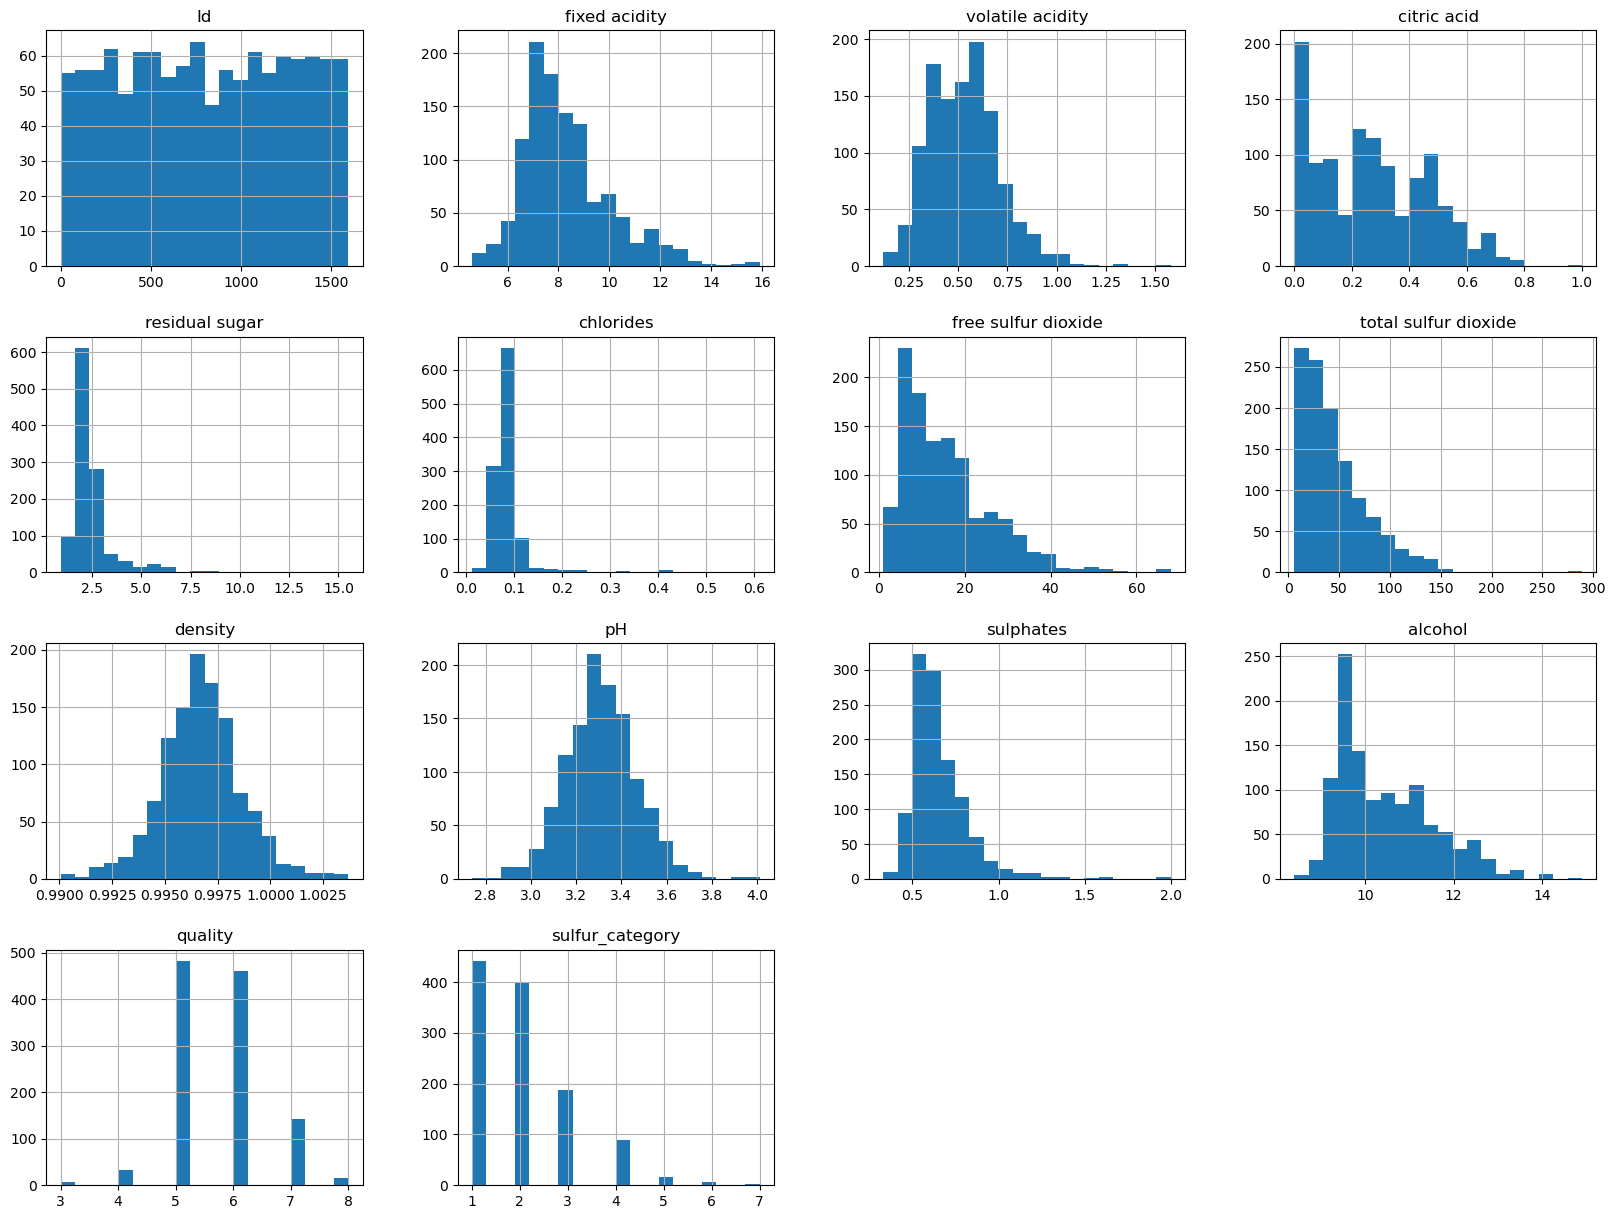

In [23]:
df1.hist(bins = 20 , figsize = (20, 15))
plt.show()

<Axes: >

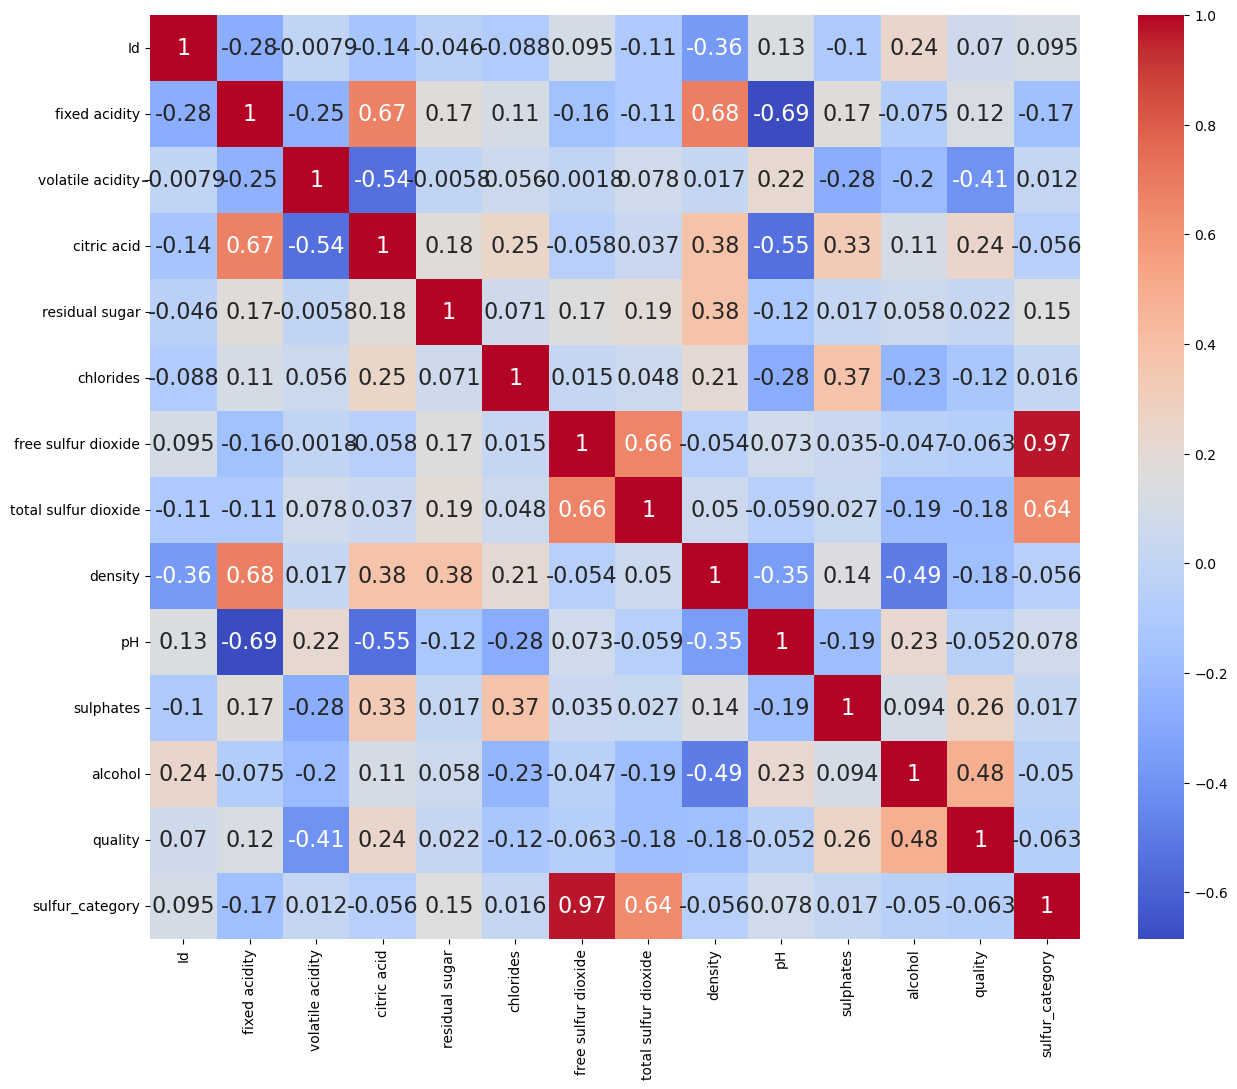

In [24]:
fig, ax = plt.subplots(figsize = (15,12))
sns.heatmap(df1.corr(), annot = True, cmap = "coolwarm", ax = ax, annot_kws = {"fontsize" : 16}) 

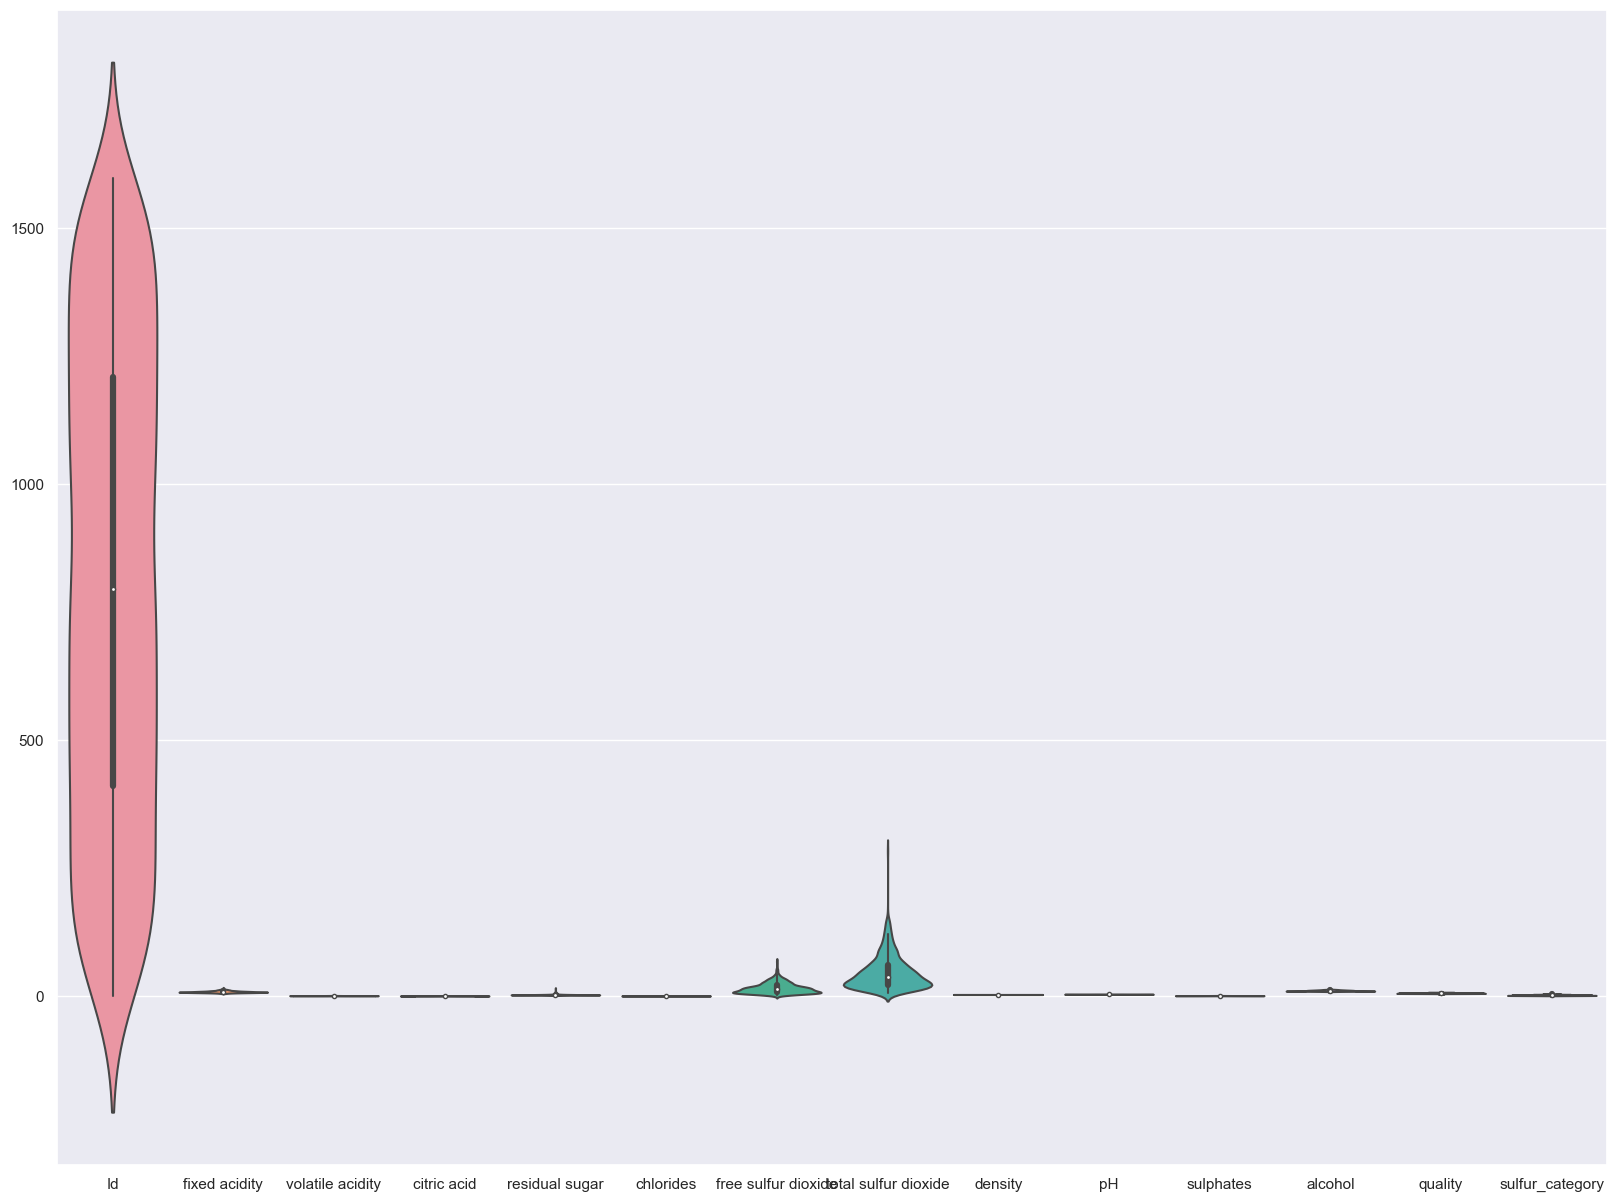

In [223]:
plt.figure(figsize = (20, 15))
sns.violinplot(df1, widths=1, scale='count')
plt.show()


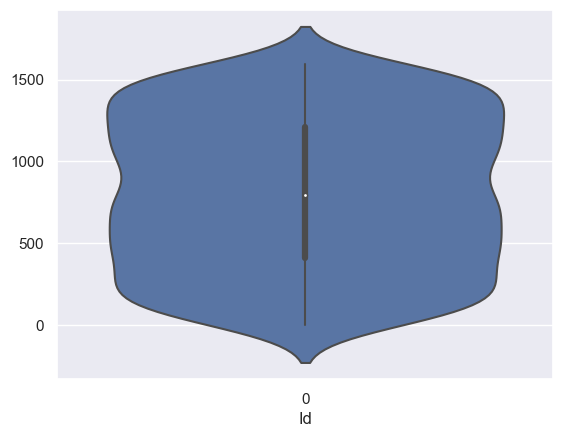

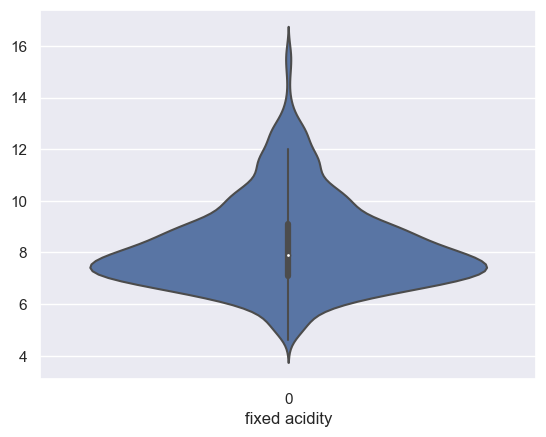

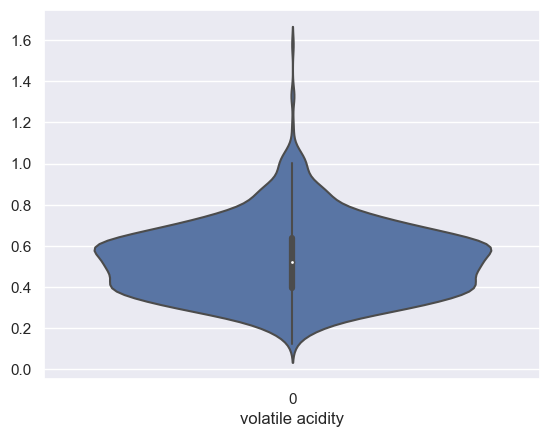

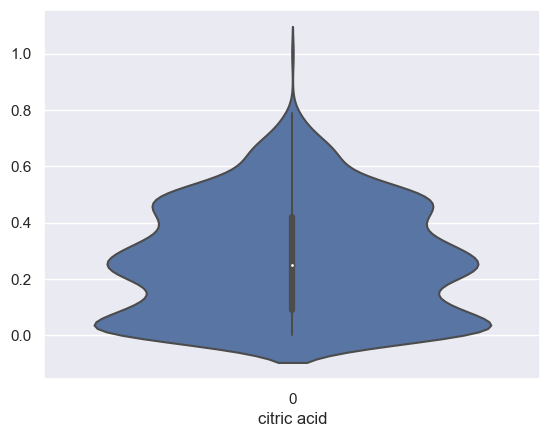

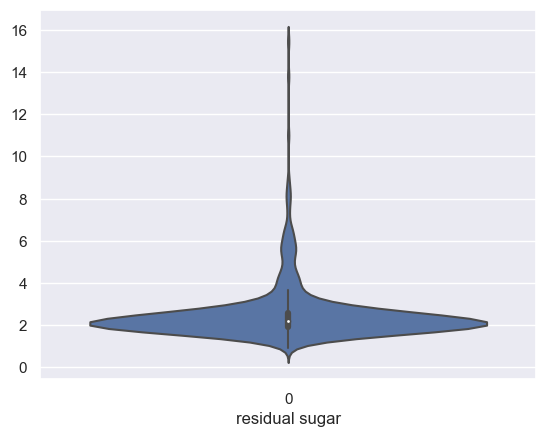

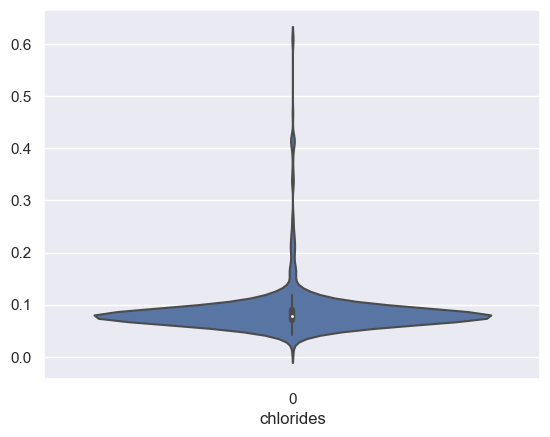

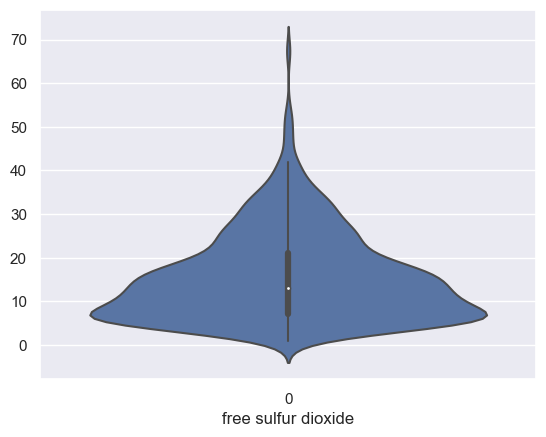

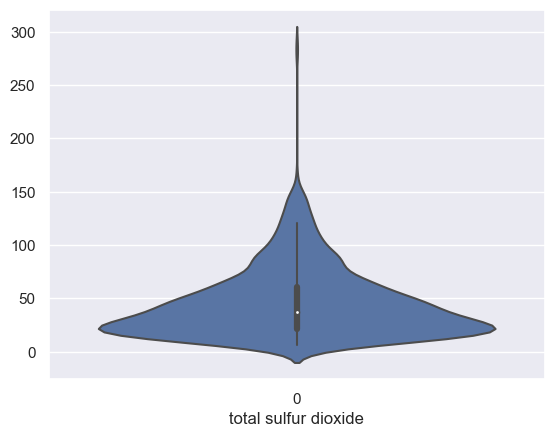

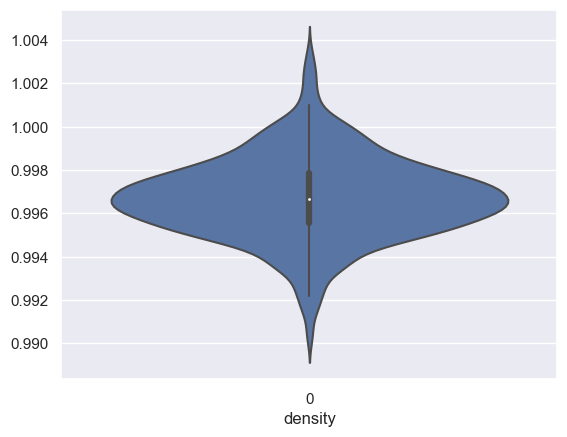

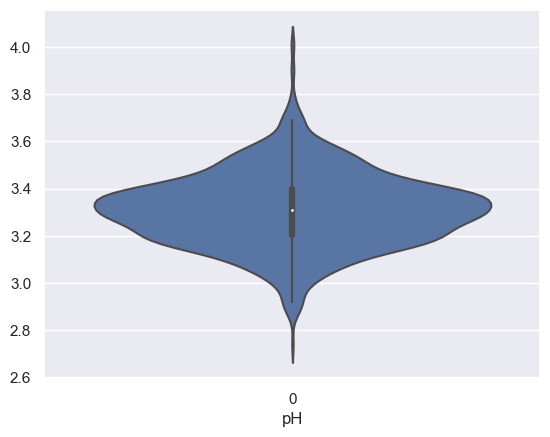

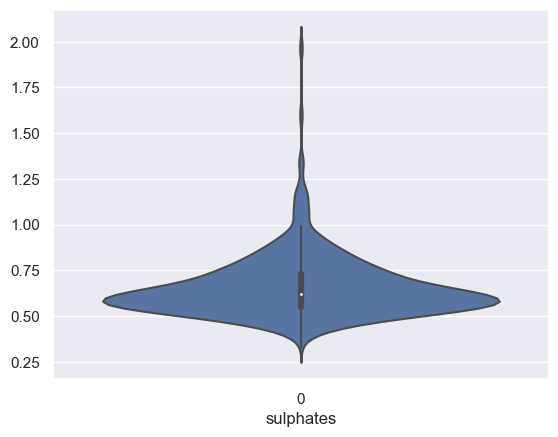

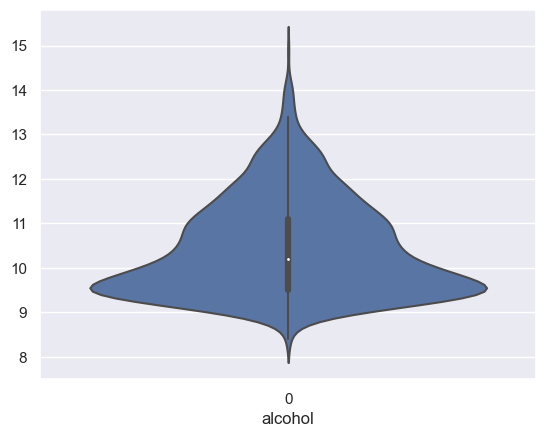

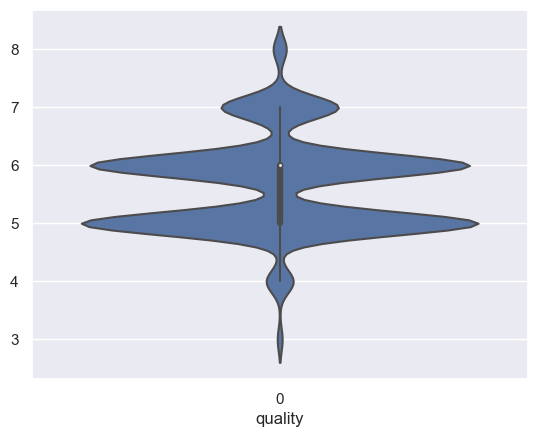

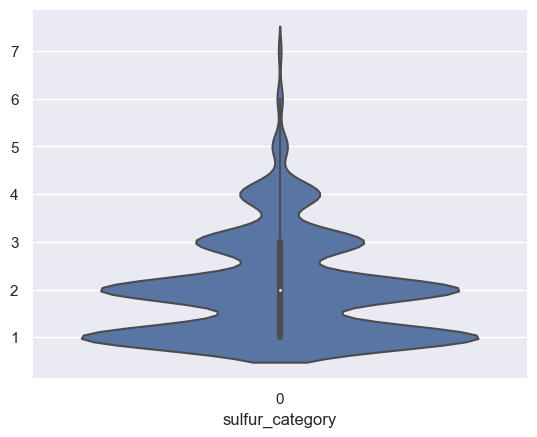

In [224]:
for i in df1.columns:
    sns.violinplot(df1[i])
    plt.xlabel(i)
    plt.show()

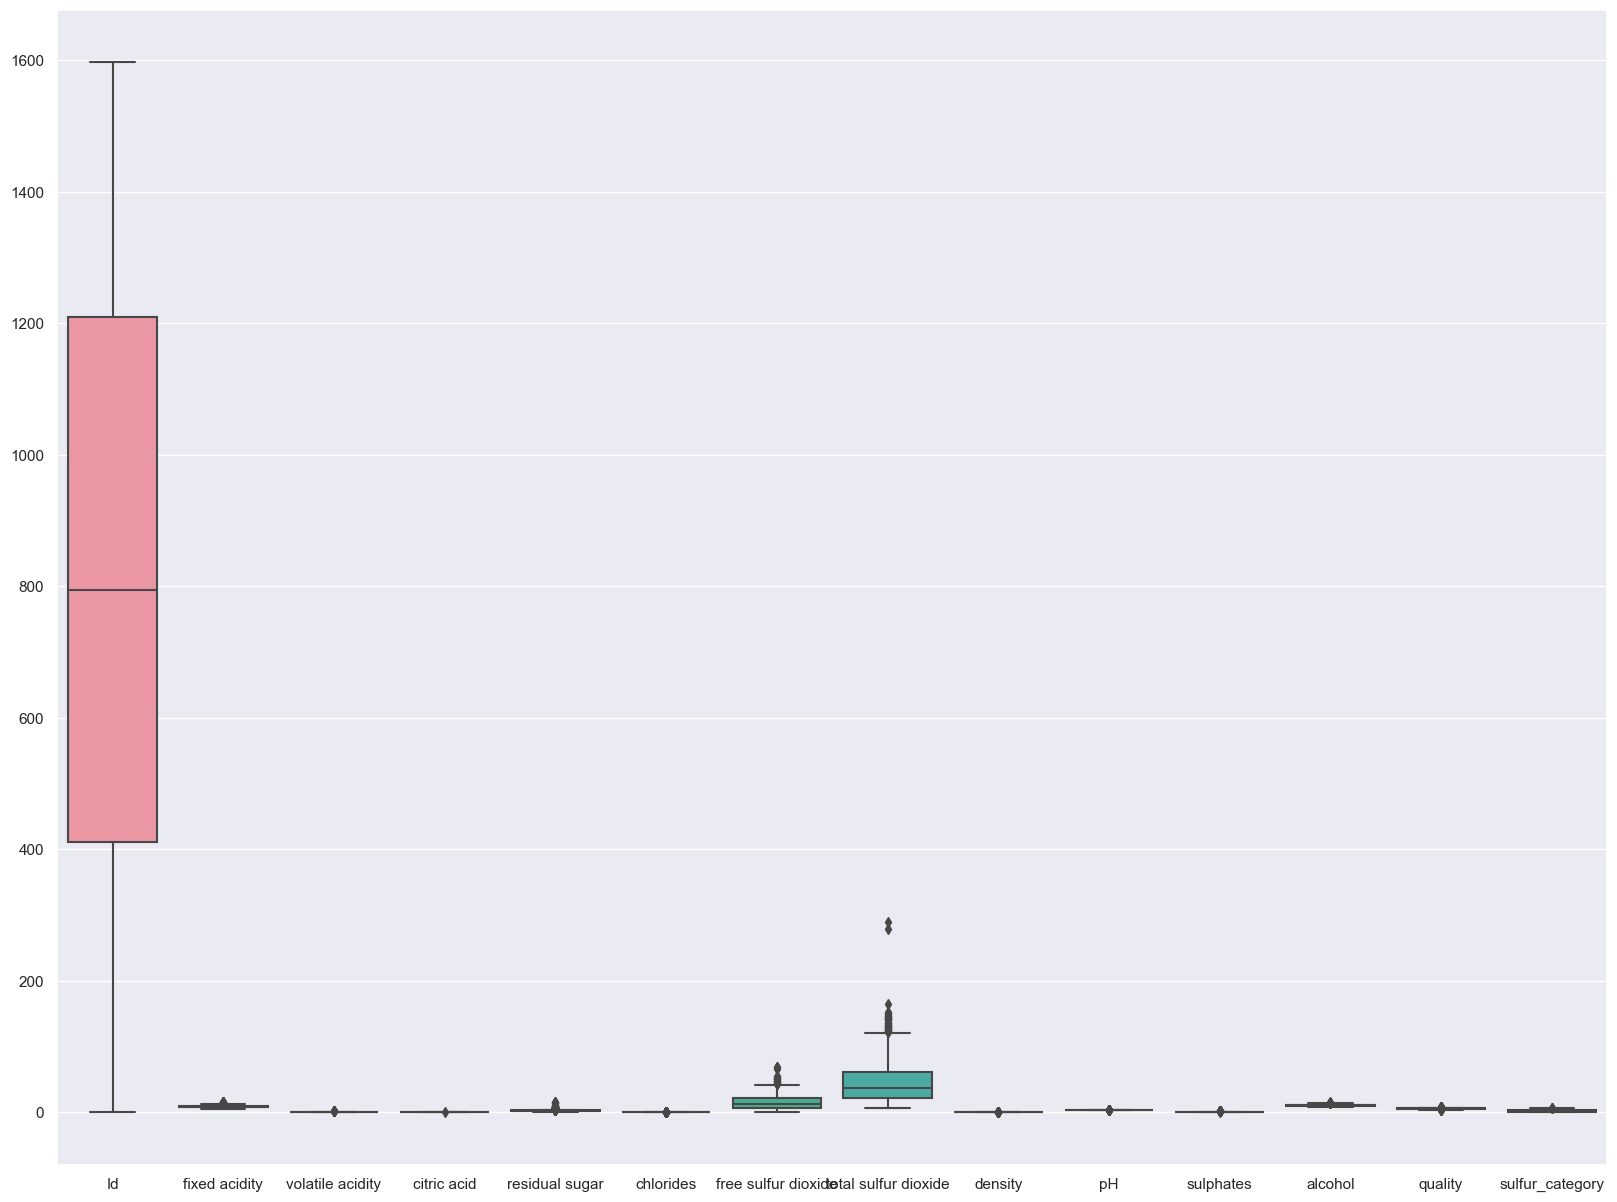

In [225]:
plt.figure(figsize = (20, 15))
sns.boxplot(df1)
plt.show()


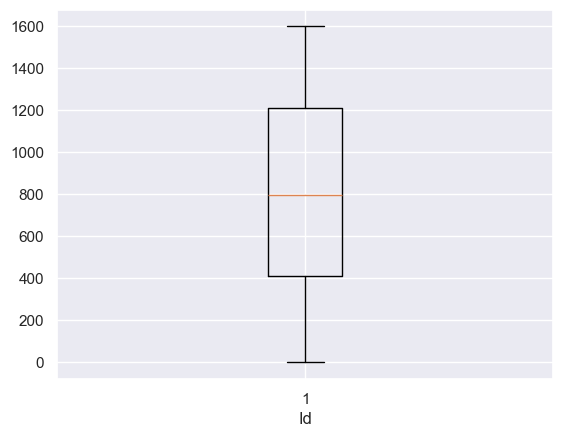

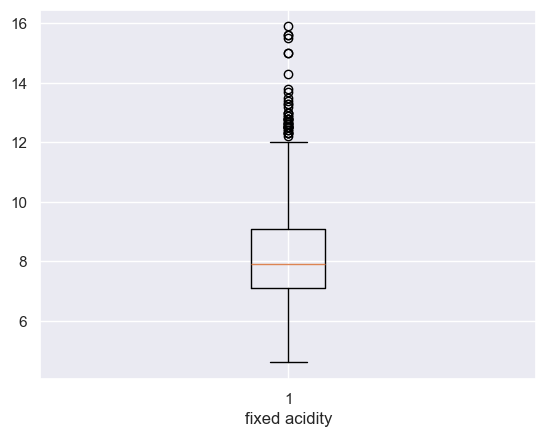

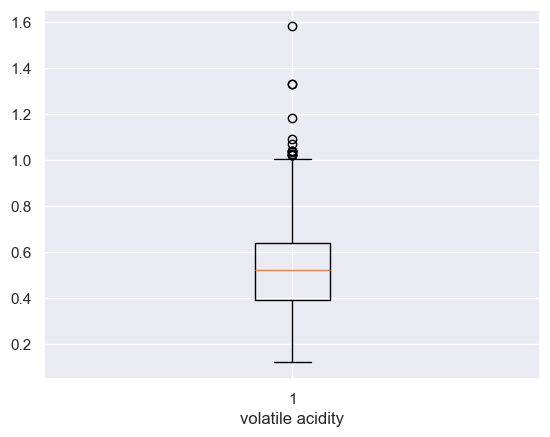

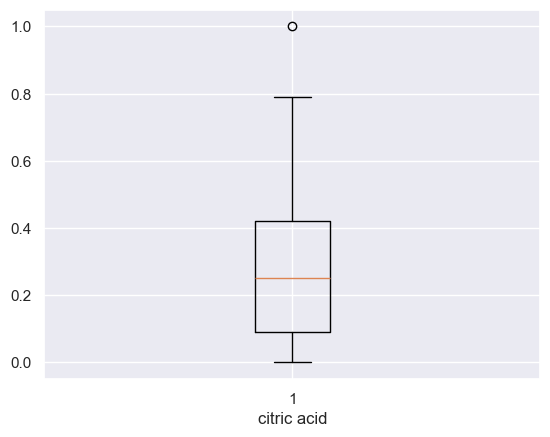

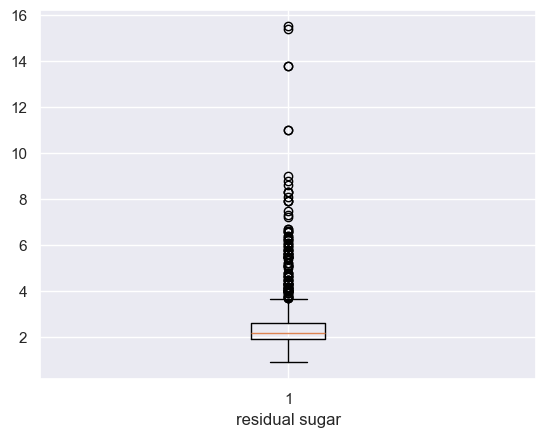

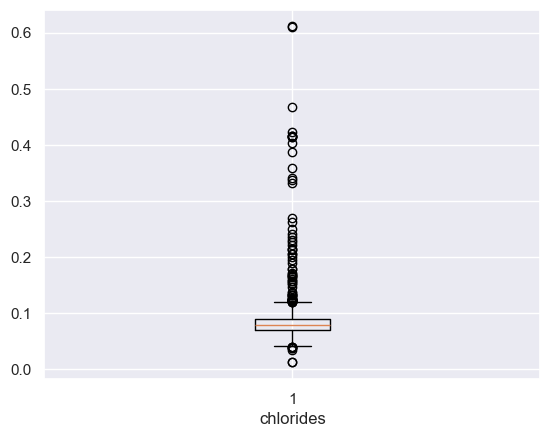

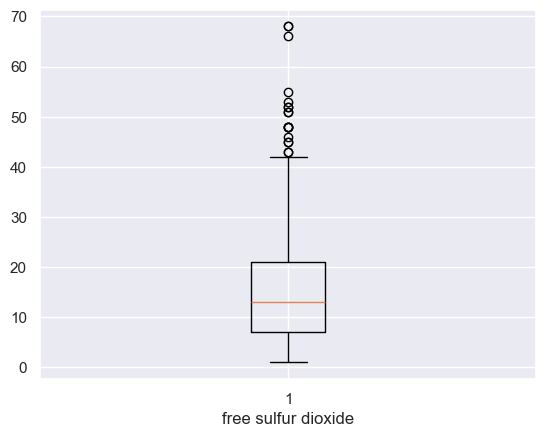

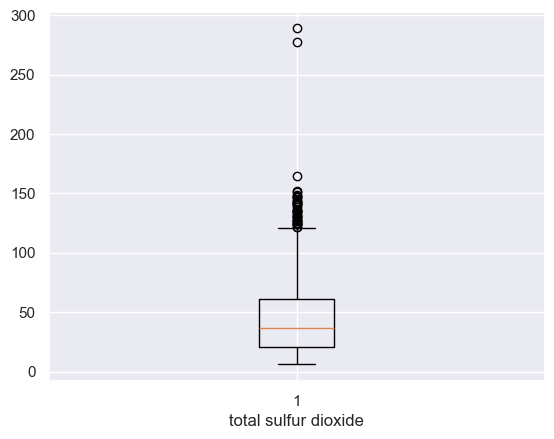

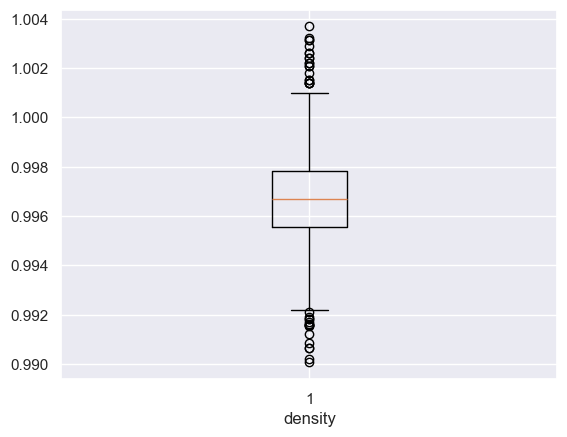

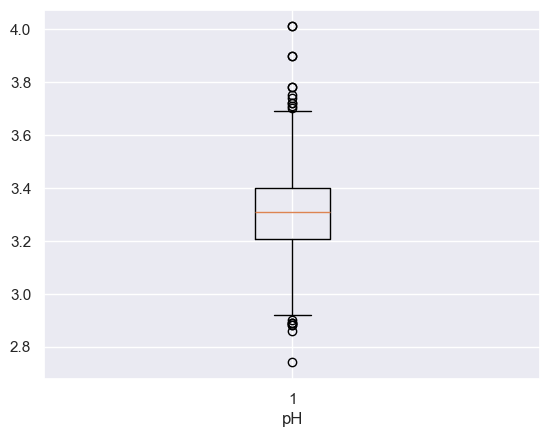

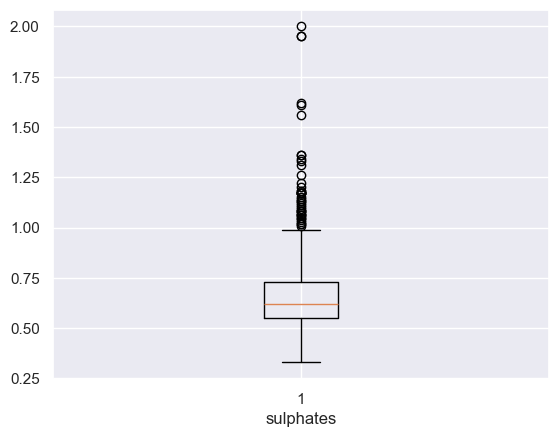

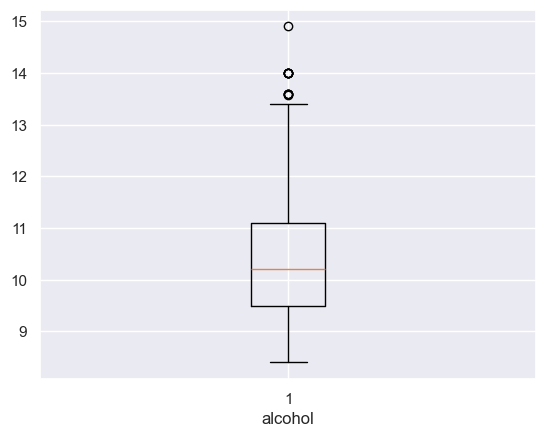

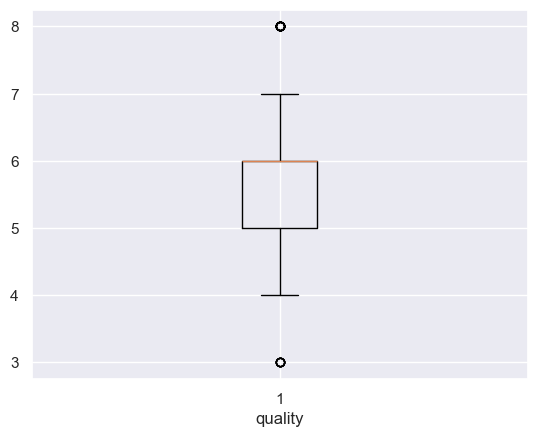

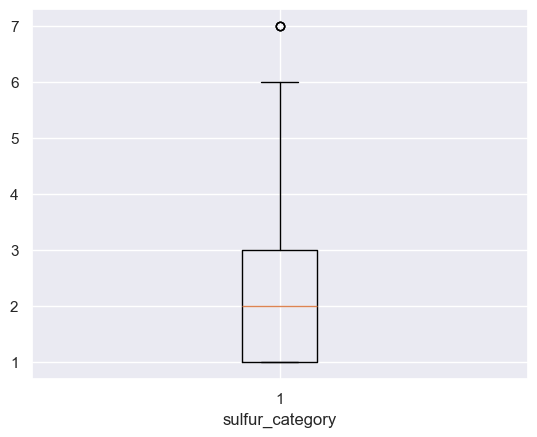

In [226]:
for i in df1.columns:
    plt.boxplot(df1[i])
    plt.xlabel(i)
    plt.show()


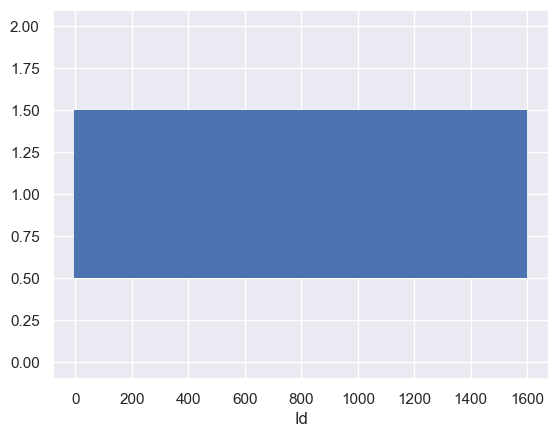

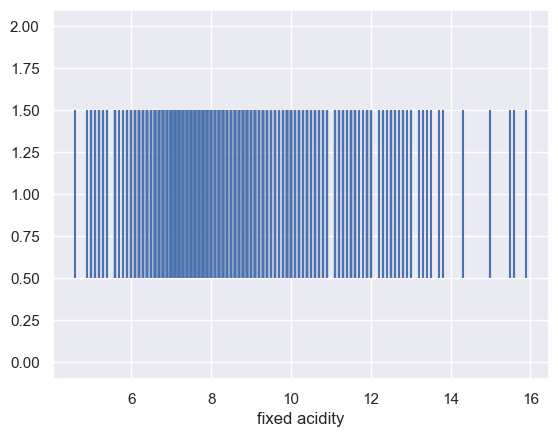

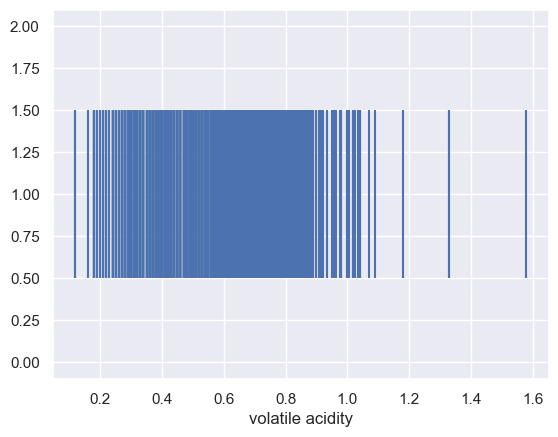

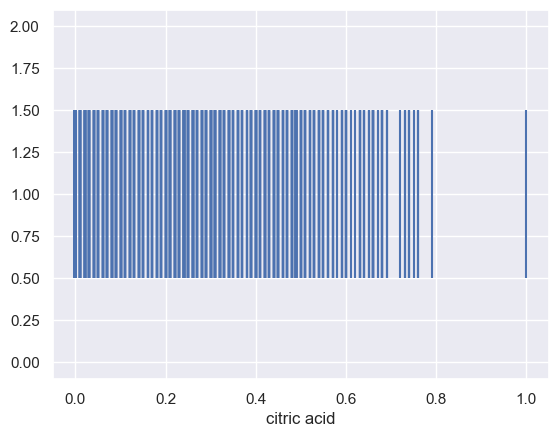

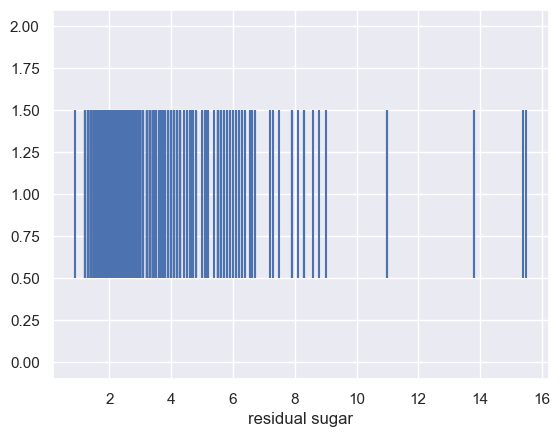

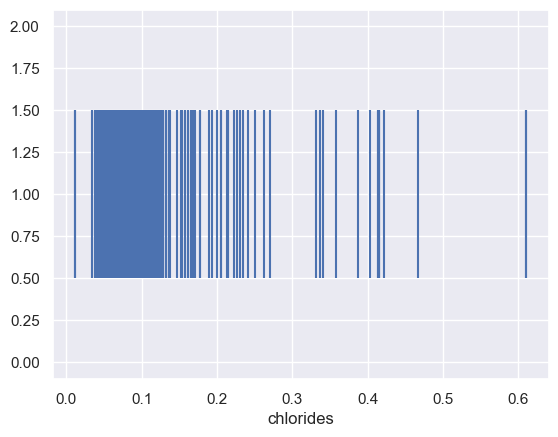

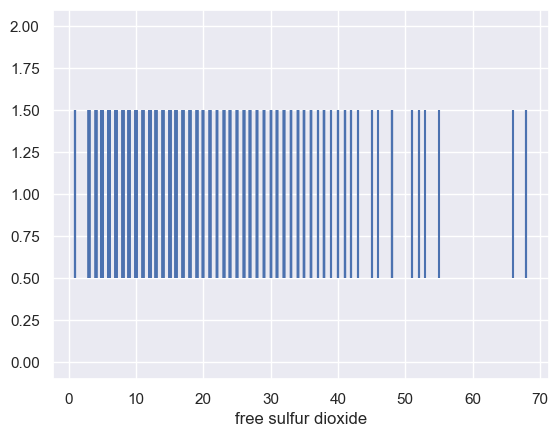

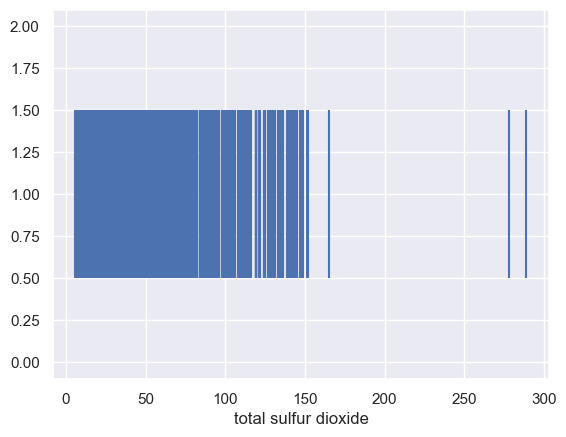

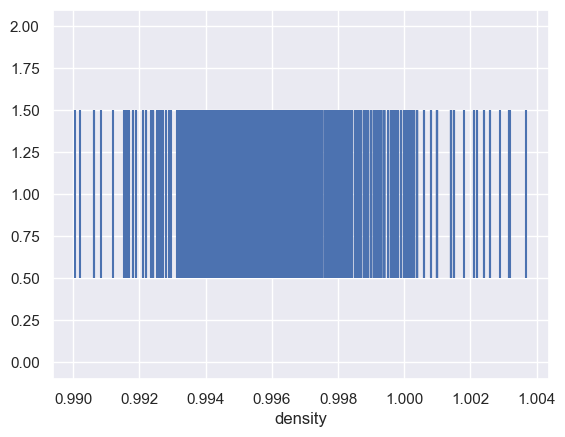

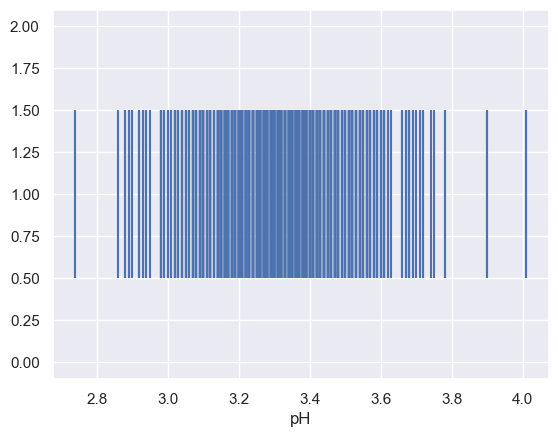

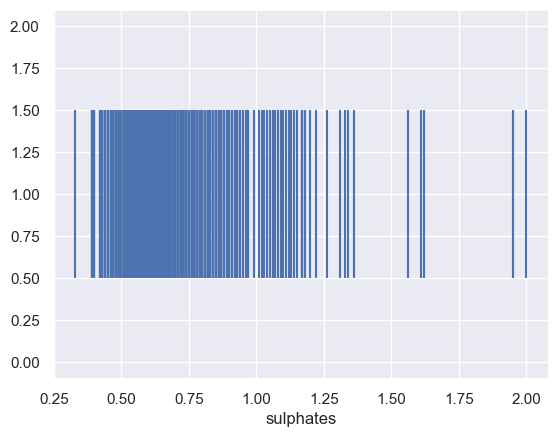

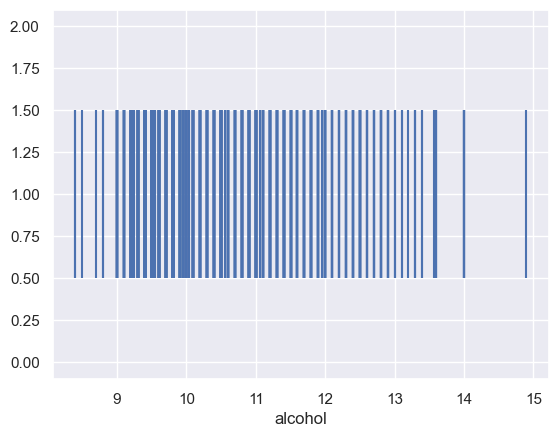

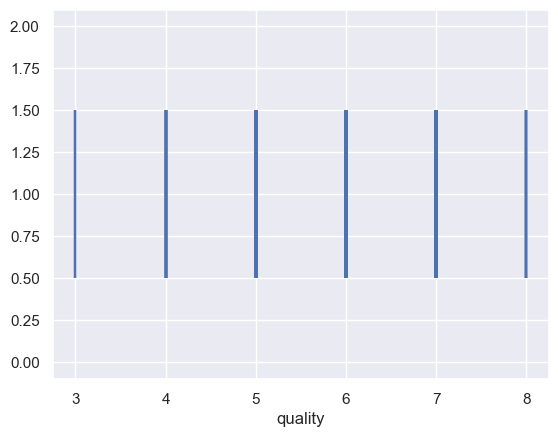

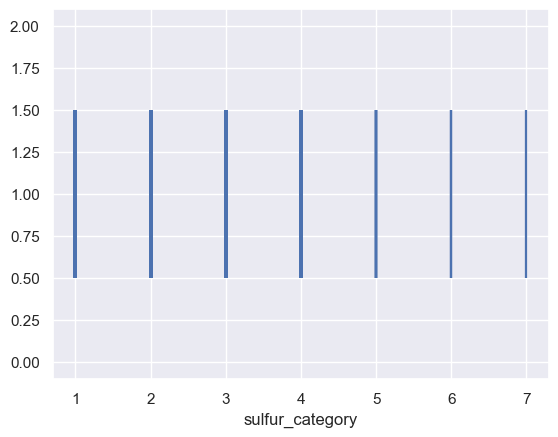

In [227]:

for i in df1.columns:
    plt.eventplot(df1[i])
    plt.xlabel(i)
    plt.show()


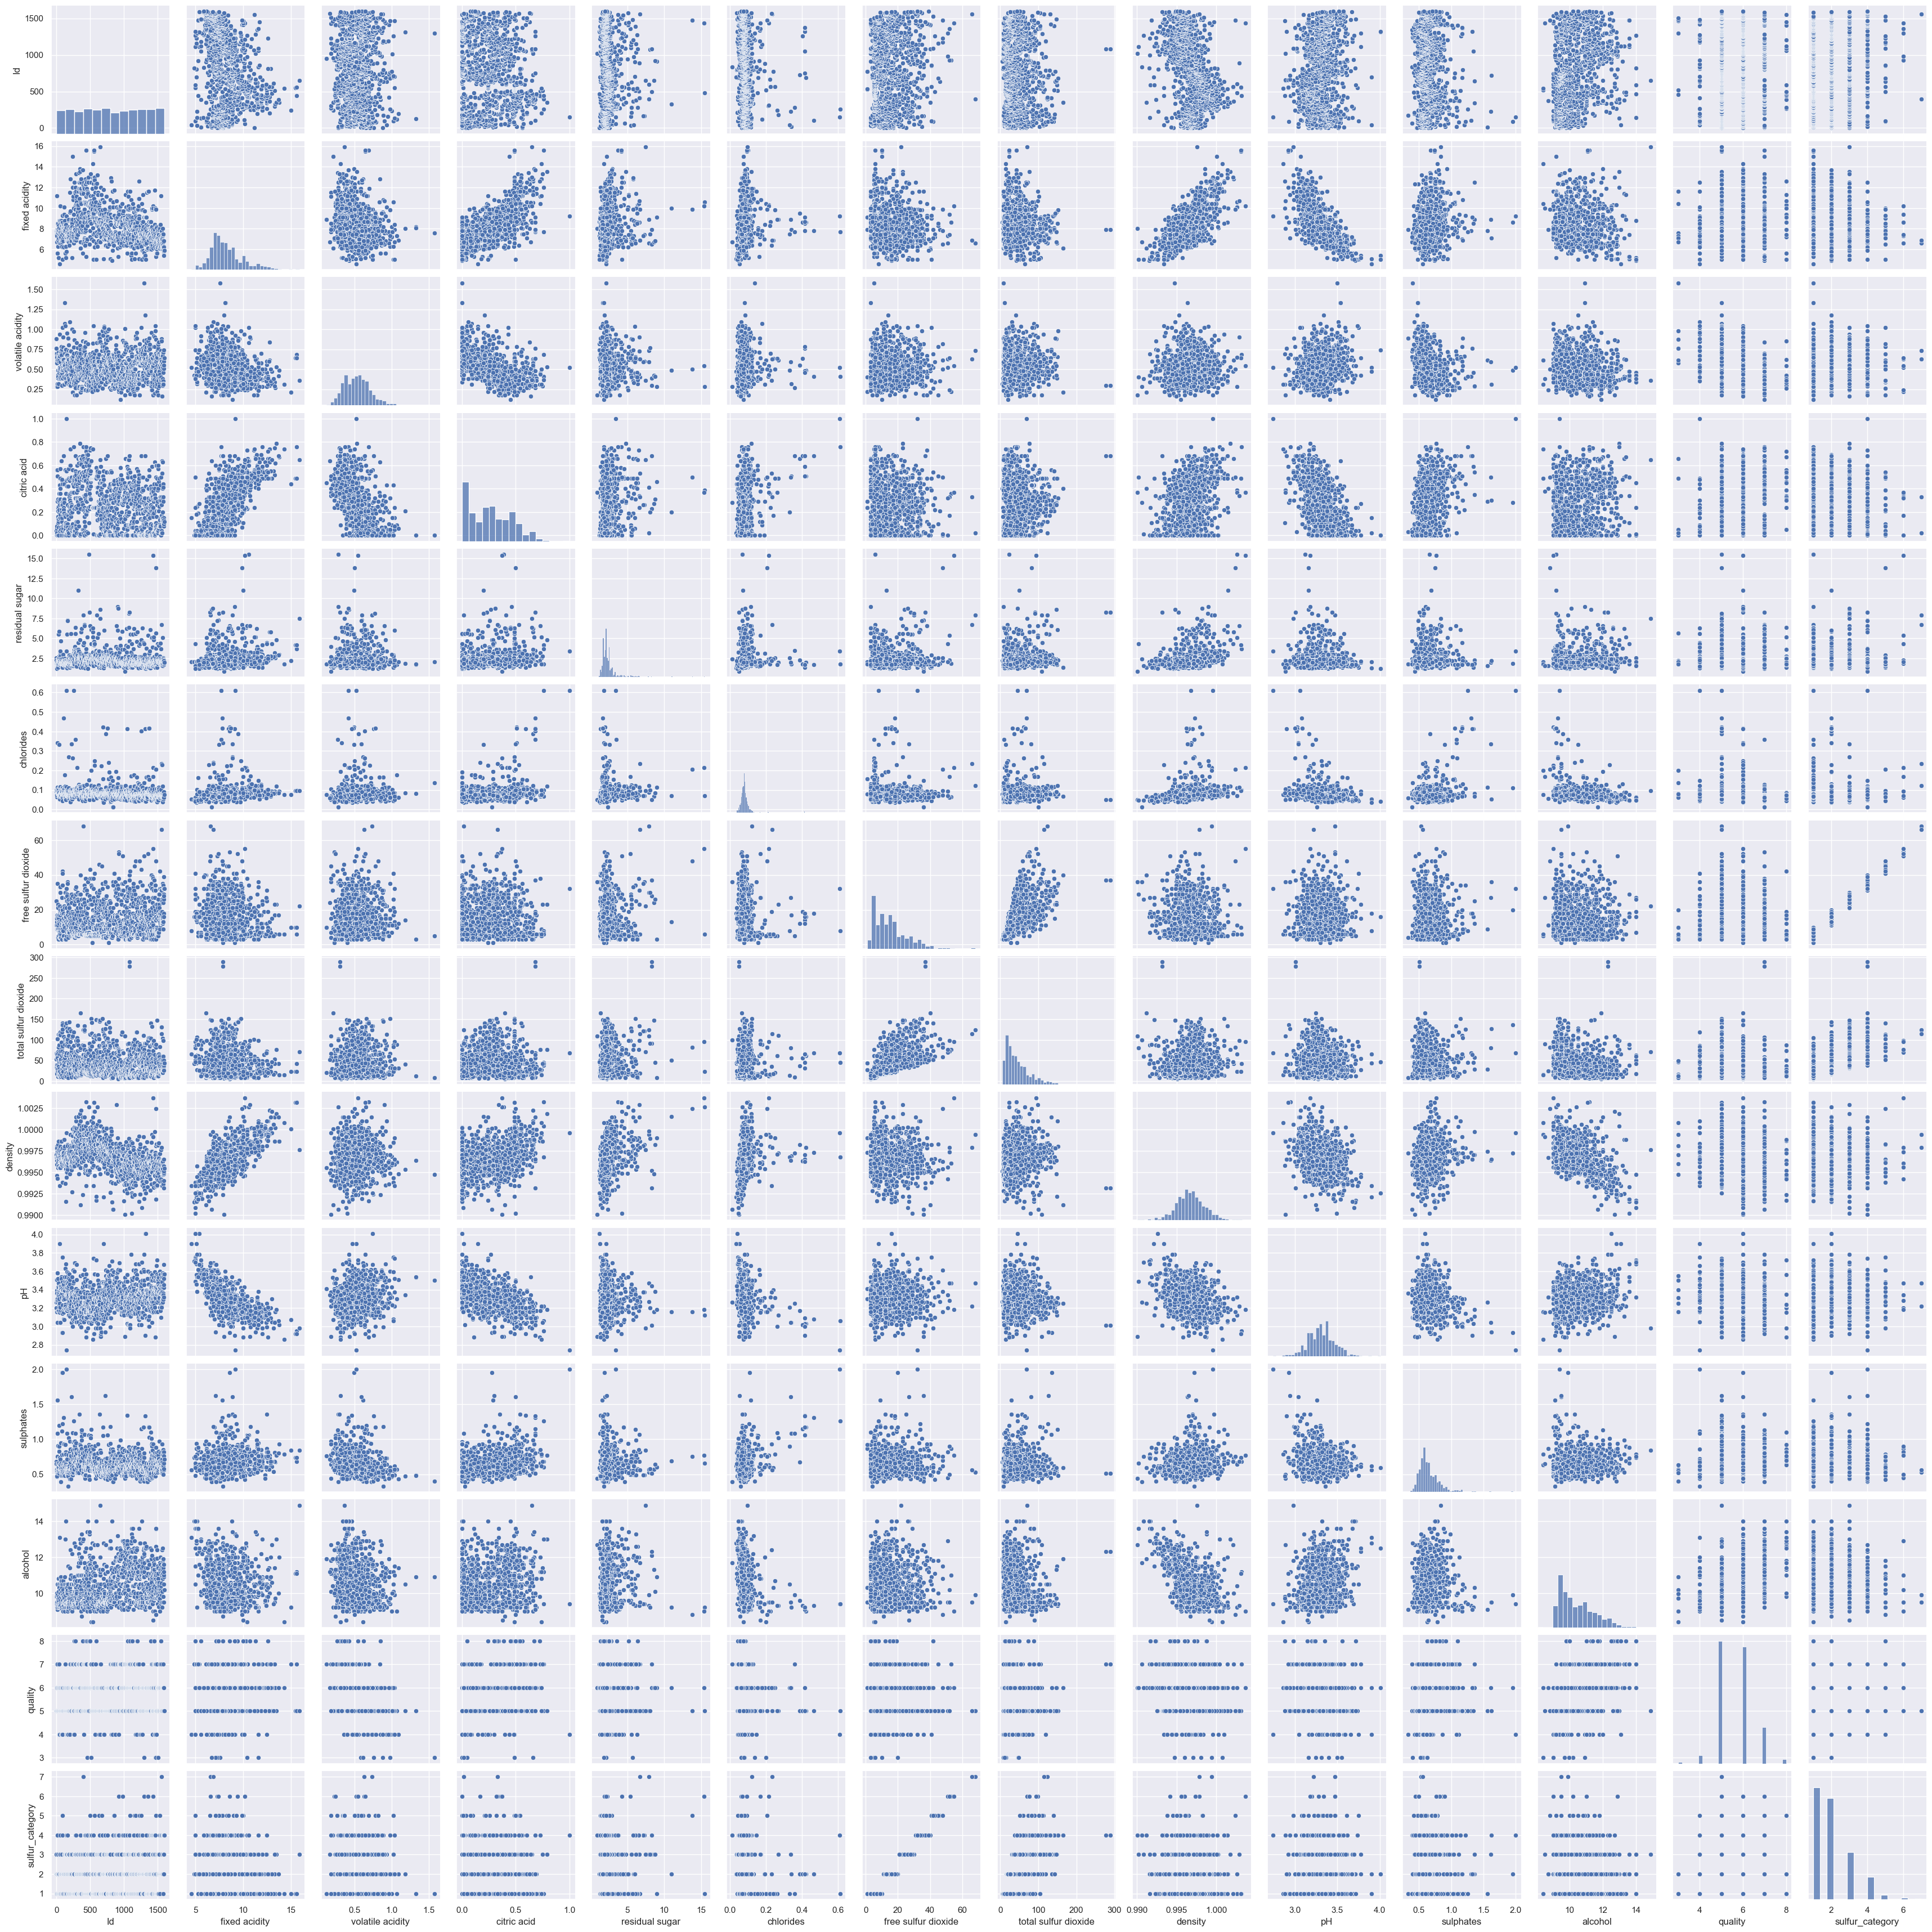

In [228]:
sns.pairplot(df1)
plt.show()

<Axes: xlabel='fixed acidity'>

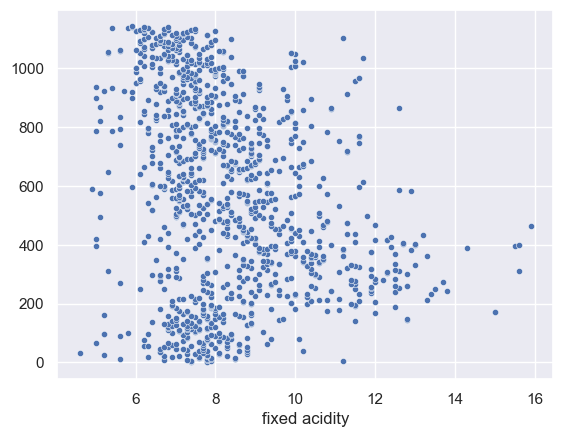

In [229]:
sns.scatterplot(df1, x="fixed acidity", y= df1.index, s=20)

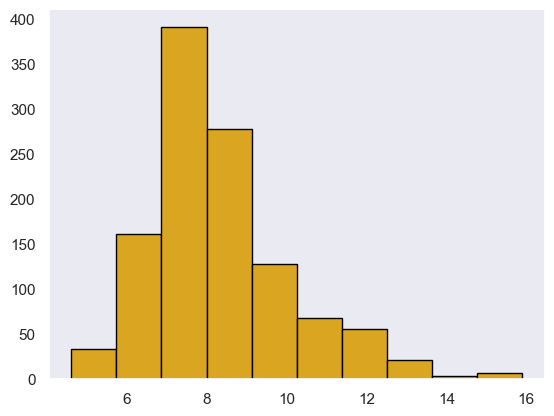

In [230]:
df1["fixed acidity"].hist(bins=10, color="goldenrod", edgecolor="black")
plt.grid(False)

<Axes: xlabel='fixed acidity', ylabel='Density'>

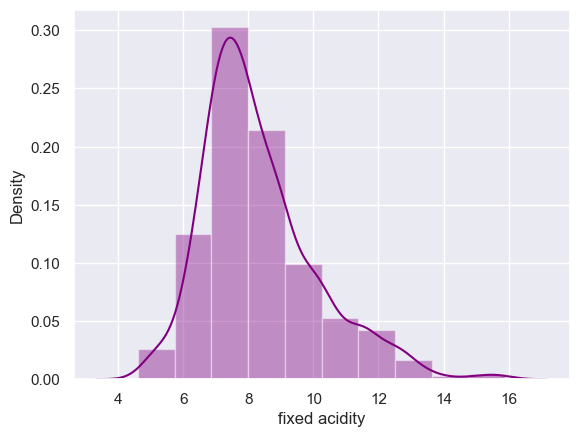

In [231]:
sns.distplot(df1["fixed acidity"], kde = True, color = 'purple', bins=10)

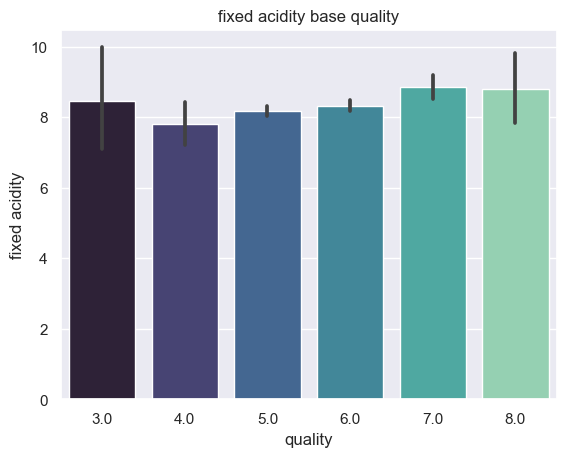

In [232]:
sns.barplot(df1, x = "quality", y = "fixed acidity", palette = "mako")
plt.title("fixed acidity base quality")
plt.xlabel("quality")
plt.ylabel("fixed acidity")
plt.show()

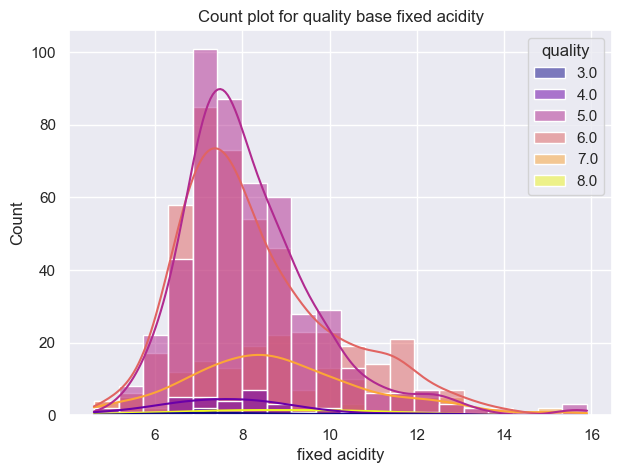

In [233]:
plt.figure(figsize = (7, 5))
sns.histplot(df1, x = "fixed acidity" , hue = "quality" , kde = True, bins = 20, palette = "plasma")
plt.title("Count plot for quality base fixed acidity")
plt.xlabel("fixed acidity")
plt.ylabel("Count")
plt.show()

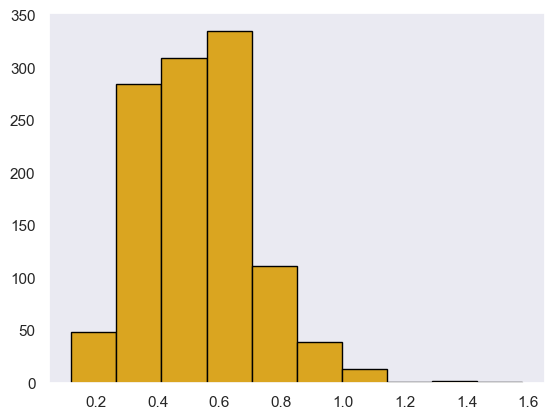

In [234]:
df1["volatile acidity"].hist(bins=10, color="goldenrod", edgecolor="black")
plt.grid(False)

<Axes: xlabel='volatile acidity', ylabel='Density'>

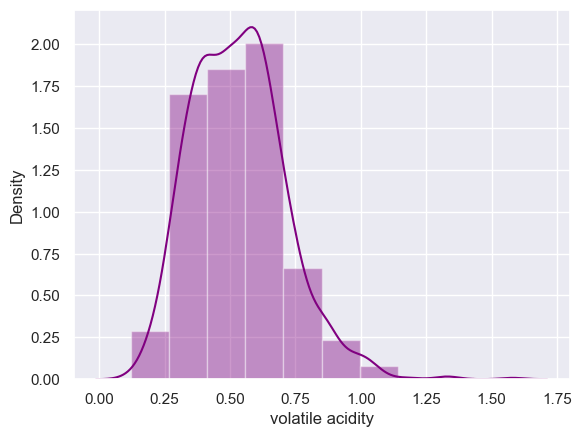

In [235]:
sns.distplot(df1["volatile acidity"], kde = True, color = 'purple', bins=10)

<Axes: xlabel='volatile acidity'>

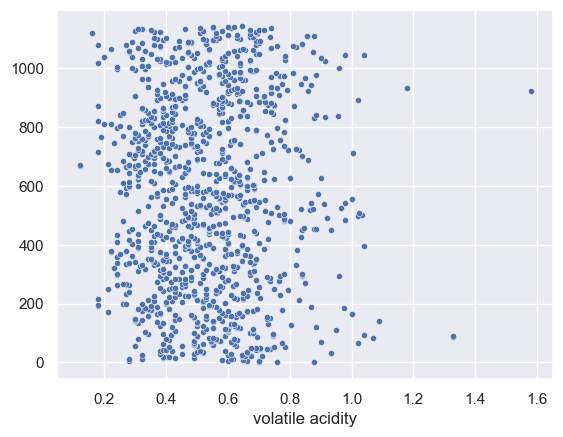

In [236]:
sns.scatterplot(df1, x="volatile acidity", y= df1.index, s=20)


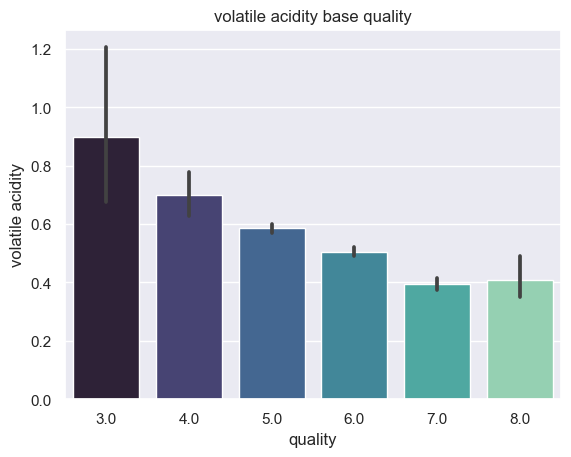

In [237]:
sns.barplot(df1, x = "quality", y = "volatile acidity", palette = "mako")
plt.title("volatile acidity base quality")
plt.xlabel("quality")
plt.ylabel("volatile acidity")
plt.show()

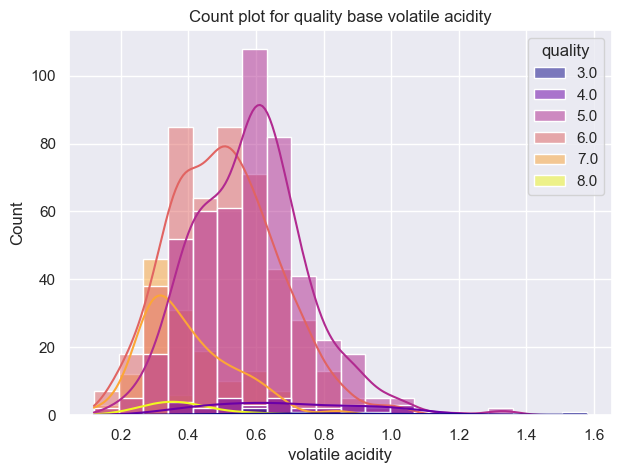

In [238]:
plt.figure(figsize = (7, 5))
sns.histplot(df1, x = "volatile acidity" , hue = "quality" , kde = True, bins = 20, palette = "plasma")
plt.title("Count plot for quality base volatile acidity")
plt.xlabel("volatile acidity")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='citric acid'>

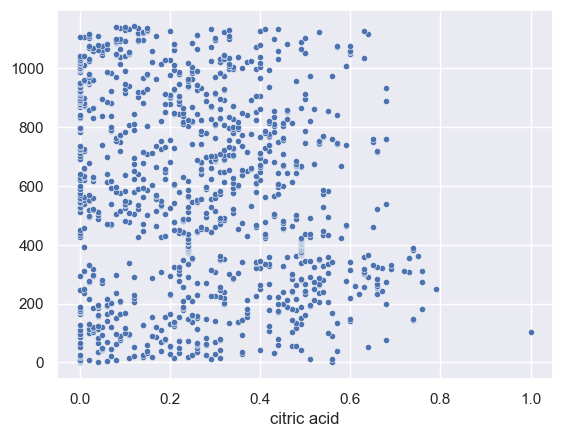

In [239]:
sns.scatterplot(df1, x="citric acid", y= df1.index, s=20)

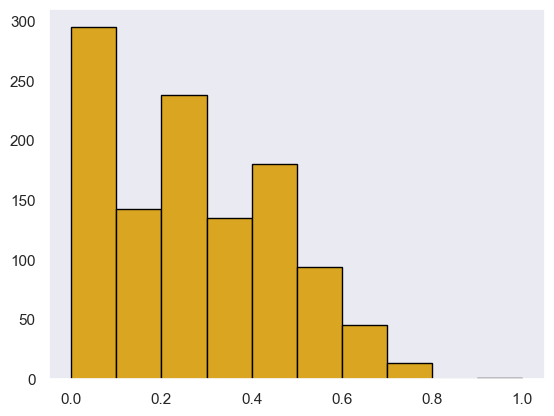

In [240]:
df1["citric acid"].hist(bins=10, color="goldenrod", edgecolor="black")
plt.grid(False)

<Axes: xlabel='citric acid', ylabel='Density'>

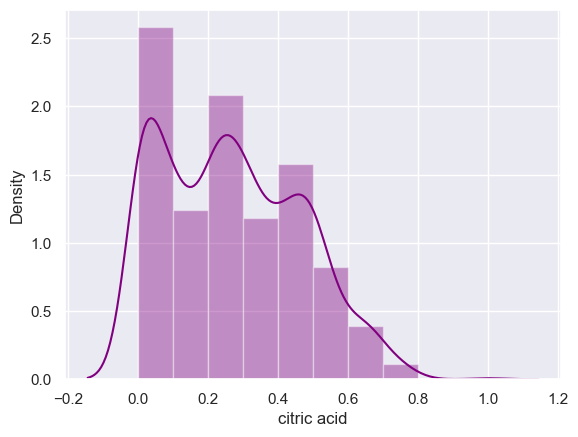

In [241]:
sns.distplot(df1["citric acid"], kde = True, color = 'purple', bins=10)

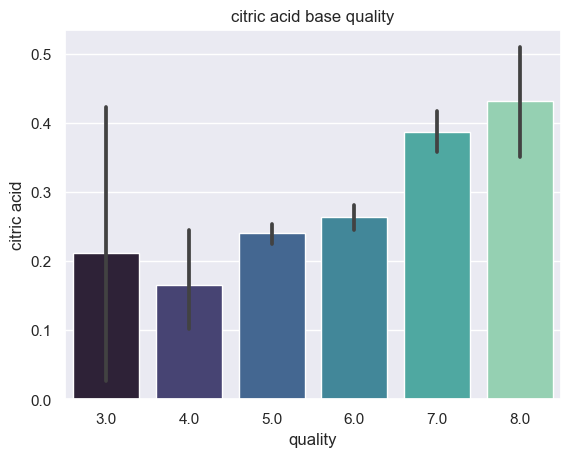

In [242]:
sns.barplot(df1, x = "quality", y = "citric acid", palette = "mako")
plt.title("citric acid base quality")
plt.xlabel("quality")
plt.ylabel("citric acid")
plt.show()

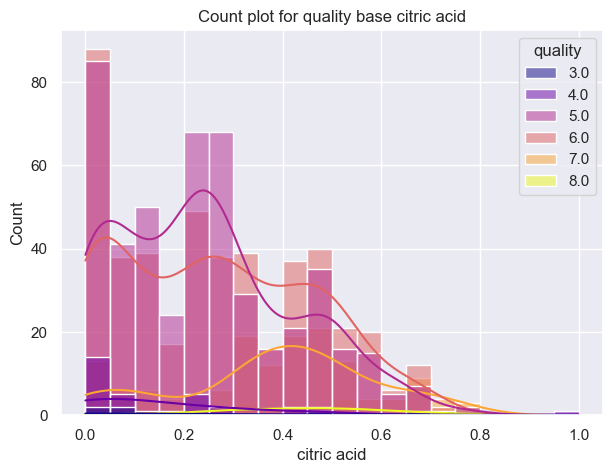

In [243]:
plt.figure(figsize = (7, 5))
sns.histplot(df1, x = "citric acid" , hue = "quality" , kde = True, bins = 20, palette = "plasma")
plt.title("Count plot for quality base citric acid")
plt.xlabel("citric acid")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='residual sugar'>

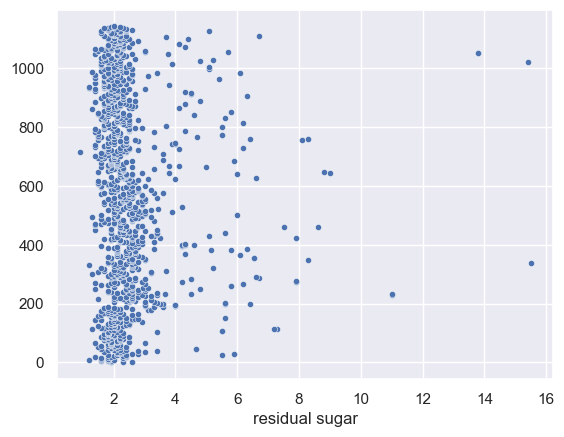

In [244]:
sns.scatterplot(df1, x="residual sugar", y= df1.index, s=20)

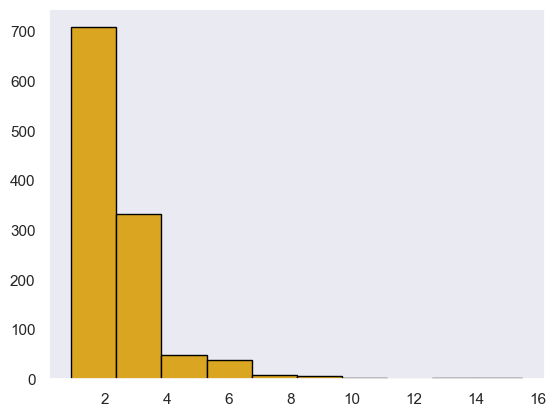

In [245]:
df1["residual sugar"].hist(bins=10, color="goldenrod", edgecolor="black")
plt.grid(False)

<Axes: xlabel='residual sugar', ylabel='Density'>

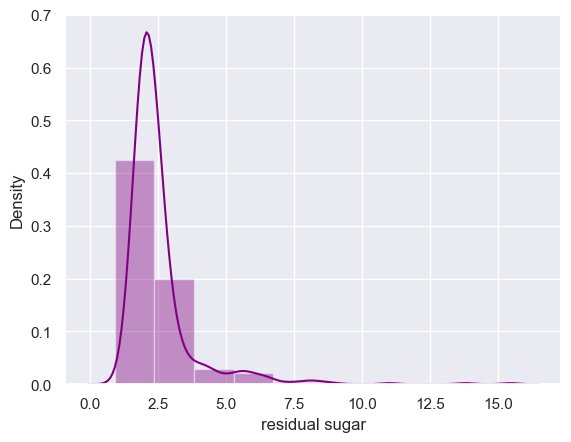

In [246]:
sns.distplot(df1["residual sugar"], kde = True, color = 'purple', bins=10)

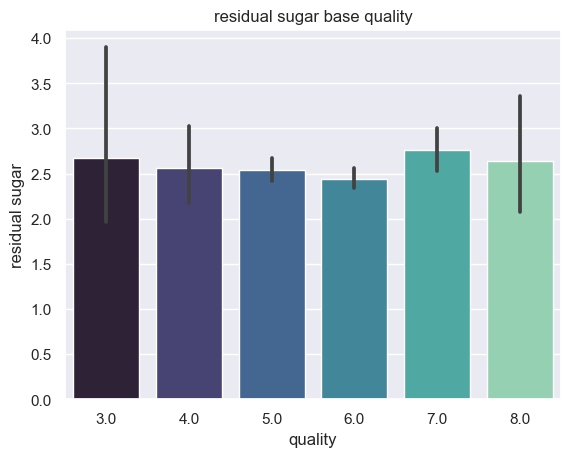

In [247]:
sns.barplot(df1, x = "quality", y = "residual sugar", palette = "mako")
plt.title("residual sugar base quality")
plt.xlabel("quality")
plt.ylabel("residual sugar")
plt.show()

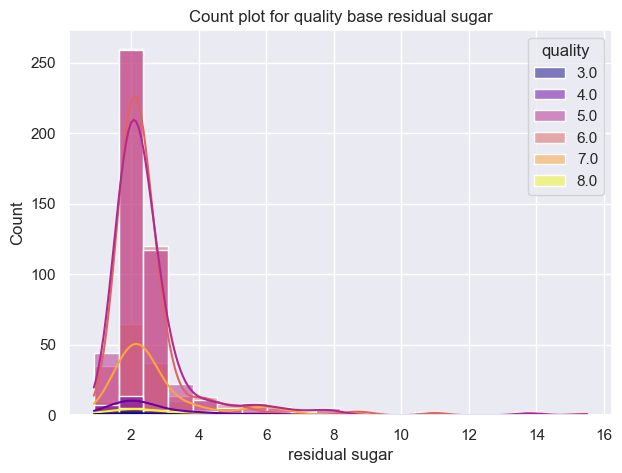

In [248]:
plt.figure(figsize = (7, 5))
sns.histplot(df1, x = "residual sugar" , hue = "quality" , kde = True, bins = 20, palette = "plasma")
plt.title("Count plot for quality base residual sugar")
plt.xlabel("residual sugar")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='chlorides'>

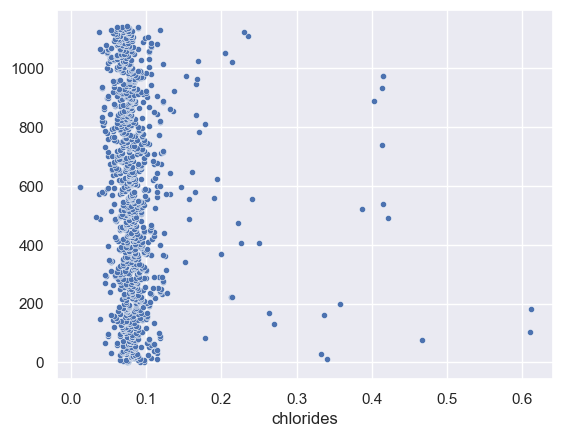

In [249]:
sns.scatterplot(df1, x="chlorides", y= df1.index, s=20)


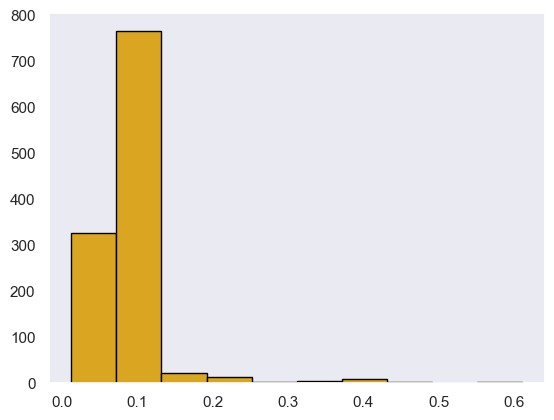

In [250]:
df1["chlorides"].hist(bins=10, color="goldenrod", edgecolor="black")
plt.grid(False)

<Axes: xlabel='chlorides', ylabel='Density'>

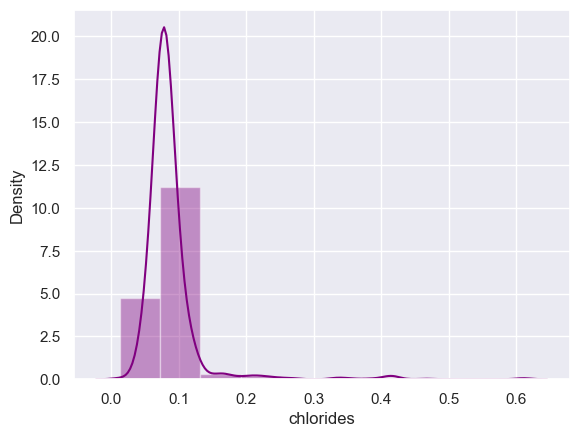

In [251]:
sns.distplot(df1["chlorides"], kde = True, color = 'purple', bins=10)

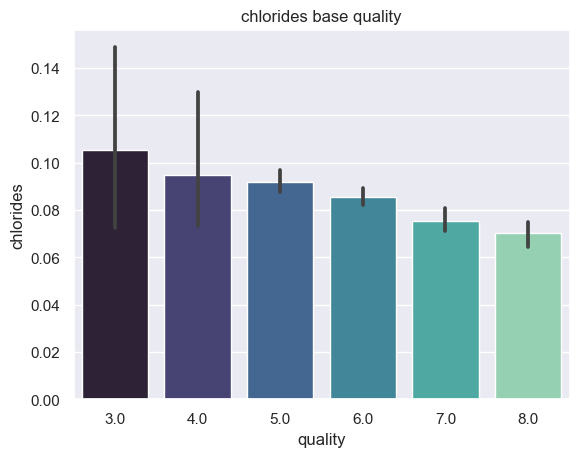

In [252]:
sns.barplot(df1, x = "quality", y = "chlorides", palette = "mako")
plt.title("chlorides base quality")
plt.xlabel("quality")
plt.ylabel("chlorides")
plt.show()

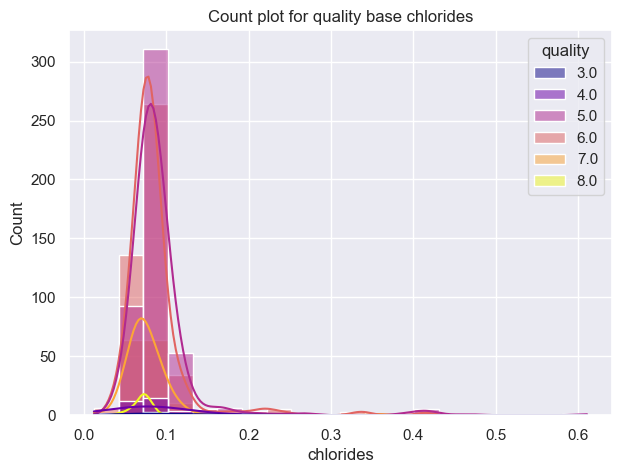

In [253]:
plt.figure(figsize = (7, 5))
sns.histplot(df1, x = "chlorides" , hue = "quality" , kde = True, bins = 20, palette = "plasma")
plt.title("Count plot for quality base chlorides")
plt.xlabel("chlorides")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='free sulfur dioxide'>

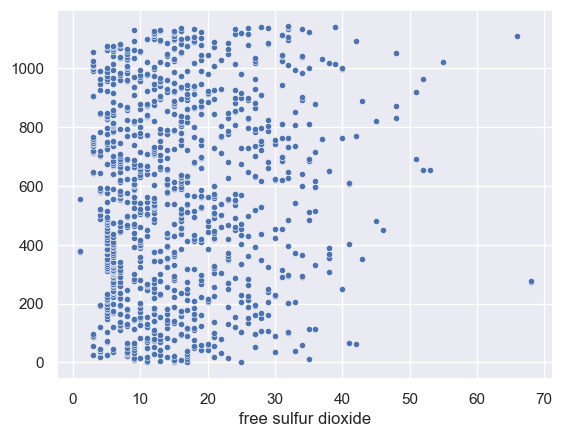

In [254]:
sns.scatterplot(df1, x="free sulfur dioxide", y= df1.index, s=20)

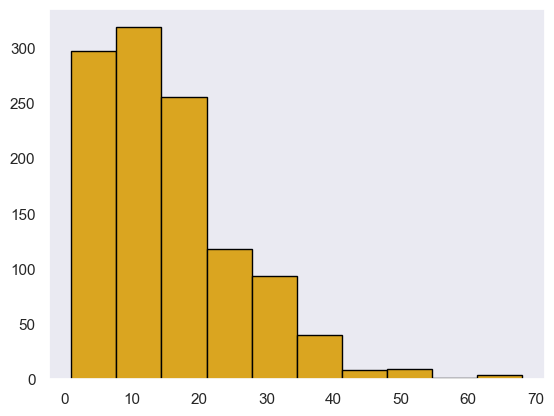

In [255]:
df1["free sulfur dioxide"].hist(bins=10, color="goldenrod", edgecolor="black")
plt.grid(False)

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

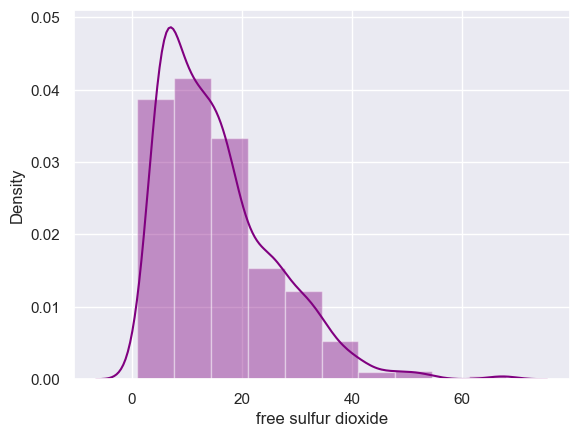

In [256]:
sns.distplot(df1["free sulfur dioxide"], kde = True, color = 'purple', bins=10)

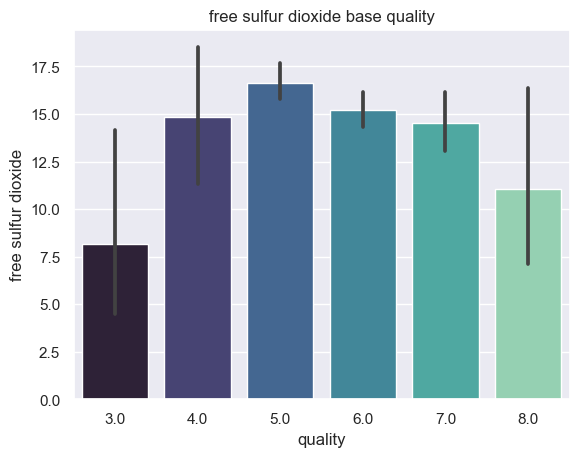

In [257]:
sns.barplot(df1, x = "quality", y = "free sulfur dioxide", palette = "mako")
plt.title("free sulfur dioxide base quality")
plt.xlabel("quality")
plt.ylabel("free sulfur dioxide")
plt.show()

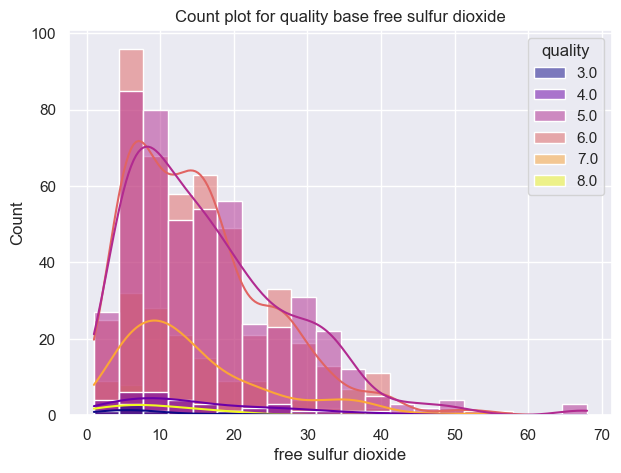

In [258]:
plt.figure(figsize = (7, 5))
sns.histplot(df1, x = "free sulfur dioxide" , hue = "quality" , kde = True, bins = 20, palette = "plasma")
plt.title("Count plot for quality base free sulfur dioxide")
plt.xlabel("free sulfur dioxide")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='total sulfur dioxide'>

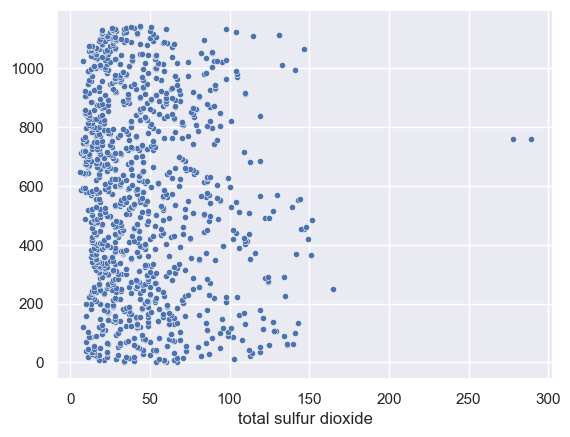

In [259]:
sns.scatterplot(df1, x="total sulfur dioxide", y= df1.index, s=20)

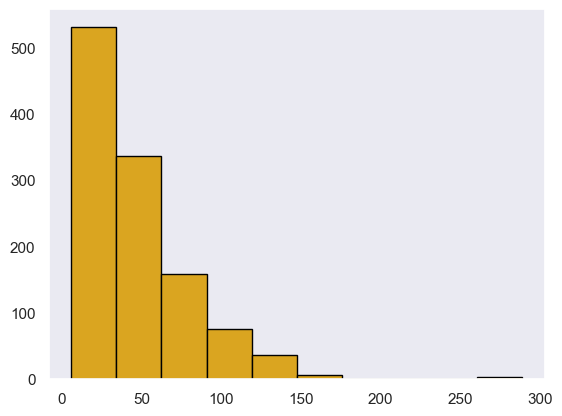

In [260]:
df1["total sulfur dioxide"].hist(bins=10, color="goldenrod", edgecolor="black")
plt.grid(False)

<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

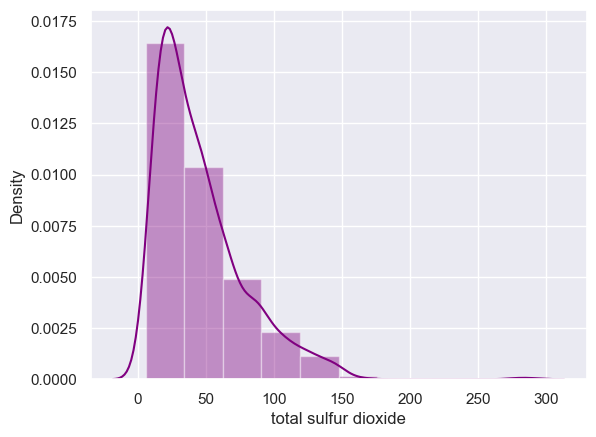

In [261]:
sns.distplot(df1["total sulfur dioxide"], kde = True, color = 'purple', bins=10)

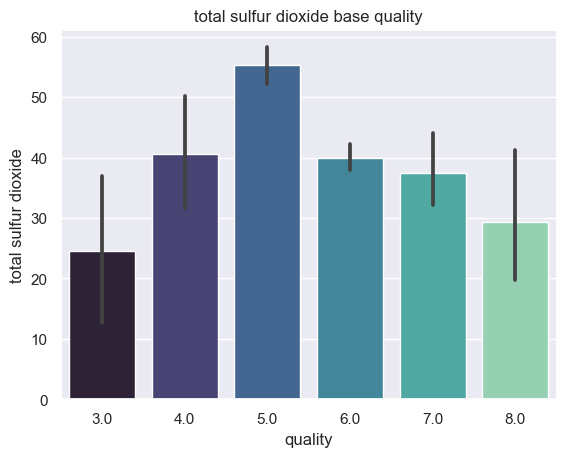

In [262]:
sns.barplot(df1, x = "quality", y = "total sulfur dioxide", palette = "mako")
plt.title("total sulfur dioxide base quality")
plt.xlabel("quality")
plt.ylabel("total sulfur dioxide")
plt.show()

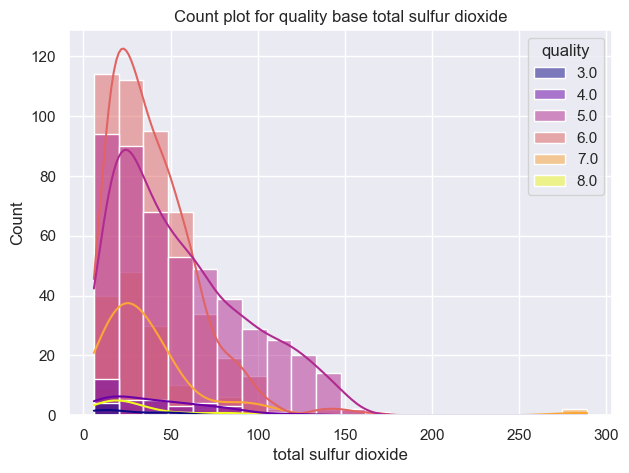

In [263]:
plt.figure(figsize = (7, 5))
sns.histplot(df1, x = "total sulfur dioxide" , hue = "quality" , kde = True, bins = 20, palette = "plasma")
plt.title("Count plot for quality base total sulfur dioxide")
plt.xlabel("total sulfur dioxide")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='density'>

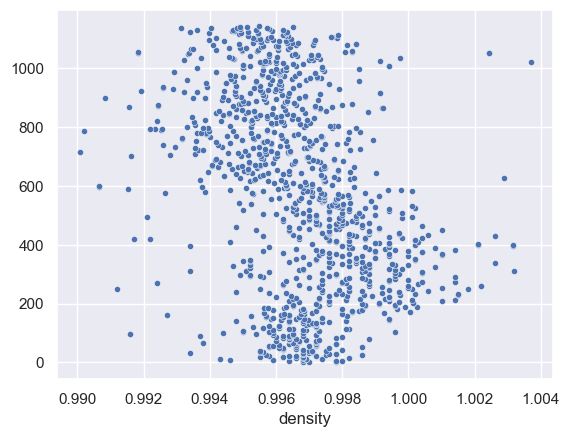

In [264]:
sns.scatterplot(df1, x="density", y= df1.index, s=20)

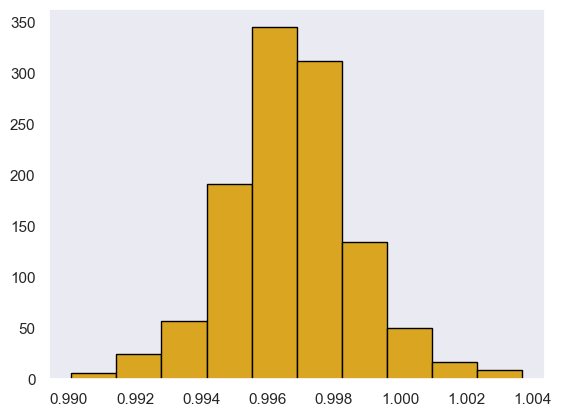

In [265]:
df1["density"].hist(bins=10, color="goldenrod", edgecolor="black")
plt.grid(False)

<Axes: xlabel='density', ylabel='Density'>

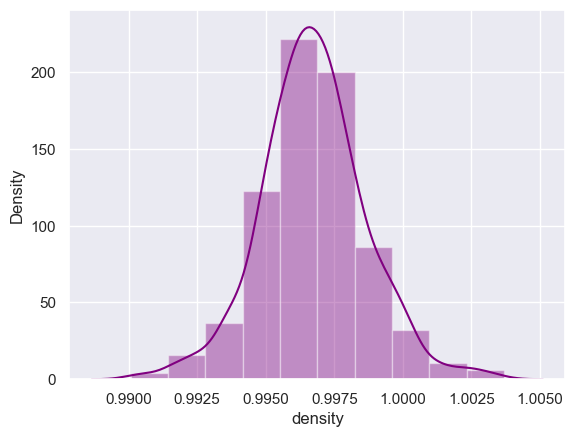

In [266]:
sns.distplot(df1["density"], kde = True, color = 'purple', bins=10)

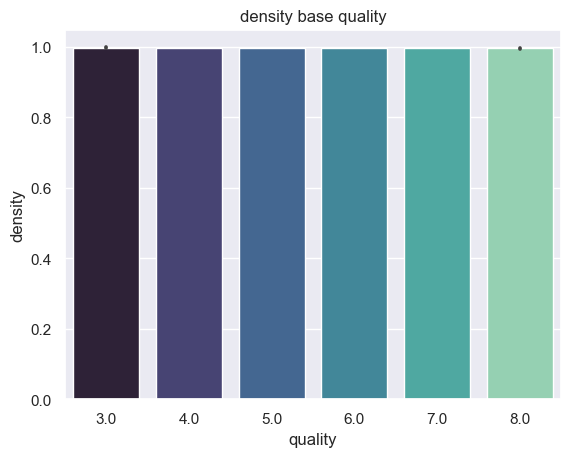

In [267]:
sns.barplot(df1, x = "quality", y = "density", palette = "mako")
plt.title("density base quality")
plt.xlabel("quality")
plt.ylabel("density")
plt.show()

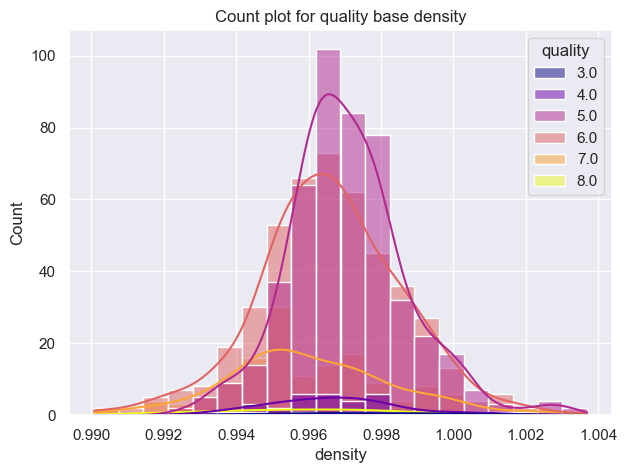

In [268]:
plt.figure(figsize = (7, 5))
sns.histplot(df1, x = "density" , hue = "quality" , kde = True, bins = 20, palette = "plasma")
plt.title("Count plot for quality base density")
plt.xlabel("density")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='pH'>

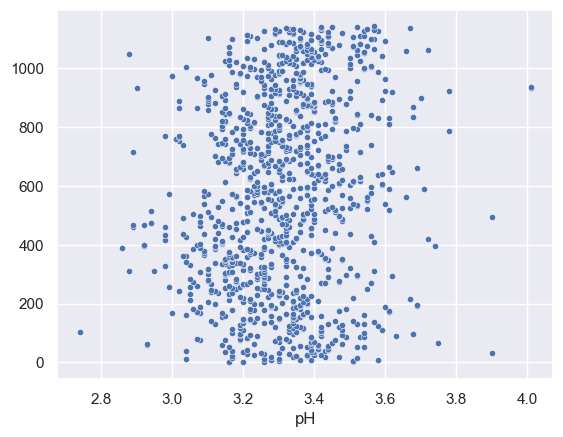

In [269]:
sns.scatterplot(df1, x="pH", y= df1.index, s=20)


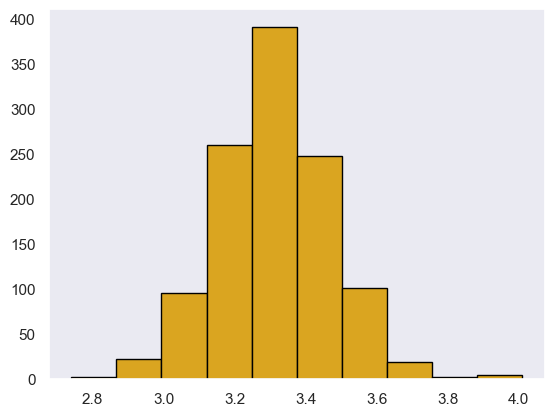

In [270]:
df1["pH"].hist(bins=10, color="goldenrod", edgecolor="black")
plt.grid(False)

<Axes: xlabel='pH', ylabel='Density'>

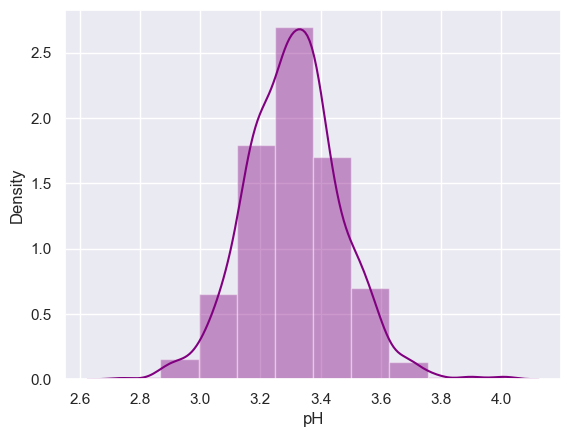

In [271]:
sns.distplot(df1["pH"], kde = True, color = 'purple', bins=10)

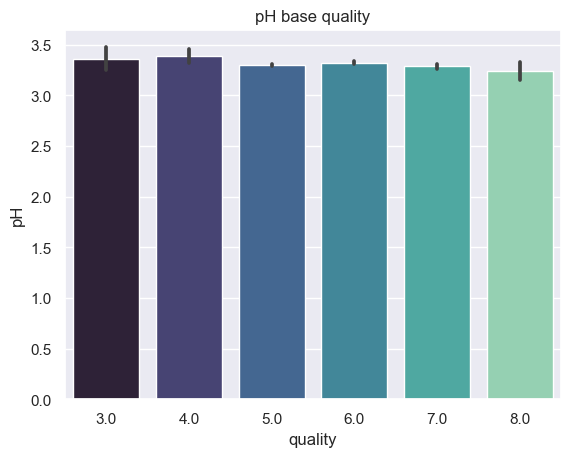

In [272]:
sns.barplot(df1, x = "quality", y = "pH", palette = "mako")
plt.title("pH base quality")
plt.xlabel("quality")
plt.ylabel("pH")
plt.show()

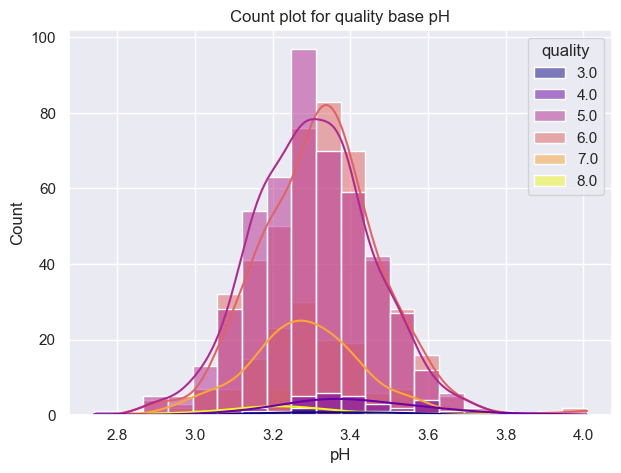

In [273]:
plt.figure(figsize = (7, 5))
sns.histplot(df1, x = "pH" , hue = "quality" , kde = True, bins = 20, palette = "plasma")
plt.title("Count plot for quality base pH")
plt.xlabel("pH")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='sulphates'>

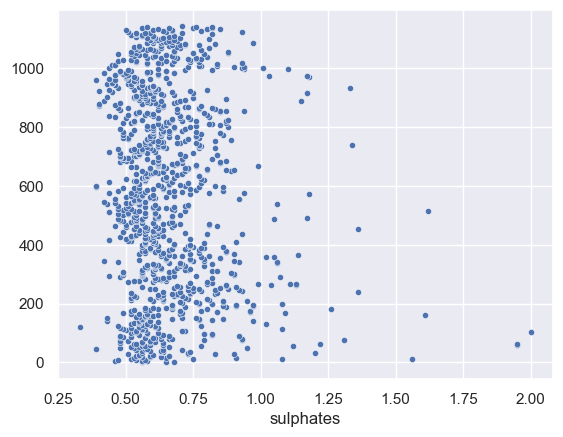

In [274]:
sns.scatterplot(df1, x="sulphates", y= df1.index, s=20)

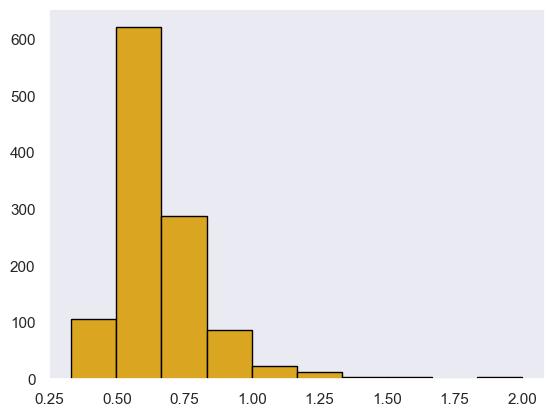

In [275]:
df1["sulphates"].hist(bins=10, color="goldenrod", edgecolor="black")
plt.grid(False)

<Axes: xlabel='sulphates', ylabel='Density'>

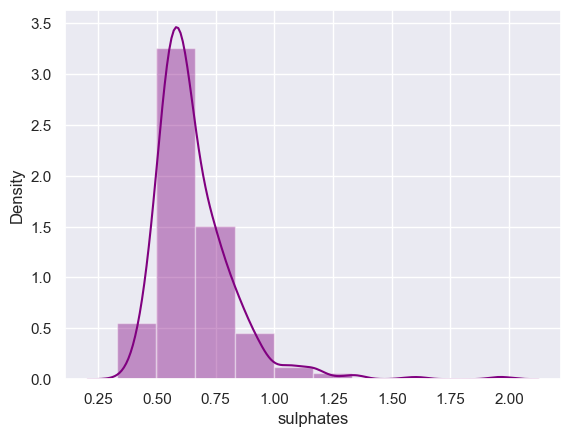

In [276]:
sns.distplot(df1["sulphates"], kde = True, color = 'purple', bins=10)

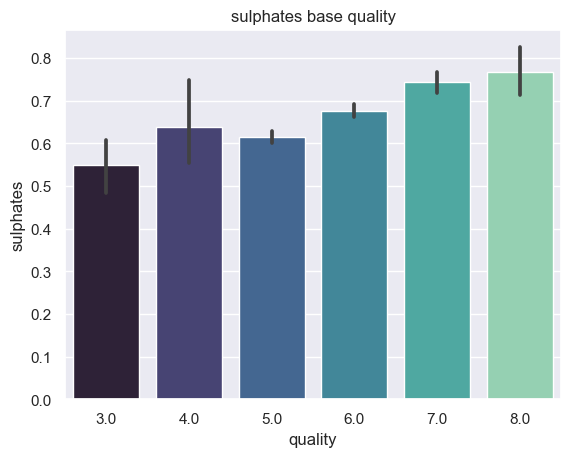

In [277]:
sns.barplot(df1, x = "quality", y = "sulphates", palette = "mako")
plt.title("sulphates base quality")
plt.xlabel("quality")
plt.ylabel("sulphates")
plt.show()

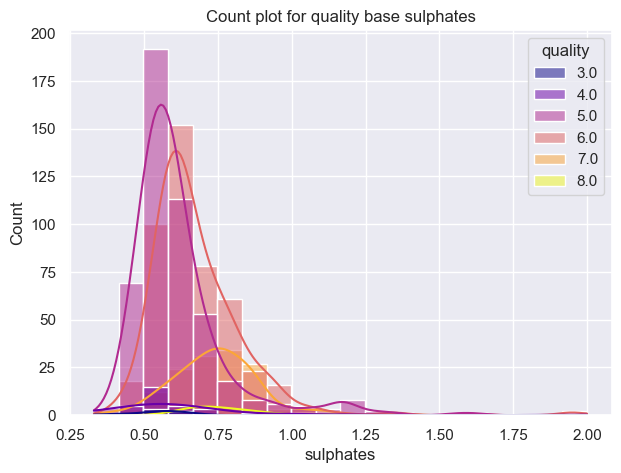

In [278]:
plt.figure(figsize = (7, 5))
sns.histplot(df1, x = "sulphates" , hue = "quality" , kde = True, bins = 20, palette = "plasma")
plt.title("Count plot for quality base sulphates")
plt.xlabel("sulphates")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='alcohol'>

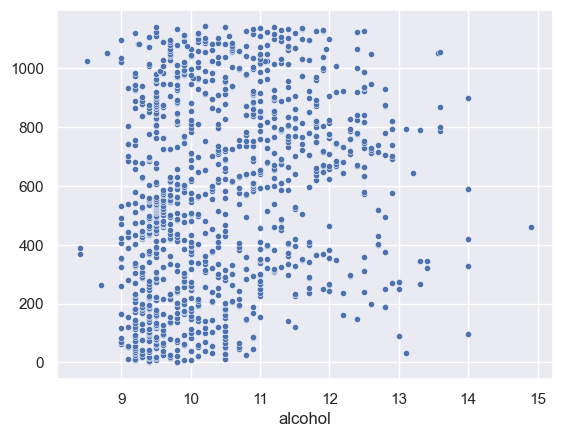

In [279]:
sns.scatterplot(df1, x="alcohol", y= df1.index, s=20)


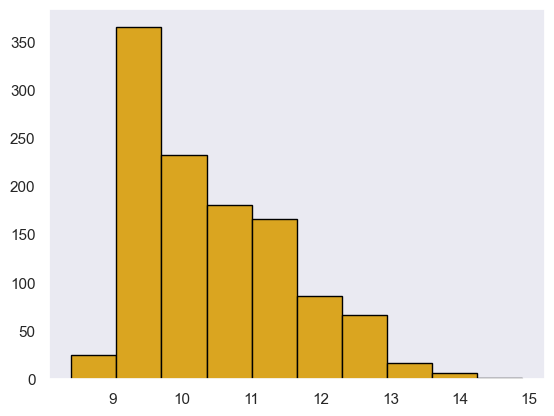

In [280]:
df1["alcohol"].hist(bins=10, color="goldenrod", edgecolor="black")
plt.grid(False)

<Axes: xlabel='alcohol', ylabel='Density'>

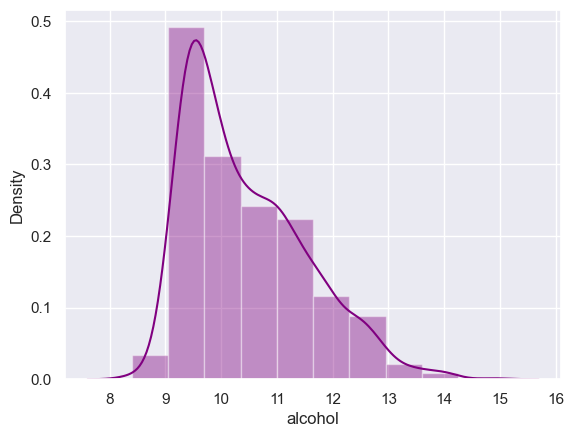

In [281]:
sns.distplot(df1["alcohol"], kde = True, color = 'purple', bins=10)

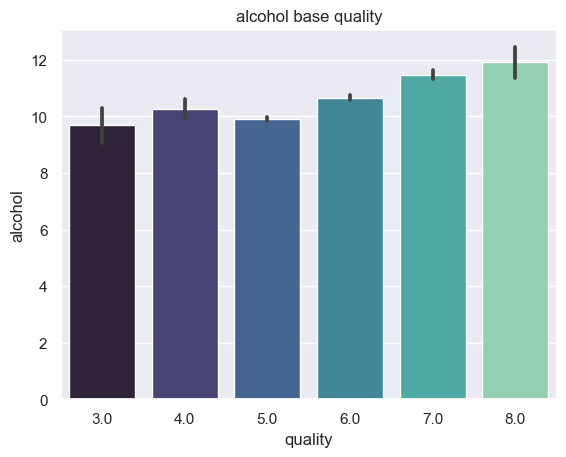

In [282]:
sns.barplot(df1, x = "quality", y = "alcohol", palette = "mako")
plt.title("alcohol base quality")
plt.xlabel("quality")
plt.ylabel("alcohol")
plt.show()

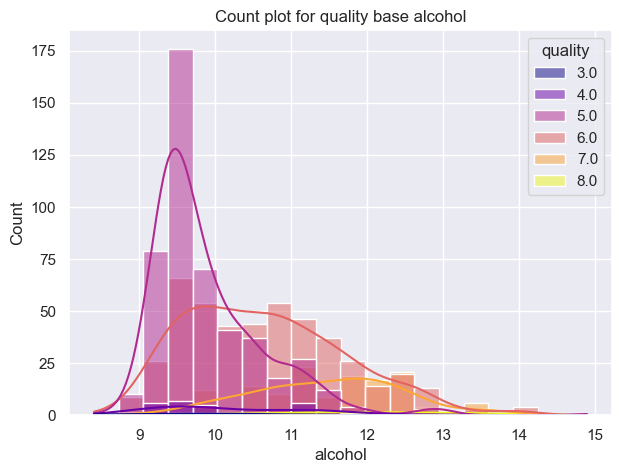

In [283]:
plt.figure(figsize = (7, 5))
sns.histplot(df1, x = "alcohol" , hue = "quality" , kde = True, bins = 20, palette = "plasma")
plt.title("Count plot for quality base alcohol")
plt.xlabel("alcohol")
plt.ylabel("Count")
plt.show()

<Axes: xlabel='quality'>

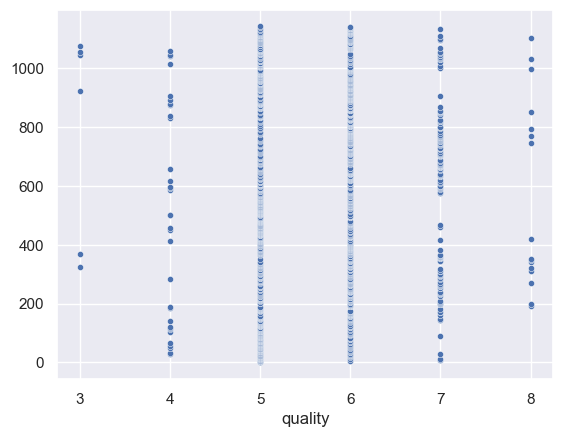

In [284]:
sns.scatterplot(df1, x="quality", y= df1.index, s=20)

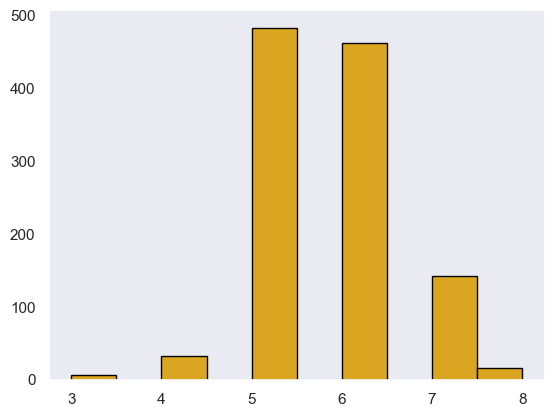

In [285]:
df1["quality"].hist(bins=10, color="goldenrod", edgecolor="black")
plt.grid(False)

<Axes: xlabel='quality', ylabel='Density'>

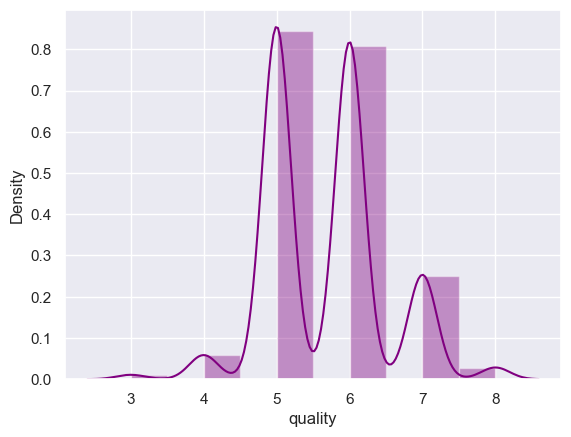

In [286]:
sns.distplot(df1["quality"], kde = True, color = 'purple', bins=10)

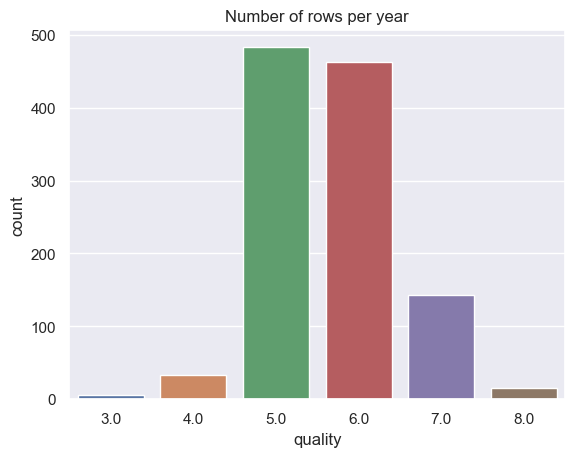

In [287]:

quality = df1["quality"]

plt.title('Number of rows per year')
sns.countplot(x = quality, data = df1)

plt.xlabel('quality')
plt.ylabel('count')
plt.show()

Text(0, 0.5, 'quality')

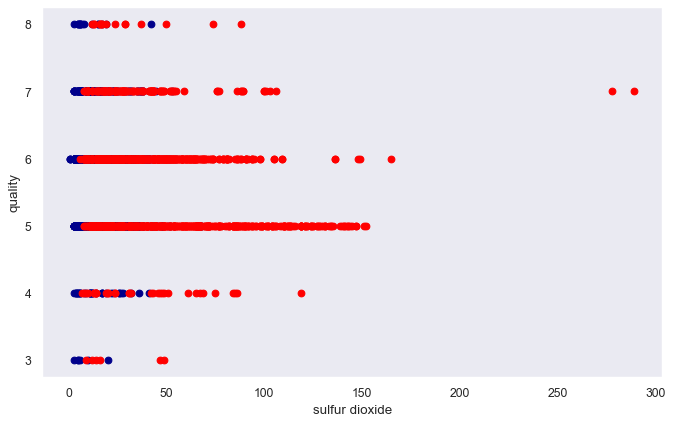

In [288]:
plt.figure(figsize = (10,6) , dpi = 80)
plt.scatter(df1 ['free sulfur dioxide'], df1['quality'], color = 'darkblue')
plt.scatter(df1['total sulfur dioxide'], df1['quality'] , color = 'red')
plt.grid()
plt.xlabel('sulfur dioxide')
plt.ylabel('quality')

Text(0, 0.5, 'alcohol')

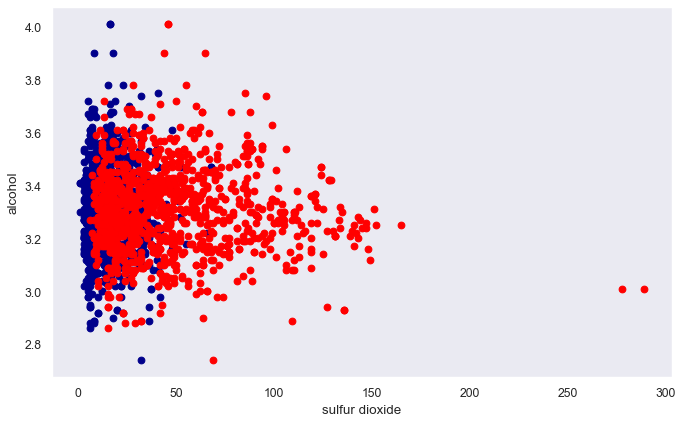

In [289]:
plt.figure(figsize = (10,6) , dpi = 80)
plt.scatter(df1 ['free sulfur dioxide'], df1['pH'], color = 'darkblue')
plt.scatter(df1['total sulfur dioxide'], df1['pH'] , color = 'red')
plt.grid()
plt.xlabel('sulfur dioxide')
plt.ylabel('alcohol')

<a id="5"></a>
# <p style="padding:10px;background-color:#f8d3d0 ;margin:0;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Feature Engineering & Modling </p>

In [290]:
df2 = df1.copy()
df3 = df2.drop(['Id'], axis=1)
df3

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                      11                    34  0.99780  3.51       0.56   
1                      25                    67  0.99680  3.20       0.68   
2                      15                    54  0.99700  3.26       0.65   
3                      17                    60  0.99800  3.16       0.58   
4                      11                    34  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                   29                    40  0.99574  3.42       0.75   
1139                   28                    38  0.99651  3.42       0.82   
1140                   32                    44  0.99490  3.45       0.58   
1141                   39                    51  0.99512  3.52       0.76   
1142                   32                    44  0.99547  3.57       0.71   

      alcohol  quality  sulfur_category  
0         9.4      5.0                2  
1         9.8      5.0                3  
2         9.8      5.0                2  
3         9.8      6.0                2  
4         9.4      5.0                2  
...       ...      ...              ...  
1138     11.0      6.0                3  
1139      9.5      6.0                3  
1140     10.5      5.0                4  
1141     11.2      6.0                4  
1142     10.2      5.0                4  

[1143 rows x 13 columns]

In [291]:
df3.describe(include = "all").T

count       mean        std      min       25%  \
fixed acidity         1143.0   8.311111   1.747595  4.60000   7.10000   
volatile acidity      1143.0   0.531339   0.179633  0.12000   0.39250   
citric acid           1143.0   0.268364   0.196686  0.00000   0.09000   
residual sugar        1143.0   2.532152   1.355917  0.90000   1.90000   
chlorides             1143.0   0.086933   0.047267  0.01200   0.07000   
free sulfur dioxide   1143.0  15.614173  10.247585  1.00000   7.00000   
total sulfur dioxide  1143.0  45.914261  32.781712  6.00000  21.00000   
density               1143.0   0.996730   0.001925  0.99007   0.99557   
pH                    1143.0   3.311015   0.156664  2.74000   3.20500   
sulphates             1143.0   0.657708   0.170399  0.33000   0.55000   
alcohol               1143.0  10.442111   1.082196  8.40000   9.50000   
quality               1143.0   5.657043   0.805824  3.00000   5.00000   
sulfur_category       1143.0   2.011374   1.070563  1.00000   1.00000   

                           50%        75%        max  
fixed acidity          7.90000   9.100000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.25000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   13.00000  21.000000   68.00000  
total sulfur dioxide  37.00000  61.000000  289.00000  
density                0.99668   0.997845    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000  
sulfur_category        2.00000   3.000000    7.00000

### We are scaling the columns to the power of 2 to improve the accuracy of the models and the prediction.

In [292]:
columns_to_square = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
                     "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
                     "pH", "sulphates", "alcohol", "quality"]

for col in columns_to_square:
    df3[col + "_2"] = df3[col] ** 2

df3


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                      11                    34  0.99780  3.51       0.56   
1                      25                    67  0.99680  3.20       0.68   
2                      15                    54  0.99700  3.26       0.65   
3                      17                    60  0.99800  3.16       0.58   
4                      11                    34  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                   29                    40  0.99574  3.42       0.75   
1139                   28                    38  0.99651  3.42       0.82   
1140                   32                    44  0.99490  3.45       0.58   
1141                   39                    51  0.99512  3.52       0.76   
1142                   32                    44  0.99547  3.57       0.71   

      ...  citric acid_2  residual sugar_2  chlorides_2  \
0     ...         0.0000              3.61     0.005776   
1     ...         0.0000              6.76     0.009604   
2     ...         0.0016              5.29     0.008464   
3     ...         0.3136              3.61     0.005625   
4     ...         0.0000              3.61     0.005776   
...   ...            ...               ...          ...   
1138  ...         0.0169              5.29     0.005776   
1139  ...         0.0064              3.61     0.004624   
1140  ...         0.0064              4.00     0.008100   
1141  ...         0.0100              4.84     0.003844   
1142  ...         0.0144              4.00     0.005625   

      free sulfur dioxide_2  total sulfur dioxide_2  density_2     pH_2  \
0                       121                    1156   0.995605  12.3201   
1                       625                    4489   0.993610  10.2400   
2                       225                    2916   0.994009  10.6276   
3                       289                    3600   0.996004   9.9856   
4                       121                    1156   0.995605  12.3201   
...                     ...                     ...        ...      ...   
1138                    841                    1600   0.991498  11.6964   
1139                    784                    1444   0.993032  11.6964   
1140                   1024                    1936   0.989826  11.9025   
1141                   1521                    2601   0.990264  12.3904   
1142                   1024                    1936   0.990961  12.7449   

      sulphates_2  alcohol_2  quality_2  
0          0.3136      88.36       25.0  
1          0.4624      96.04       25.0  
2          0.4225      96.04       25.0  
3          0.3364      96.04       36.0  
4          0.3136      88.36       25.0  
...           ...        ...        ...  
1138       0.5625     121.00       36.0  
1139       0.6724      90.25       36.0  
1140       0.3364     110.25       25.0  
1141       0.5776     125.44       36.0  
1142       0.5041     104.04       2

### We want to get "quality" as Target, so we need to get rid of those data, that can effect on our prediction. In our Dataset seems when quality is greater than 5, it is good value for a wine and if it is less than 5 it is bad value for that

### Now we want label the quality of wine with 0 and 1. If it is more than 5 we give it 1 & if it is less than 5 we give it 0

In [293]:
def new_quality (wine) :
    if wine["quality"] > 5:
        return 1
    else:
        return 0
df3["quality"] = df3.apply(new_quality, axis = 1)

In [294]:
df3.head(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            6.7              0.58         0.08             1.8      0.097   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  ...  \
0                   11                    34   0.9978  3.51       0.56  ...   
1                   25                    67   0.9968  3.20       0.68  ...   
2                   15                    54   0.9970  3.26       0.65  ...   
3                   17                    60   0.9980  3.16       0.58  ...   
4                   11                    34   0.9978  3.51       0.56  ...   
5                   13                    40   0.9978  3.51       0.56  ...   
6                   15                    59   0.9964  3.30       0.46  ...   
7                   15                    21   0.9946  3.39       0.47  ...   
8                    9                    18   0.9968  3.36       0.57  ...   
9                   15                    65   0.9959  3.28       0.54  ...   

   citric acid_2  residual sugar_2  chlorides_2  free sulfur dioxide_2  \
0         0.0000              3.61     0.005776                    121   
1         0.0000              6.76     0.009604                    625   
2         0.0016              5.29     0.008464                    225   
3         0.3136              3.61     0.005625                    289   
4         0.0000              3.61     0.005776                    121   
5         0.0000              3.24     0.005625                    169   
6         0.0036              2.56     0.004761                    225   
7         0.0000              1.44     0.004225                    225   
8         0.0004              4.00     0.005329                     81   
9         0.0064              3.24     0.009409                    225   

   total sulfur dioxide_2  density_2     pH_2  sulphates_2  alcohol_2  \
0                    1156   0.995605  12.3201       0.3136      88.36   
1                    4489   0.993610  10.2400       0.4624      96.04   
2                    2916   0.994009  10.6276       0.4225      96.04   
3                    3600   0.996004   9.9856       0.3364      96.04   
4                    1156   0.995605  12.3201       0.3136      88.36   
5                    1600   0.995605  12.3201       0.3136      88.36   
6                    3481   0.992813  10.8900       0.2116      88.36   
7                     441   0.989229  11.4921       0.2209     100.00   
8                     324   0.993610  11.2896       0.3249      90.25   
9                    4225   0.991817  10.7584       0.2916      84.64   

   quality_2  
0       25.0  
1       25.0  
2       25.0  
3       36.0  
4       25.0  
5       25.0  
6       25.0  
7       49.0  
8       49.0  
9       25.0  

[10 rows x 25 columns]

In [295]:
df3.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'sulfur_category',
       'fixed acidity_2', 'volatile acidity_2', 'citric acid_2',
       'residual sugar_2', 'chlorides_2', 'free sulfur dioxide_2',
       'total sulfur dioxide_2', 'density_2', 'pH_2', 'sulphates_2',
       'alcohol_2', 'quality_2'],
      dtype='object')

### Now we want to count our quality column with two number 0 & 1

In [296]:
df3["quality"].value_counts()

quality
1    621
0    522
Name: count, dtype: int64

In [297]:
x = pd.DataFrame(df3 , columns = [ 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'sulfur_category',
       'fixed acidity_2', 'volatile acidity_2', 'citric acid_2',
       'residual sugar_2', 'chlorides_2', 'free sulfur dioxide_2',
       'total sulfur dioxide_2', 'density_2', 'pH_2', 'sulphates_2',
       'alcohol_2', 'quality_2'])
x = df3.drop(columns=["quality", "quality_2"])
y = df3["quality"].values.reshape(-1, 1)
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                      11                    34  0.99780  3.51       0.56   
1                      25                    67  0.99680  3.20       0.68   
2                      15                    54  0.99700  3.26       0.65   
3                      17                    60  0.99800  3.16       0.58   
4                      11                    34  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                   29                    40  0.99574  3.42       0.75   
1139                   28                    38  0.99651  3.42       0.82   
1140                   32                    44  0.99490  3.45       0.58   
1141                   39                    51  0.99512  3.52       0.76   
1142                   32                    44  0.99547  3.57       0.71   

      ...  volatile acidity_2  citric acid_2  residual sugar_2  chlorides_2  \
0     ...            0.490000         0.0000              3.61     0.005776   
1     ...            0.774400         0.0000              6.76     0.009604   
2     ...            0.577600         0.0016              5.29     0.008464   
3     ...            0.078400         0.3136              3.61     0.005625   
4     ...            0.490000         0.0000              3.61     0.005776   
...   ...                 ...            ...               ...          ...   
1138  ...            0.260100         0.0169              5.29     0.005776   
1139  ...            0.384400         0.0064              3.61     0.004624   
1140  ...            0.360000         0.0064              4.00     0.008100   
1141  ...            0.302500         0.0100              4.84     0.003844   
1142  ...            0.416025         0.0144              4.00     0.005625   

      free sulfur dioxide_2  total sulfur dioxide_2  density_2     pH_2  \
0                       121                    1156   0.995605  12.3201   
1                       625                    4489   0.993610  10.2400   
2                       225                    2916   0.994009  10.6276   
3                       289                    3600   0.996004   9.9856   
4                       121                    1156   0.995605  12.3201   
...                     ...                     ...        ...      ...   
1138                    841                    1600   0.991498  11.6964   
1139                    784                    1444   0.993032  11.6964   
1140                   1024                    1936   0.989826  11.9025   
1141                   1521                    2601   0.990264  12.3904   
1142                   1024                    1936   0.990961  12.7449   

      sulphates_2  alcohol_2  
0          0.3136      88.36  
1          0.4624      96.04  
2          0.4225      96.04  
3          0.3364      96.04  
4          0.3136      88.36  
...           ...        ...  
1138       0.5625     121.00  
1139      

In [298]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(914, 23) (229, 23) (914, 1) (229, 1)


## <font color='blue'  style='font-weight: bold'> Cross Validation</font> 

In [299]:

k = 10
clf = KNeighborsClassifier(k)
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6724890829694323


In [300]:

K = 10
Acc = np.zeros((K))

for i in range(1, K + 1):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train, y_train.ravel())
    y_pred = clf.predict(x_test)
    Acc[i - 1] = metrics.accuracy_score(y_test, y_pred)
Acc

array([0.70742358, 0.61135371, 0.66375546, 0.63755459, 0.67248908,
       0.67248908, 0.69868996, 0.66812227, 0.69868996, 0.67248908])

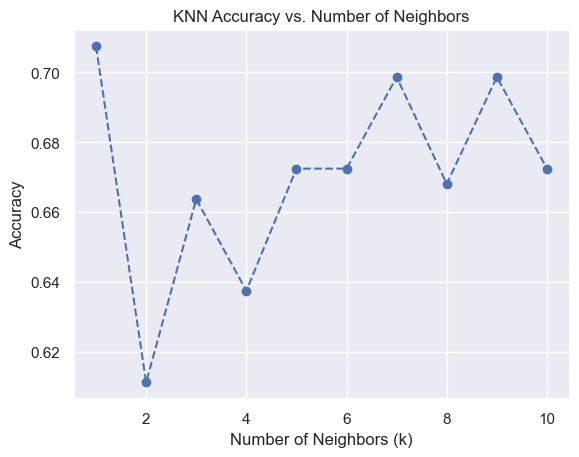

In [301]:
plt.plot(range(1, K + 1), Acc, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.grid(True)
plt.show()

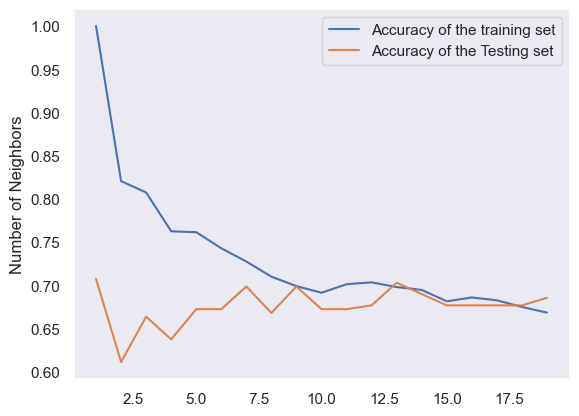

In [302]:
training_acc  = []
test_acc = []

neighbors_setting = range(1, 20)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(x_train, y_train.ravel())
    training_acc.append(knn.score(x_train, y_train))
    test_acc.append(knn.score(x_test, y_test))
    
    
plt.plot(neighbors_setting, training_acc, label = "Accuracy of the training set")
plt.plot(neighbors_setting, test_acc, label = "Accuracy of the Testing set")
plt.ylabel("Accuracy")
plt.ylabel("Number of Neighbors")
plt.grid()
plt.legend()

In [303]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# ساخت pipeline برای نرمال‌سازی و مدل KNN
model = make_pipeline(StandardScaler(), KNeighborsClassifier())

# اجرای 5-Fold Cross-validation
scores = cross_val_score(model, x, y, cv=10)

# نمایش نتایج
print("KNN Accuracy for each fold: ", scores)
print("KNN mean accuracy: ", scores.mean())
print("KNN max accuracy: ", scores.max())


KNN Accuracy for each fold:  [0.67826087 0.7826087  0.72173913 0.63157895 0.64912281 0.73684211
 0.6754386  0.75438596 0.64912281 0.64035088]
KNN mean accuracy:  0.6919450800915332
KNN max accuracy:  0.782608695652174


In [304]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# تعریف پارامترها برای جستجوی بهینه
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

# ساخت pipeline
model = make_pipeline(StandardScaler(), SVC())

# اجرای GridSearchCV برای پیدا کردن بهترین پارامترها
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(x, y)

# نمایش بهترین پارامترها و دقت‌ها
print("Best parameters: ", grid.best_params_)
print("Best cross-validation accuracy: ", grid.best_score_)
print("SVC mean accuracy: ", scores.mean())
print("SVC max accuracy: ", scores.max())

Best parameters:  {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best cross-validation accuracy:  0.7471347582931127
SVC mean accuracy:  0.6919450800915332
SVC max accuracy:  0.782608695652174


## <font color='purple'  style='font-weight: bold'> Correlation</font> 

Correlation with target (quality):
fixed acidity             0.088682
volatile acidity         -0.330787
citric acid               0.155144
residual sugar           -0.007732
chlorides                -0.100601
free sulfur dioxide      -0.070714
total sulfur dioxide     -0.226668
density                  -0.154255
pH                        0.015251
sulphates                 0.234221
alcohol                   0.440397
quality                   1.000000
sulfur_category          -0.070681
fixed acidity_2           0.094887
volatile acidity_2       -0.304309
citric acid_2             0.157058
residual sugar_2         -0.013444
chlorides_2              -0.071796
free sulfur dioxide_2    -0.074952
total sulfur dioxide_2   -0.181222
density_2                -0.154029
pH_2                      0.015525
sulphates_2               0.164234
alcohol_2                 0.432321
quality_2                 0.824116
Name: quality, dtype: float64


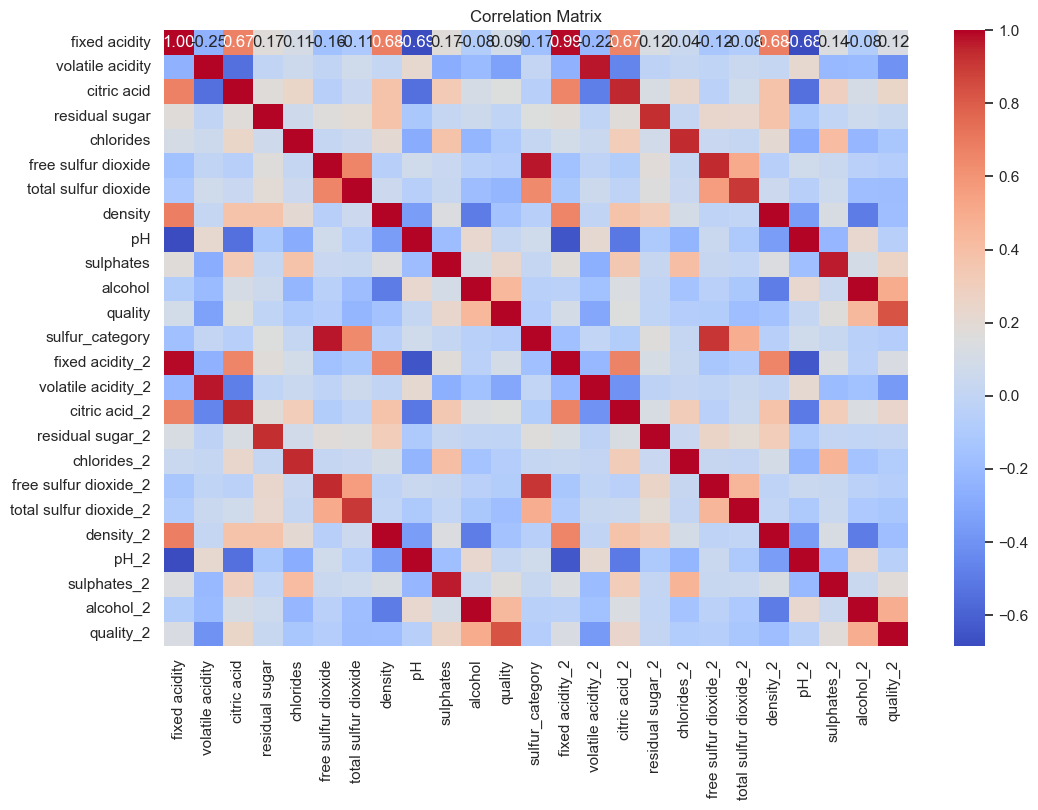

In [305]:

# محاسبه ماتریس همبستگی
correlation_matrix = df3.corr()

# نمایش همبستگی بین ویژگی‌ها و هدف (quality)
print("Correlation with target (quality):")
print(correlation_matrix['quality'])


# رسم heatmap برای ماتریس همبستگی
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


<div style="background-color: #f8d3d0; padding: 10px;">

## Positive Correlations:
### Alcohol (0.440397):

#### There is a positive correlation between the alcohol content and the wine quality. This means that as the alcohol level increases, the quality of the wine tends to increase as well. This is a moderate positive correlation, indicating a fairly significant relationship.

### Sulphates (0.234221):

#### Sulphates show a moderate positive correlation with wine quality. Higher levels of sulphates are associated with better wine quality. The relationship is not as strong as alcohol, but it is still noticeable, suggesting that sulphates have a beneficial impact on wine quality.

### Citric Acid (0.155144):

#### Citric acid has a small positive correlation with quality. This suggests that wines with higher levels of citric acid tend to have slightly better quality. However, the relationship is weak, meaning citric acid alone is not a strong indicator of quality.

### Quality_2 (0.824116):

#### This is the squared version of the quality feature, and it has a very high positive correlation with quality. This makes sense because squared features often capture nonlinear relationships and can indicate more complex patterns in the data. This strong correlation indicates that higher squared values of quality are strongly tied to better predicted outcomes.

## Negative Correlations:
### Volatile Acidity (-0.330787):

#### There is a moderate negative correlation between volatile acidity and wine quality. As the volatile acidity increases, the quality of the wine tends to decrease. This suggests that higher volatile acidity is undesirable and negatively impacts the overall quality of the wine.

### Total Sulfur Dioxide (-0.226668):

#### Total sulfur dioxide shows a moderate negative correlation with wine quality. Wines with higher levels of total sulfur dioxide tend to have lower quality. Sulfur dioxide is often used as a preservative in wine, but excessive amounts can negatively affect its taste and quality.

### Chlorides (-0.100601):

#### Chlorides have a weak negative correlation with wine quality. This indicates that higher levels of chlorides might slightly decrease the quality of the wine, though the relationship is not as strong as that of volatile acidity or sulfur dioxide.

### Density (-0.154255):

#### Density also shows a small negative correlation with wine quality. This suggests that denser wines might be slightly associated with lower quality, but the relationship is not very strong.

### Free Sulfur Dioxide (-0.070714):

#### Free sulfur dioxide shows a very weak negative correlation with quality, suggesting that it has a very minor effect on quality. The relationship is so weak that it's nearly negligible.

### Residual Sugar (-0.007732):

#### Residual sugar has an almost zero correlation with quality. This means there is virtually no relationship between the amount of residual sugar in the wine and its quality.

 </div>

In [306]:
df3

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1138            6.3             0.510         0.13             2.3      0.076   
1139            6.8             0.620         0.08             1.9      0.068   
1140            6.2             0.600         0.08             2.0      0.090   
1141            5.9             0.550         0.10             2.2      0.062   
1142            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                      11                    34  0.99780  3.51       0.56   
1                      25                    67  0.99680  3.20       0.68   
2                      15                    54  0.99700  3.26       0.65   
3                      17                    60  0.99800  3.16       0.58   
4                      11                    34  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1138                   29                    40  0.99574  3.42       0.75   
1139                   28                    38  0.99651  3.42       0.82   
1140                   32                    44  0.99490  3.45       0.58   
1141                   39                    51  0.99512  3.52       0.76   
1142                   32                    44  0.99547  3.57       0.71   

      ...  citric acid_2  residual sugar_2  chlorides_2  \
0     ...         0.0000              3.61     0.005776   
1     ...         0.0000              6.76     0.009604   
2     ...         0.0016              5.29     0.008464   
3     ...         0.3136              3.61     0.005625   
4     ...         0.0000              3.61     0.005776   
...   ...            ...               ...          ...   
1138  ...         0.0169              5.29     0.005776   
1139  ...         0.0064              3.61     0.004624   
1140  ...         0.0064              4.00     0.008100   
1141  ...         0.0100              4.84     0.003844   
1142  ...         0.0144              4.00     0.005625   

      free sulfur dioxide_2  total sulfur dioxide_2  density_2     pH_2  \
0                       121                    1156   0.995605  12.3201   
1                       625                    4489   0.993610  10.2400   
2                       225                    2916   0.994009  10.6276   
3                       289                    3600   0.996004   9.9856   
4                       121                    1156   0.995605  12.3201   
...                     ...                     ...        ...      ...   
1138                    841                    1600   0.991498  11.6964   
1139                    784                    1444   0.993032  11.6964   
1140                   1024                    1936   0.989826  11.9025   
1141                   1521                    2601   0.990264  12.3904   
1142                   1024                    1936   0.990961  12.7449   

      sulphates_2  alcohol_2  quality_2  
0          0.3136      88.36       25.0  
1          0.4624      96.04       25.0  
2          0.4225      96.04       25.0  
3          0.3364      96.04       36.0  
4          0.3136      88.36       25.0  
...           ...        ...        ...  
1138       0.5625     121.00       36.0  
1139       0.6724      90.25       36.0  
1140       0.3364     110.25       25.0  
1141       0.5776     125.44       36.0  
1142       0.5041     104.04       2

In [307]:
comp1 = np.corrcoef(df3['fixed acidity'], df3['quality'])
comp1


array([[1.        , 0.08868227],
       [0.08868227, 1.        ]])

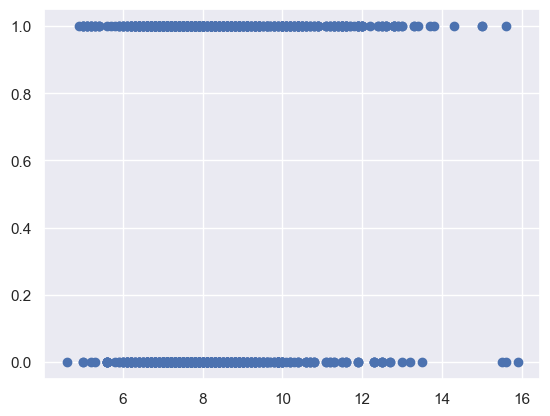

In [308]:
plt.scatter(df3['fixed acidity'], df3['quality'])

In [309]:
comp1 = np.corrcoef(df3['alcohol'], df3['quality'])
comp1

array([[1.        , 0.44039706],
       [0.44039706, 1.        ]])

##   <font color='orange'  style='font-weight: bold'> Normalizing</font> 

In [310]:
print("x_train : ", x_train.shape)
print("y_train : ", y_train.shape)
print("x_test : ", x_test.shape)
print("y_test : ", y_test.shape)

x_train :  (914, 23)
y_train :  (914, 1)
x_test :  (229, 23)
y_test :  (229, 1)


In [311]:
Scaler = StandardScaler()
x_train_Scaler = Scaler.fit_transform(x_train)
x_test_Scaler = Scaler.fit_transform(x_test)


In [312]:
x_train_Scaler

array([[ 0.1426802 , -1.40273053,  1.5096933 , ..., -0.11532183,
         0.35882033,  0.00510986],
       [ 0.96843134, -1.17920341,  1.5096933 , ..., -1.06488937,
         0.25771985,  0.84790669],
       [ 0.3786091 , -1.23508519,  0.4833938 , ...,  0.54225982,
         0.06371621,  1.24471818],
       ...,
       [-0.50612428, -1.01155806,  0.32944888, ...,  0.27687164,
        -0.33282996,  1.34605905],
       [-0.21121315,  0.21784112,  0.22681893, ..., -0.18000039,
         0.06371621, -0.85008733],
       [-0.44714205, -0.06156778,  0.6886537 , ..., -0.37285829,
        -0.16341833,  1.24471818]])

In [313]:
x_test_Scaler

array([[-0.89539117,  0.42529243, -1.17528947, ...,  0.69769469,
        -0.3295008 , -0.82265514],
       [-0.84341536,  1.68940939, -0.33791723, ...,  1.37328411,
         0.11231836, -1.02543512],
       [-0.79143954,  0.26040761, -0.78123195, ...,  0.81893847,
        -0.69098919, -0.01081357],
       ...,
       [-0.89539117,  1.33215895, -1.37231823, ...,  0.87982547,
        -0.45892257,  0.16129684],
       [ 0.76783481, -0.23424685, -0.38717442, ..., -0.81414101,
        -0.00566744, -1.0503767 ],
       [ 1.5994478 , -0.31668926,  0.59796939, ..., -1.30963217,
        -0.1551719 , -0.39977589]])

##  <font color='orange'  style='font-weight: bold'> PCA(Principle Component Analysis)</font> 

### PCA ia a type of lienear dimension reduction and Projection of high-dimensional data onto 2D or 3D  and also We can reduce our non-dependent parameters in our dataset with PCA

### First of all we normalaized and standardized our data because We want to use (x_train_Scaler) instead of (x_train) and use (x_test_Scaler) instead of (x_test) because those are our normalized values

In [314]:
pca = PCA(10)
train_scaler_pca = pca.fit_transform(x_train_Scaler)
test_scaler_pca = pca.fit_transform(x_test_Scaler)
explained_variance = pca.explained_variance_ratio_

In [315]:
print("Explained variance Ratios" , explained_variance)

Explained variance Ratios [0.27846749 0.18045821 0.12325707 0.10822208 0.07834846 0.06282265
 0.05203684 0.0446374  0.03388298 0.01562277]


### Plot the Explained Variance

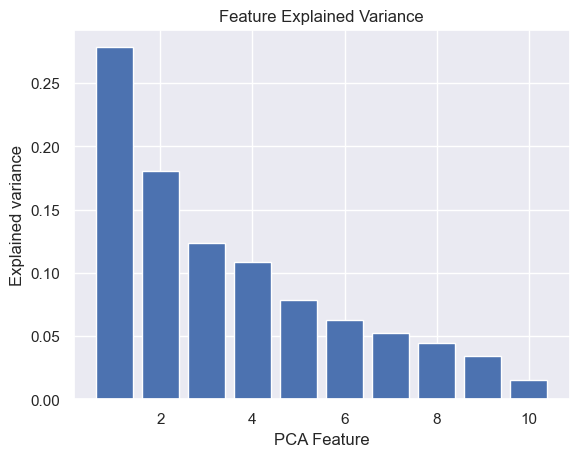

In [316]:
sns.set()

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

### Make a Scree Plot and PCA

<function matplotlib.pyplot.show(close=None, block=None)>

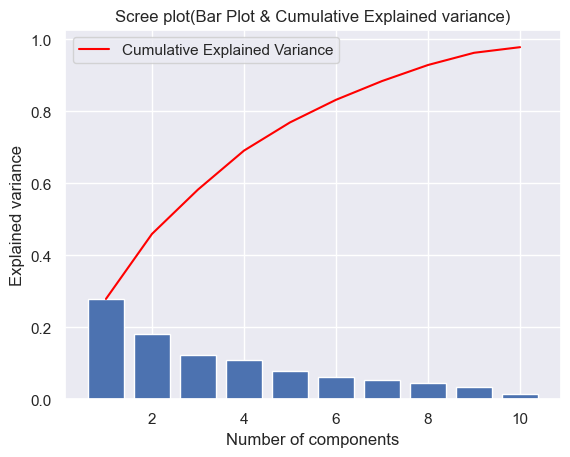

In [317]:
plt.bar(
    range(1,len(pca.explained_variance_ratio_)+1),
    pca.explained_variance_ratio_
    )

plt.plot(
    range(1,len(pca.explained_variance_ratio_)+1),
    np.cumsum(pca.explained_variance_ratio_),
    c='red',
    label='Cumulative Explained Variance')

plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Scree plot(Bar Plot & Cumulative Explained variance)')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

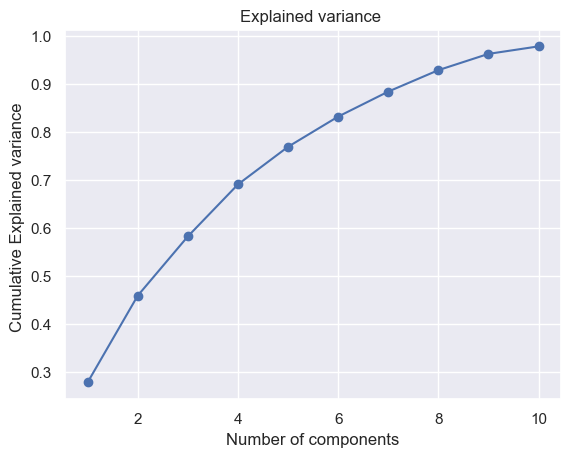

In [318]:
Cumulative_Explained_Variance = np.cumsum(explained_variance)

plt.plot(range(1, len(explained_variance) + 1), Cumulative_Explained_Variance, marker = "o" , linestyle = "-")

plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance ')
plt.title("Explained variance ")

plt.show

### as we see with this counting is easier to classify our "quality" column

In [319]:
x_train

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
12              8.5              0.28         0.56             1.8      0.092   
758             9.9              0.32         0.56             2.0      0.073   
636             8.9              0.31         0.36             2.6      0.056   
1109            6.6              0.88         0.04             2.2      0.066   
743             7.6              0.42         0.25             3.9      0.104   
...             ...               ...          ...             ...        ...   
1044            6.7              1.04         0.08             2.3      0.067   
1095            8.0              0.39         0.30             1.9      0.074   
1130            7.4              0.35         0.33             2.4      0.068   
860             7.9              0.57         0.31             2.0      0.079   
1126            7.5              0.52         0.40             2.2      0.060   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
12                     35                   103  0.99690  3.30       0.75   
758                     3                     8  0.99534  3.15       0.73   
636                    10                    39  0.99562  3.40       0.69   
1109                   12                    20  0.99636  3.53       0.56   
743                    28                    90  0.99784  3.15       0.57   
...                   ...                   ...      ...   ...        ...   
1044                   19                    32  0.99648  3.52       0.57   
1095                   32                    84  0.99717  3.39       0.61   
1130                    9                    26  0.99470  3.36       0.60   
860                    10                    79  0.99677  3.29       0.69   
1126                   12                    20  0.99474  3.26       0.64   

      ...  volatile acidity_2  citric acid_2  residual sugar_2  chlorides_2  \
12    ...              0.0784         0.3136              3.24     0.008464   
758   ...              0.1024         0.3136              4.00     0.005329   
636   ...              0.0961         0.1296              6.76     0.003136   
1109  ...              0.7744         0.0016              4.84     0.004356   
743   ...              0.1764         0.0625             15.21     0.010816   
...   ...                 ...            ...               ...          ...   
1044  ...              1.0816         0.0064              5.29     0.004489   
1095  ...              0.1521         0.0900              3.61     0.005476   
1130  ...              0.1225         0.1089              5.76     0.004624   
860   ...              0.3249         0.0961              4.00     0.006241   
1126  ...              0.2704         0.1600              4.84     0.003600   

      free sulfur dioxide_2  total sulfur dioxide_2  density_2     pH_2  \
12                     1225                   10609   0.993810  10.8900   
758                       9                      64   0.990702   9.9225   
636                     100                    1521   0.991259  11.5600   
1109                    144                     400   0.992733  12.4609   
743                     784                    8100   0.995685   9.9225   
...                     ...                     ...        ...      ...   
1044                    361                    1024   0.992972  12.3904   
1095                   1024                    7056   0.994348  11.4921   
1130                     81                     676   0.989428  11.2896   
860                     100                    6241   0.993550  10.8241   
1126                    144                     400   0.989508  10.6276   

      sulphates_2  alcohol_2  
12         0.5625     110.25  
758        0.5329     129.96  
636        0.4761     139.24  
1109       0.3136      98.01  
743        0.3249      82.81  
...           ...        ...  
1044       0.3249     121.00  
1095      

<a id="6"></a>
# <p style="padding:10px;background-color:#f8d3d0 ;margin:0;color:#000000;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Create Models </p>

# <font color='green'  style='font-weight: bold'>1- Logistic Regression Model</font> 

### Now we want to split our data into Train and Test

In [320]:
accuracy_results = {}

In [321]:
model_logreg = LogisticRegression(solver = "liblinear" , C = 10, random_state = 0).fit(train_scaler_pca, y_train)

In [322]:
y_pred = model_logreg.predict(test_scaler_pca)
y_pred

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [323]:
accuracy_score(y_test , y_pred)

0.6986899563318777

### We can draw this plot for showing Logistic regression process

### This underline after fpr, tpr is basically to prevent repeating the loop if we want to add some more values later.

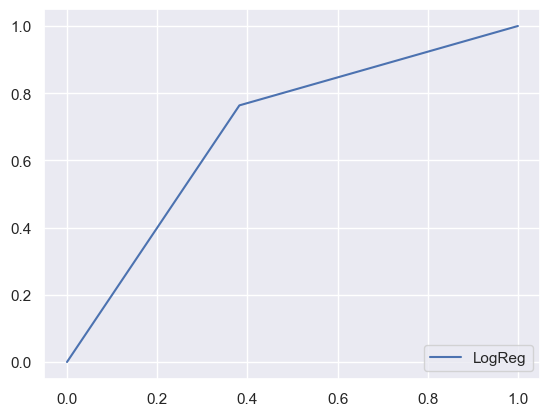

In [324]:
fpr , tpr, _ = metrics.roc_curve(y_test , y_pred)
plt.plot(fpr , tpr , label = "LogReg")
plt.legend(loc = 4)
plt.show()

### The maximum of the graph above is 1 and the minimum is 0, so it should either be 1 or 0.

### So that this slope does not bother us, we do it with logistic regression, so we write the code below

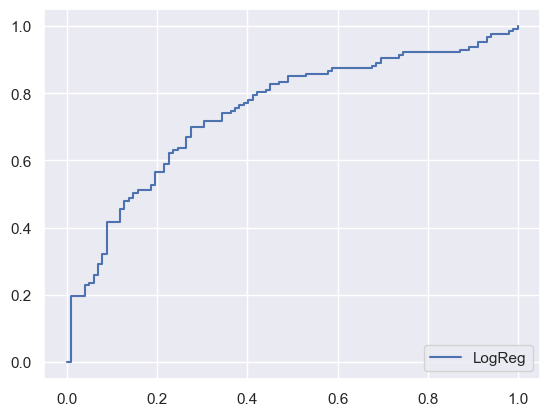

In [325]:
y_pred_proba = model_logreg.predict_proba(test_scaler_pca)[:: , 1]
fpr , tpr, _ = metrics.roc_curve(y_test , y_pred_proba)
plt.plot(fpr , tpr , label = "LogReg")
plt.legend(loc = 4)
plt.show()

### Now we can put "y_test" & "y_pred" in first and second columns of our dataframe to see how our predict data is close to real data

In [326]:
# بررسی اینکه ستون‌ها از قبل در x_test وجود ندارند
if "y_test" not in x_test.columns:
    x_test.insert(3, "y_test", y_test)

if "y_pred" not in x_test.columns:
    x_test.insert(4, "y_pred", y_pred)

# تعریف ترتیب جدید ستون‌ها بدون افزودن مجدد y_test و y_pred
new_columns = ["y_test", "y_pred"] + [col for col in x_test.columns if col not in ["y_test", "y_pred"]]

# مرتب‌سازی ستون‌ها بر اساس ترتیب جدید
x_test1 = x_test[new_columns]


In [327]:
x_test1

y_test  y_pred  fixed acidity  volatile acidity  citric acid  \
158        0       1            6.8             0.610         0.04   
1081       1       0            6.9             0.840         0.21   
291        0       0            7.0             0.580         0.12   
538        1       0            7.8             0.480         0.68   
367        1       1           12.5             0.600         0.49   
...      ...     ...            ...               ...          ...   
66         0       0            5.0             1.020         0.04   
328        1       1           10.3             0.500         0.42   
67         0       1            6.8             0.775         0.00   
231        1       1           10.0             0.490         0.20   
966        1       1           11.6             0.475         0.40   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
158              1.5      0.057                    5                    10   
1081             4.1      0.074                   16                    65   
291              1.9      0.091                   34                   124   
538              1.7      0.415                   14                    32   
367              4.3      0.100                    5                    14   
...              ...        ...                  ...                   ...   
66               1.4      0.045                   41                    85   
328              2.0      0.069                   21                    51   
67               3.0      0.102                    8                    23   
231             11.0      0.071                   13                    50   
966              1.4      0.091                    6                    28   

      density  ...  volatile acidity_2  citric acid_2  residual sugar_2  \
158   0.99525  ...            0.372100         0.0016              2.25   
1081  0.99842  ...            0.705600         0.0441             16.81   
291   0.99560  ...            0.336400         0.0144              3.61   
538   0.99656  ...            0.230400         0.4624              2.89   
367   1.00100  ...            0.360000         0.2401             18.49   
...       ...  ...                 ...            ...               ...   
66    0.99380  ...            1.040400         0.0016              1.96   
328   0.99820  ...            0.250000         0.1764              4.00   
67    0.99650  ...            0.600625         0.0000              9.00   
231   1.00150  ...            0.240100         0.0400            121.00   
966   0.99704  ...            0.225625         0.1600              1.96   

      chlorides_2  free sulfur dioxide_2  total sulfur dioxide_2  density_2  \
158      0.003249                     25                     100   0.990523   
1081     0.005476                    256                    4225   0.996842   
291      0.008281                   1156                   15376   0.991219   
538      0.172225                    196                    1024   0.993132   
367      0.010000                     25                     196   1.002001   
...           ...                    ...                     ...        ...   
66       0.002025                   1681                    7225   0.987638   
328      0.004761                    441                    2601   0.996403   
67       0.010404                     64                     529   0.993012   
231      0.005041                    169                    2500   1.003002   
966      0.008281                     36                     784   0.994089   

         pH_2  sulphates_2   alcohol_2  
158   11.6964       0.3600   90.250000  
1081  12.4609       0.5184   85.254444  
291   11.8336       0.2304  110.250000  
538    9.5481       1.1236   82.810000  
367   10.5625       0.5476  141.610000  
...       ...          ...         ...  
66    14.0625       0.2304  110.250000  
328    9.9856       0.5184  132.250000  
67    11.

### Confusion Matrix

In [328]:
model_LR = LogisticRegression(solver='liblinear').fit(train_scaler_pca, y_train)
y_pred2 = model_LR.predict(test_scaler_pca)

In [329]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.6986899563318777


In [330]:
confusion_matrix(y_pred , y_test)

array([[63, 30],
       [39, 97]], dtype=int64)

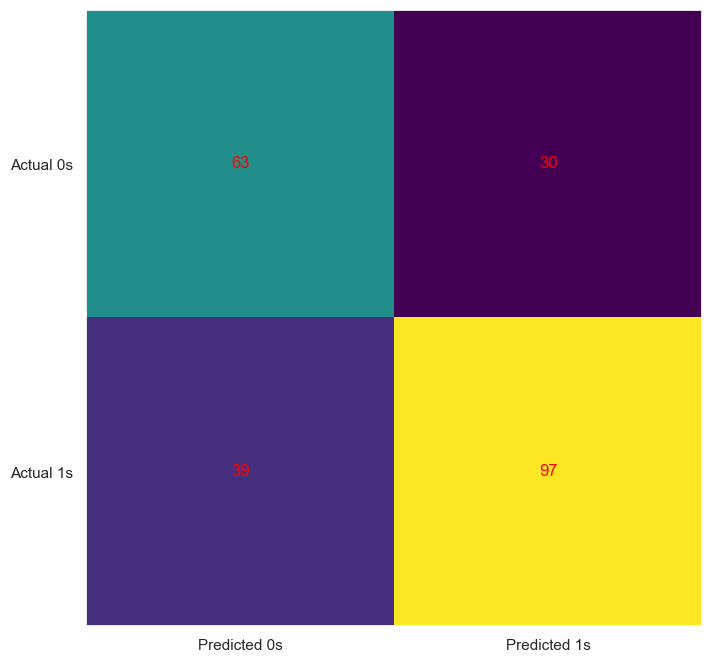

In [331]:
cm =  confusion_matrix(y_pred , y_test)

fig, ax = plt.subplots(figsize = (8 , 8))
ax.imshow(cm, cmap=plt.cm.viridis)
ax.grid(False)
ax.xaxis.set(ticks = (0 , 1), ticklabels = ("Predicted 0s" , "Predicted 1s"))
ax.yaxis.set(ticks = (0 , 1), ticklabels = ("Actual 0s" , "Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = "center", va= "center", color = "red")


In [332]:
print(classification_report(y_pred , y_test))

              precision    recall  f1-score   support

           0       0.62      0.68      0.65        93
           1       0.76      0.71      0.74       136

    accuracy                           0.70       229
   macro avg       0.69      0.70      0.69       229
weighted avg       0.70      0.70      0.70       229



In [333]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# تعریف پارامترهای مربوط به Logistic Regression
parameters = {"C": [0.01, 0.1, 1, 10, 100],  
              "penalty": ["l1", "l2"]}  

# ایجاد مدل Logistic Regression
model_LR = LogisticRegression(solver='liblinear')

# اجرای Grid Search
grid_LR = GridSearchCV(estimator=model_LR,
                       param_grid=parameters,
                       scoring="accuracy",
                       cv=5,
                       verbose=1,
                       n_jobs=-1)

grid_LR.fit(train_scaler_pca, y_train.ravel())

# نمایش بهترین پارامترها و بهترین دقت
print("Best parameters: ", grid_LR.best_params_)
print("Best score: ", grid_LR.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'C': 1, 'penalty': 'l1'}
Best score:  0.7549450549450549


In [334]:
train_accuracy_LR = cross_val_score(model_LR,train_scaler_pca,y_train, cv = 5 )
test_accuracy_LR = cross_val_score(model_LR,test_scaler_pca,y_test, cv = 5 )  

In [335]:
print("Train Data Cross_val_score: ", train_accuracy_LR)
print("Test Data Cross_val_score: ", test_accuracy_LR)

Train Data Cross_val_score:  [0.70491803 0.76502732 0.75956284 0.7704918  0.76923077]
Test Data Cross_val_score:  [0.73913043 0.7173913  0.76086957 0.73913043 0.77777778]


In [336]:
accuracy_results["Total_Accuracy_LR"] = grid_LR.best_score_

# <font color='green'  style='font-weight: bold'>2- KNN Model</font> 

In [337]:
model_KNN = KNeighborsClassifier().fit(train_scaler_pca, y_train)
y_pred2 = model_KNN.predict(test_scaler_pca)

In [338]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.6593886462882096


### Confusion Matrix

In [339]:
confusion_matrix(y_pred2 , y_test)

array([[57, 33],
       [45, 94]], dtype=int64)

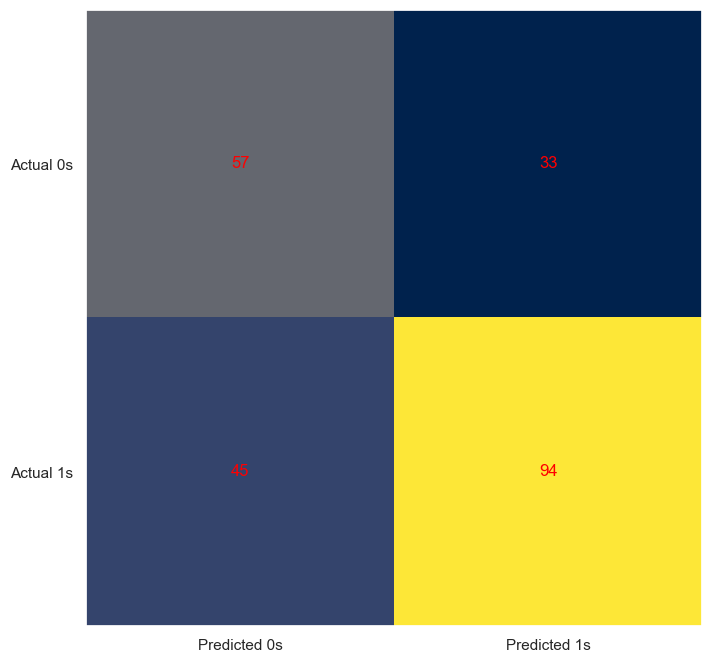

In [340]:
cm =  confusion_matrix(y_pred2 , y_test)

fig, ax = plt.subplots(figsize = (8 , 8))
ax.imshow(cm, cmap=plt.cm.cividis)
ax.grid(False)
ax.xaxis.set(ticks = (0 , 1), ticklabels = ("Predicted 0s" , "Predicted 1s"))
ax.yaxis.set(ticks = (0 , 1), ticklabels = ("Actual 0s" , "Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = "center", va= "center", color = "red")

In [341]:
print(classification_report(y_pred2 , y_test))

              precision    recall  f1-score   support

           0       0.56      0.63      0.59        90
           1       0.74      0.68      0.71       139

    accuracy                           0.66       229
   macro avg       0.65      0.65      0.65       229
weighted avg       0.67      0.66      0.66       229



In [342]:
train_accuracy_KNN = cross_val_score(model_KNN,train_scaler_pca,y_train, cv = 5 )
test_accuracy_KNN = cross_val_score(model_KNN,test_scaler_pca,y_test, cv = 5 )   

In [343]:
print("Train Data Cross_val_score: ", train_accuracy_KNN)
print("Test Data Cross_val_score: ", test_accuracy_KNN)

Train Data Cross_val_score:  [0.71584699 0.69945355 0.71584699 0.75956284 0.68131868]
Test Data Cross_val_score:  [0.69565217 0.60869565 0.67391304 0.69565217 0.8       ]


In [344]:
Train_accuracy_KNN = cross_val_score(model_KNN,train_scaler_pca,y_train, cv = 6 ).mean()
Test_accuracy_KNN = cross_val_score(model_KNN,test_scaler_pca,y_test, cv = 6 ).mean()

In [345]:
print("Train Data Cross_val_score: ", Train_accuracy_KNN)
print("Test Data Cross_val_score: ", Test_accuracy_KNN)

Train Data Cross_val_score:  0.7231825478729504
Test Data Cross_val_score:  0.7032163742690059


### We now know which K Fold has the best score for KNN

In [346]:
parameters = {"n_neighbors" : range(1, 50)}
grid_kn = GridSearchCV(estimator = model_KNN,
                       param_grid = parameters,
                       scoring = "accuracy",
                       cv = 5,
                       verbose = 1,
                       n_jobs = -1)
                      
grid_kn.fit(train_scaler_pca, y_train.ravel())

print("best parameters : ", grid_kn.best_params_)

print("best score : ", grid_kn.best_score_)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
best parameters :  {'n_neighbors': 42}
best score :  0.7319522008046598


In [347]:
accuracy_results["Total_Accuracy_KNN"] =  grid_kn.best_score_

# <font color='green'  style='font-weight: bold'>3- Random Forest Model</font> 

In [348]:
model_RF = RandomForestClassifier(n_estimators = 200 , max_depth = 3, min_samples_split = 2).fit(train_scaler_pca, y_train) ### n_estimators is the number of trees 
y_pred3 = model_RF.predict(test_scaler_pca)

In [349]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred3))

Accuracy: 0.6724890829694323


### Confusion Matrix

In [350]:
confusion_matrix(y_pred3 , y_test)

array([[66, 39],
       [36, 88]], dtype=int64)

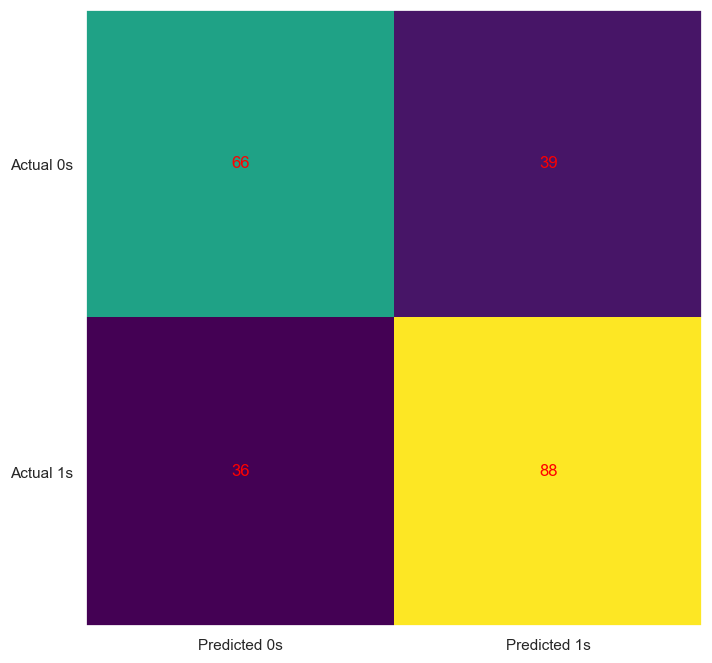

In [351]:
cm =  confusion_matrix(y_pred3 , y_test)

fig, ax = plt.subplots(figsize = (8 , 8))
ax.imshow(cm, cmap=plt.cm.viridis)
ax.grid(False)
ax.xaxis.set(ticks = (0 , 1), ticklabels = ("Predicted 0s" , "Predicted 1s"))
ax.yaxis.set(ticks = (0 , 1), ticklabels = ("Actual 0s" , "Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = "center", va= "center", color = "red")

In [352]:
print(classification_report(y_pred3 , y_test))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       105
           1       0.69      0.71      0.70       124

    accuracy                           0.67       229
   macro avg       0.67      0.67      0.67       229
weighted avg       0.67      0.67      0.67       229



In [353]:
train_accuracy_RF = cross_val_score(model_RF,x_train_Scaler,y_train, cv = 6 )
test_accuracy_RF = cross_val_score(model_RF,x_test_Scaler,y_test, cv = 6 )   

In [354]:
print("Train Data Cross_val_score: ", train_accuracy_RF)
print("Test Data Cross_val_score: ", test_accuracy_RF)

Train Data Cross_val_score:  [0.75816993 0.77124183 0.76973684 0.77631579 0.72368421 0.73026316]
Test Data Cross_val_score:  [0.74358974 0.81578947 0.60526316 0.81578947 0.71052632 0.78947368]


In [355]:
Train_accuracy_RF = cross_val_score(model_RF,x_train_Scaler,y_train, cv = 6 ).mean()
Test_accuracy_RF = cross_val_score(model_RF,x_test_Scaler,y_test, cv = 6 ).mean()

In [356]:
print("Train Data Cross_val_score: ", Train_accuracy_RF)
print("Test Data Cross_val_score: ", Test_accuracy_RF)

Train Data Cross_val_score:  0.7570949432404541
Test Data Cross_val_score:  0.7248088169140802


### We now know which K Fold has the best score for RandomForest

In [357]:
parameters = {
    "n_estimators" : [50, 100, 200],
    "max_depth" : [5, 10, 15]
}




RF_model = RandomForestClassifier(random_state = 42)


grid_RF = GridSearchCV(estimator = RF_model,
                       param_grid = parameters,
                       scoring = "accuracy",
                       cv = 5,
                       verbose = 1,
                       n_jobs = -1)
                      
grid_RF.fit(train_scaler_pca, y_train.ravel())

print("best parameters : ", grid_RF.best_params_)

print("best score : ", grid_RF.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
best parameters :  {'max_depth': 15, 'n_estimators': 100}
best score :  0.7888008166696692


In [358]:
 accuracy_results["Total_Accuracy_RandomForest"] = grid_RF.best_score_

# <font color='green'  style='font-weight: bold'>4- DecisionTree Model</font> 

In [359]:
model_DT1 =  DecisionTreeClassifier(max_depth = 3 ).fit(train_scaler_pca, y_train)
y_pred4 = model_DT1.predict(test_scaler_pca)

In [360]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred4))

Accuracy: 0.7117903930131004


In [361]:
confusion_matrix(y_pred4 , y_test)

array([[ 53,  17],
       [ 49, 110]], dtype=int64)

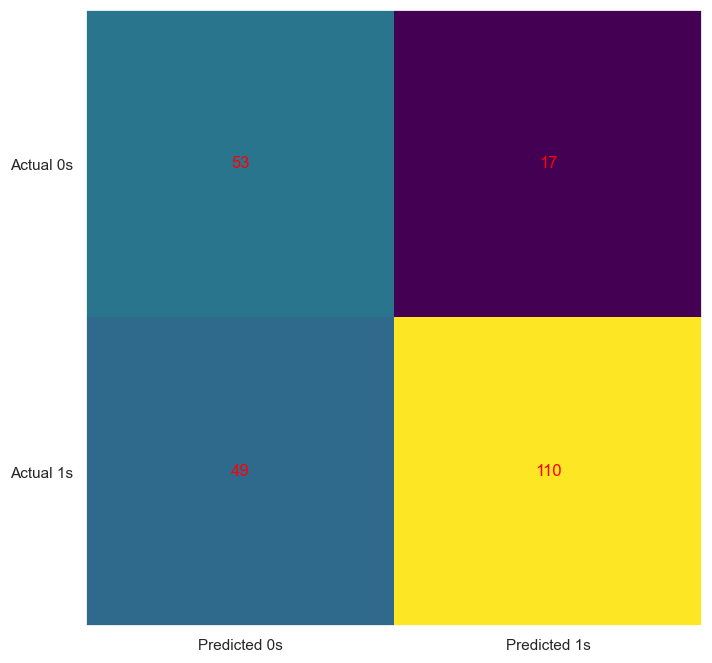

In [362]:
cm =  confusion_matrix(y_pred4 , y_test)

fig, ax = plt.subplots(figsize = (8 , 8))
ax.imshow(cm, cmap=plt.cm.viridis)
ax.grid(False)
ax.xaxis.set(ticks = (0 , 1), ticklabels = ("Predicted 0s" , "Predicted 1s"))
ax.yaxis.set(ticks = (0 , 1), ticklabels = ("Actual 0s" , "Actual 1s"))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = "center", va= "center", color = "red")

In [363]:
print(classification_report(y_pred4 , y_test))

              precision    recall  f1-score   support

           0       0.52      0.76      0.62        70
           1       0.87      0.69      0.77       159

    accuracy                           0.71       229
   macro avg       0.69      0.72      0.69       229
weighted avg       0.76      0.71      0.72       229



In [364]:
train_accuracy_DT = cross_val_score(model_DT1,x_train_Scaler,y_train, cv = 6 )
test_accuracy_DT = cross_val_score(model_DT1,x_test_Scaler,y_test, cv = 6 )   

In [365]:
print("Train Data Cross_val_score: ", train_accuracy_DT)
print("Test Data Cross_val_score: ", test_accuracy_DT)

Train Data Cross_val_score:  [0.69934641 0.69934641 0.72368421 0.73026316 0.68421053 0.69078947]
Test Data Cross_val_score:  [0.79487179 0.84210526 0.68421053 0.68421053 0.60526316 0.73684211]


In [366]:
Train_accuracy_DT = cross_val_score(model_DT1,x_train_Scaler,y_train, cv = 6 ).mean()
Test_accuracy_DT = cross_val_score(model_DT1,x_test_Scaler,y_test, cv = 6 ).mean()

In [367]:
print("Train Data Cross_val_score: ", Train_accuracy_DT)
print("Test Data Cross_val_score: ", Test_accuracy_DT)

Train Data Cross_val_score:  0.7046066964797615
Test Data Cross_val_score:  0.7201979307242464


### We now know which K Fold has the best score for DecisionTree

In [368]:
parameters = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10]
}

grid_DT1 = GridSearchCV(estimator=model_DT1, param_grid=parameters, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
grid_DT1.fit(train_scaler_pca, y_train.ravel())

print("best parameters:", grid_DT1.best_params_)
print("best score:", grid_DT1.best_score_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
best parameters: {'max_depth': 15, 'min_samples_split': 2}
best score: 0.7242899177325407


In [369]:
accuracy_results["Total_Accuracy_DecisionTree"] = grid_DT1.best_score_

### Visulization of DecisionTree

In [370]:
text_representation = tree.export_text(model_DT1)
print(text_representation)

|--- feature_2 <= 0.17
|   |--- feature_1 <= 1.10
|   |   |--- feature_2 <= -1.26
|   |   |   |--- class: 0
|   |   |--- feature_2 >  -1.26
|   |   |   |--- class: 1
|   |--- feature_1 >  1.10
|   |   |--- feature_1 <= 2.95
|   |   |   |--- class: 0
|   |   |--- feature_1 >  2.95
|   |   |   |--- class: 0
|--- feature_2 >  0.17
|   |--- feature_2 <= 1.15
|   |   |--- feature_7 <= 0.99
|   |   |   |--- class: 1
|   |   |--- feature_7 >  0.99
|   |   |   |--- class: 0
|   |--- feature_2 >  1.15
|   |   |--- feature_0 <= 5.82
|   |   |   |--- class: 1
|   |   |--- feature_0 >  5.82
|   |   |   |--- class: 0



In [371]:
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

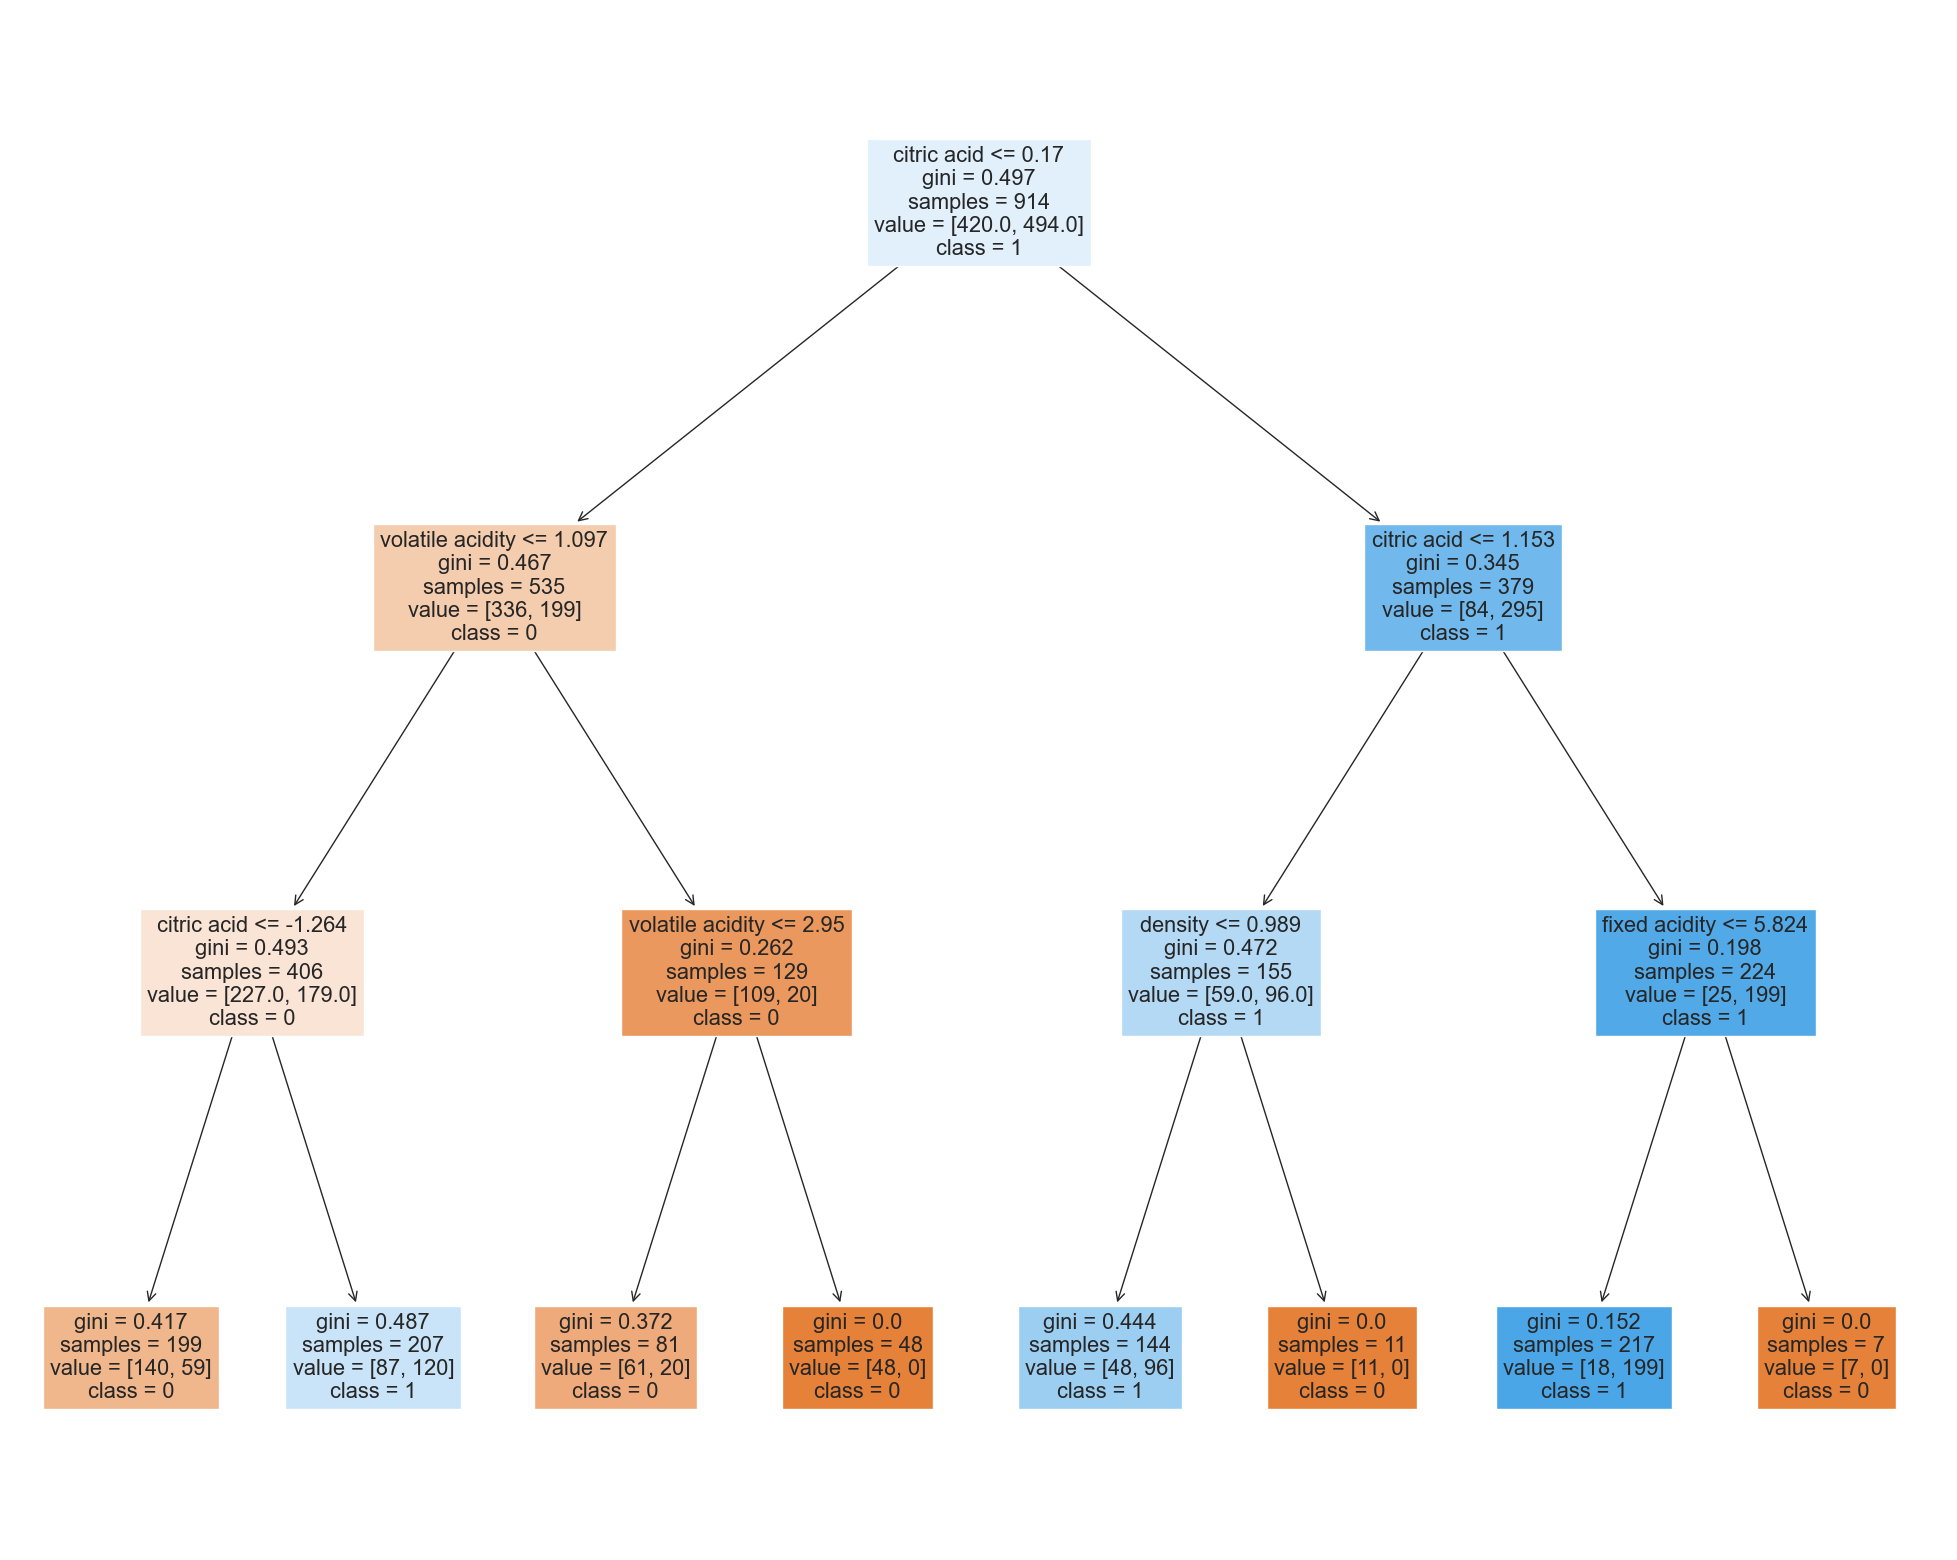

In [372]:
feature_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'sulfur_category',
       'fixed acidity_2', 'volatile acidity_2', 'citric acid_2',
       'residual sugar_2', 'chlorides_2', 'free sulfur dioxide_2',
       'total sulfur dioxide_2', 'density_2', 'pH_2', 'sulphates_2',
       'alcohol_2']
target_names = ["0" , "1"]
fig = plt.figure(figsize = (25, 20))
Plot = tree.plot_tree(model_DT1,
                      feature_names = feature_names,
                      class_names = target_names,
                      filled = True)

fig.savefig("Tree1.png")

# <font color='green'  style='font-weight: bold'>5- DecisionTree Model with entropy</font> 

### DecisionTree with entropy

In [373]:
model_DT2 =  DecisionTreeClassifier(max_depth = 3,criterion = "entropy" ).fit(train_scaler_pca, y_train)
y_pred4_2 = model_DT2.predict(test_scaler_pca)

In [374]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred4_2))

Accuracy: 0.6812227074235808


In [375]:
train_accuracy_DT2 = cross_val_score(model_DT2, x_train_Scaler, y_train, cv=6)
test_accuracy_DT2 = cross_val_score(model_DT2, x_test_Scaler, y_test, cv=6)

print("Train Data Cross_val_score: ", train_accuracy_DT2.mean())
print("Test Data Cross_val_score: ", test_accuracy_DT2.mean())


Train Data Cross_val_score:  0.6860236784772389
Test Data Cross_val_score:  0.6815114709851552


In [376]:
parameters = {
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10]
}

grid_DT2 = GridSearchCV(estimator=model_DT2, param_grid=parameters, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
grid_DT2.fit(train_scaler_pca, y_train.ravel())

print("best parameters:", grid_DT2.best_params_)
print("best score:", grid_DT2.best_score_)



Fitting 5 folds for each of 9 candidates, totalling 45 fits
best parameters: {'max_depth': 5, 'min_samples_split': 2}
best score: 0.7450669549030204


In [377]:
accuracy_results["Total_Accuracy_DecisionTree_entropy"] = grid_DT2.best_score_

In [378]:
text_representation = tree.export_text(model_DT2)
print(text_representation)

|--- feature_2 <= 1.15
|   |--- feature_1 <= 2.95
|   |   |--- feature_2 <= -1.26
|   |   |   |--- class: 0
|   |   |--- feature_2 >  -1.26
|   |   |   |--- class: 1
|   |--- feature_1 >  2.95
|   |   |--- class: 0
|--- feature_2 >  1.15
|   |--- feature_0 <= 5.82
|   |   |--- feature_0 <= -4.37
|   |   |   |--- class: 1
|   |   |--- feature_0 >  -4.37
|   |   |   |--- class: 1
|   |--- feature_0 >  5.82
|   |   |--- class: 0



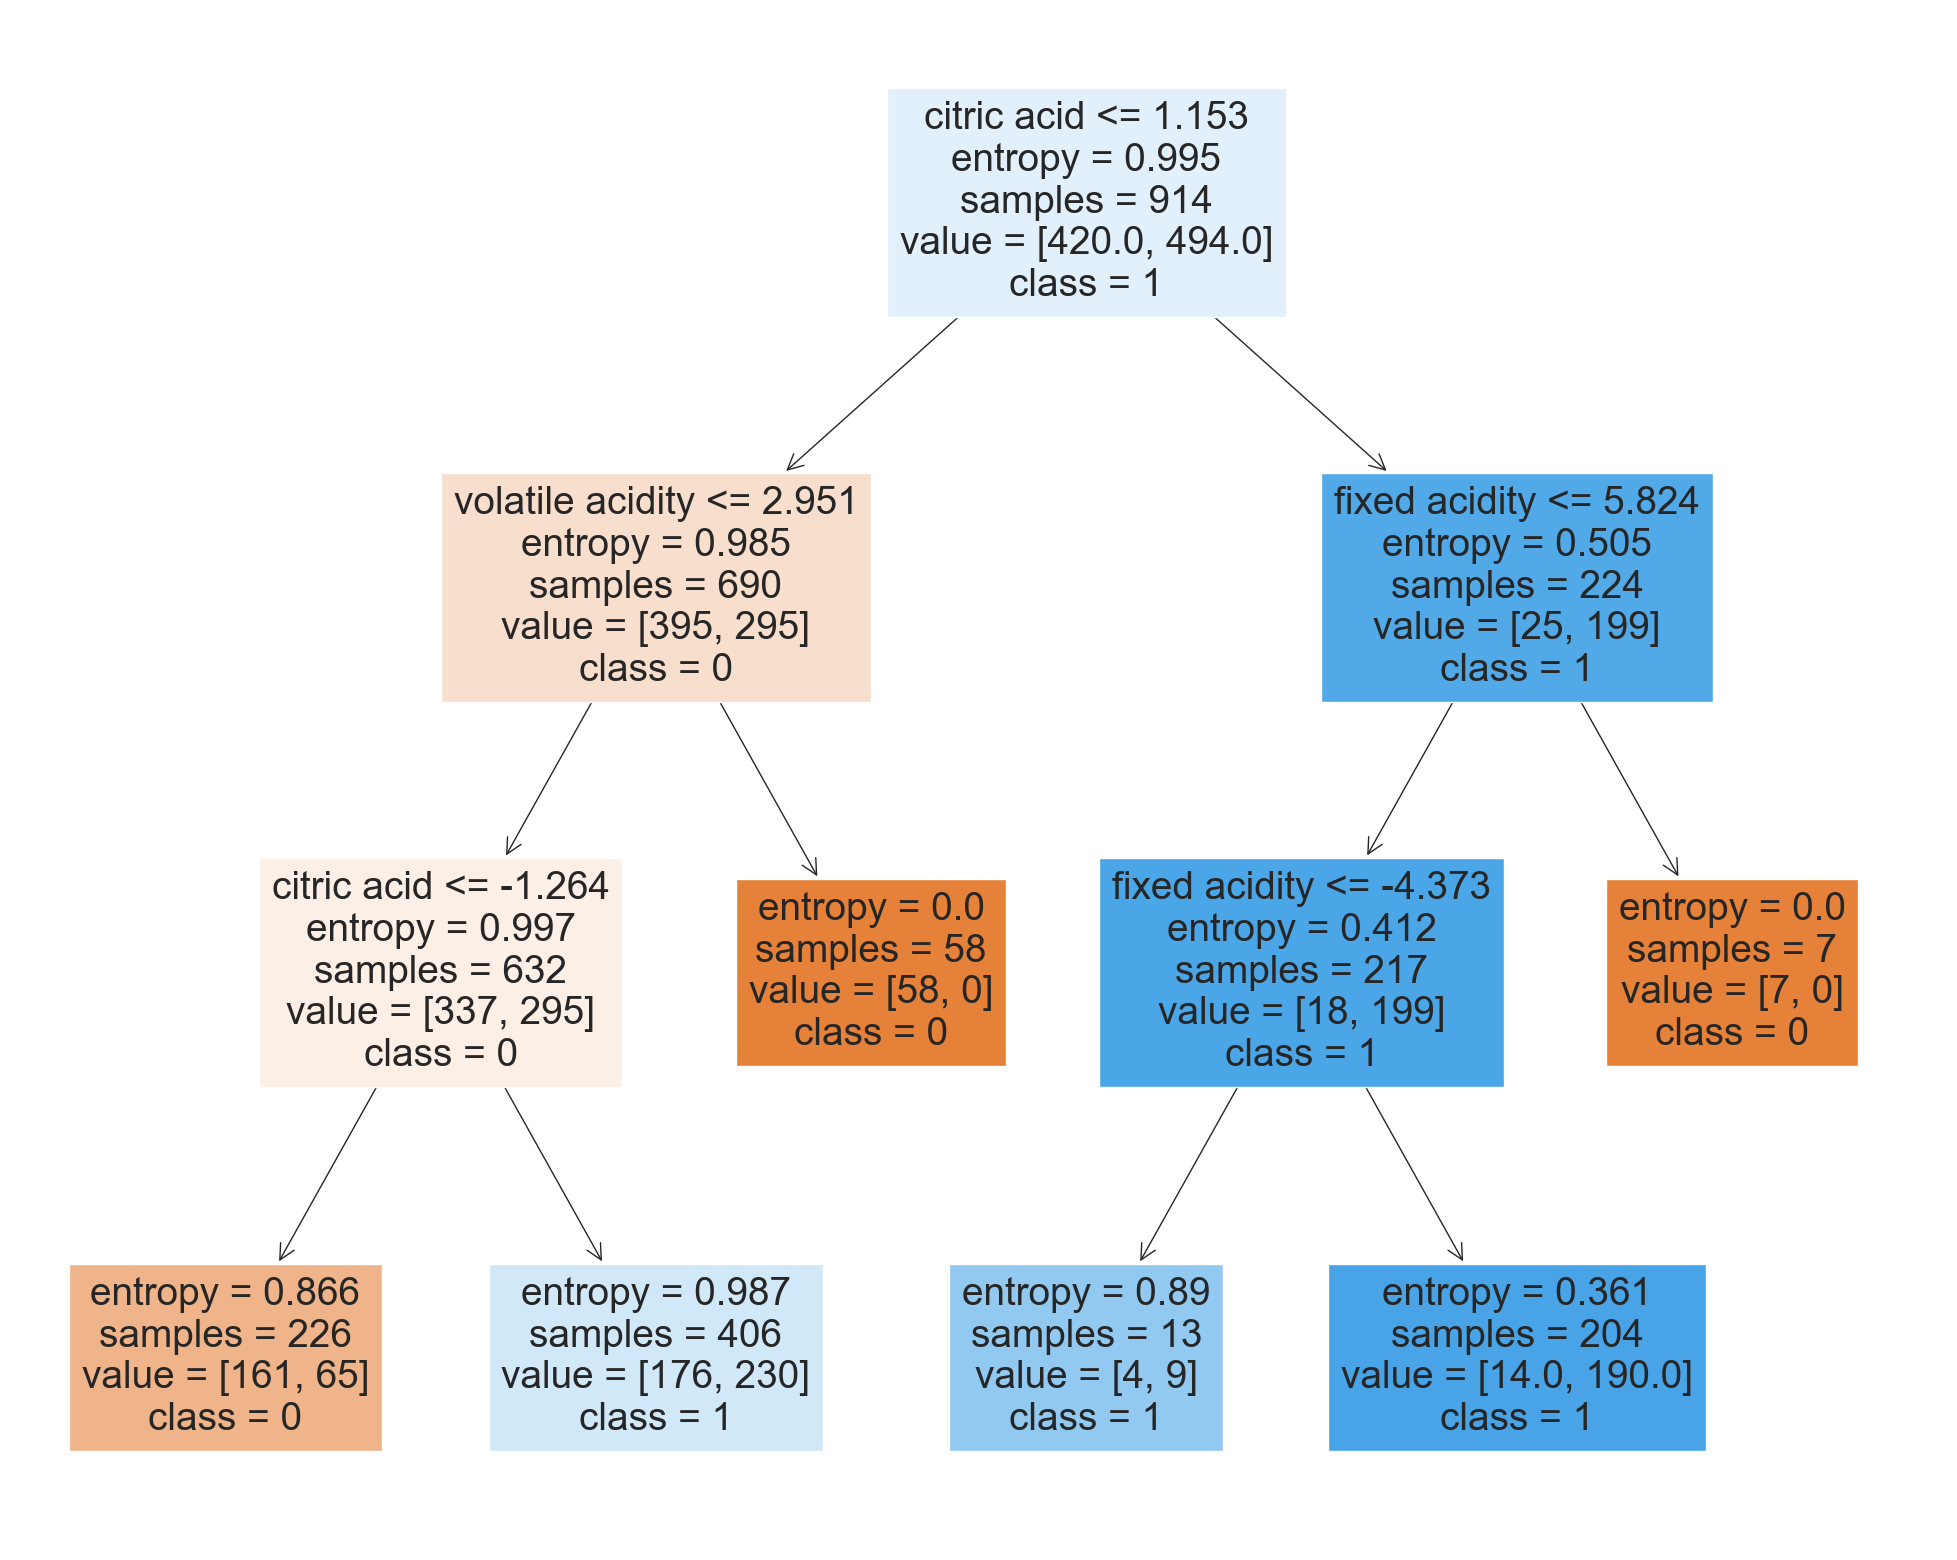

In [379]:
feature_names = [ 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'sulfur_category',
       'fixed acidity_2', 'volatile acidity_2', 'citric acid_2',
       'residual sugar_2', 'chlorides_2', 'free sulfur dioxide_2',
       'total sulfur dioxide_2', 'density_2', 'pH_2', 'sulphates_2',
       'alcohol_2']
target_names = ["0" , "1"]
fig = plt.figure(figsize = (25, 20))
Plot = tree.plot_tree(model_DT2,
                      feature_names = feature_names,
                      class_names = target_names,
                      filled = True)

fig.savefig("Tree1.png")

# Comparison of accuracy for models

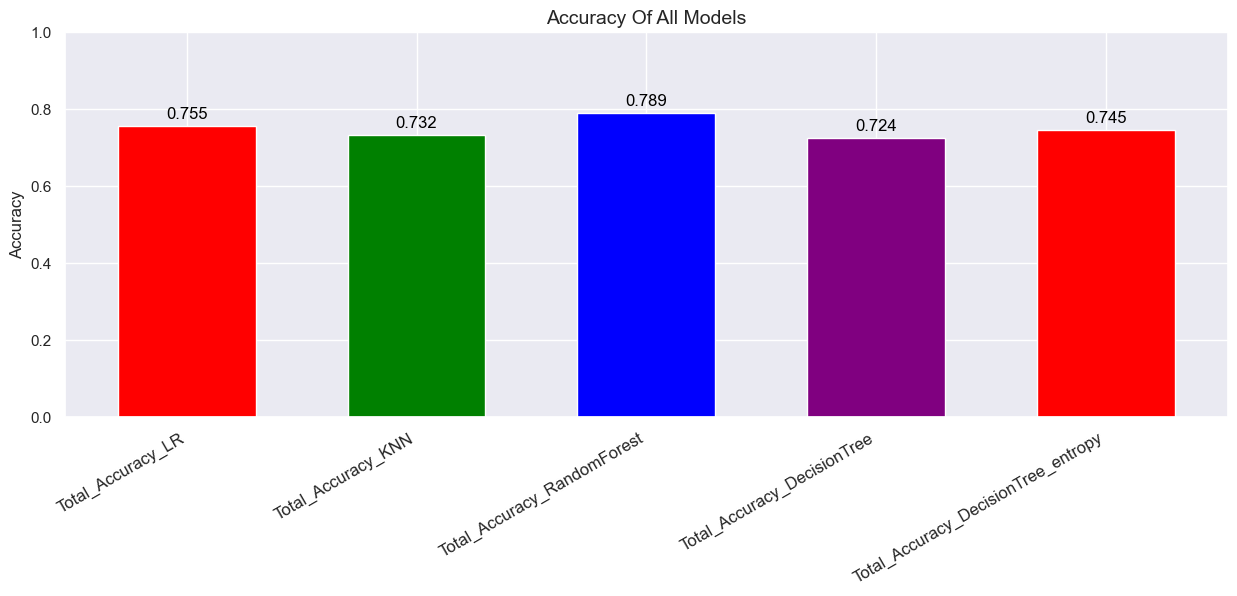

In [380]:
Names_Model = list(accuracy_results.keys())
Values_accuracy = list(accuracy_results.values())

plt.figure(figsize=(15, 5))
plt.bar(Names_Model, Values_accuracy, color=["red", "green", "blue", "purple"], width=0.6)  # تنظیم عرض نوارها
plt.title("Accuracy Of All Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)

plt.xticks(rotation=30, ha="right", fontsize=12)

for i, v in enumerate(Values_accuracy):
    plt.text(i, v + 0.02, "{:0.3f}".format(v), ha="center", color="black", fontsize=12)

plt.show()



### Random Forest > Logestic Regression > Desicion Tree_Antropy > KNN > Desicion Tree 

### <font color='red' style='font-weight: bold'>Now We know "Random Forest" and "Logestic Regression" have best score for accuracy</font> 